In [ ]:
!git clone https://github.com/sgauthamr2001/cv-session.git
%cd cv-session/

In [2]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

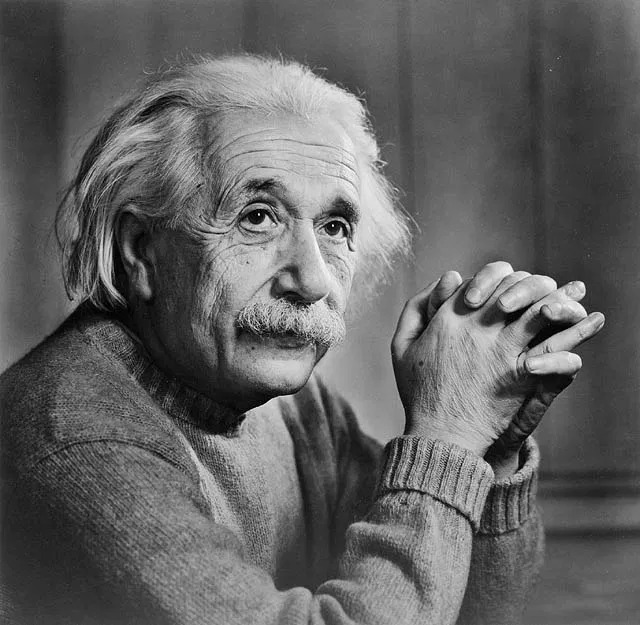

In [4]:
og_pic=cv2.imread('media/einstein.jpg',0)
cv2_imshow(og_pic)

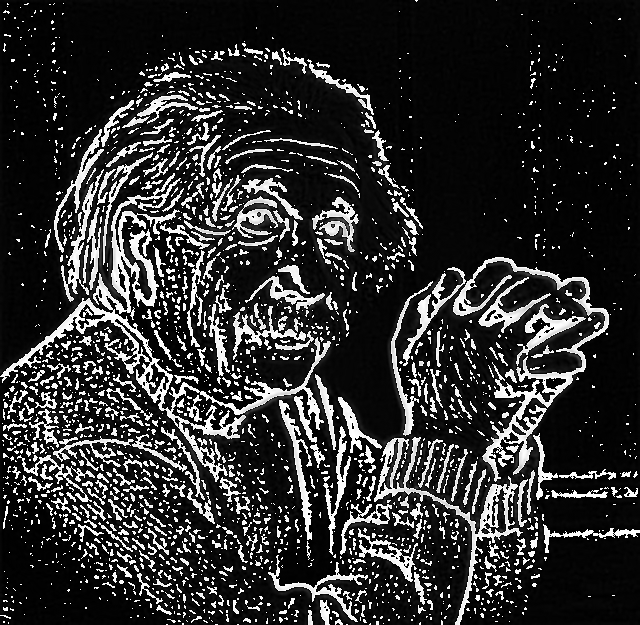

In [5]:
blur1=cv2.GaussianBlur(og_pic,(9,9),sigmaX=10000,sigmaY=10000)
blur2=cv2.GaussianBlur(og_pic,(5,5),sigmaX=1,sigmaY=1)
cv2_imshow(blur2-blur1)

# Problem 2

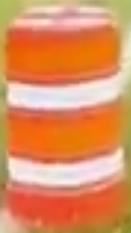

In [6]:
vid=cv2.VideoCapture('media/video.mp4')
barrel_img=cv2.imread('media/barrel.jpg')
cv2_imshow(barrel_img)

In [7]:
barrel_hsv=cv2.cvtColor(barrel_img,cv2.COLOR_BGR2HSV)
barrel_hist=cv2.calcHist([barrel_hsv],[0,2],None,[20,256],[0,20,0,255])
cv2.normalize(barrel_hist,barrel_hist,0,255,cv2.NORM_MINMAX);

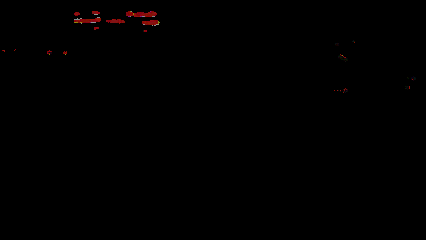

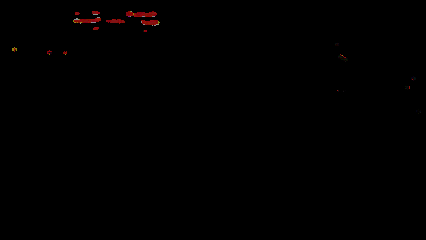

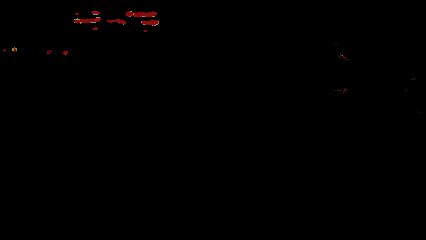

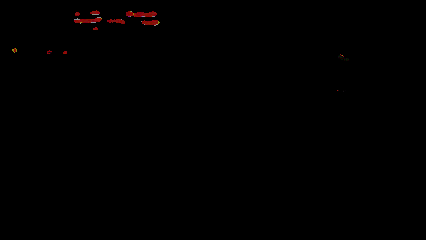

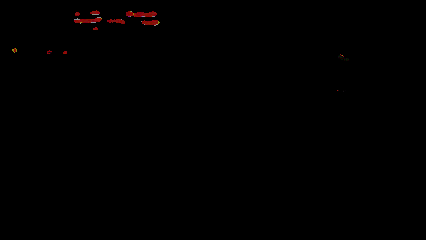

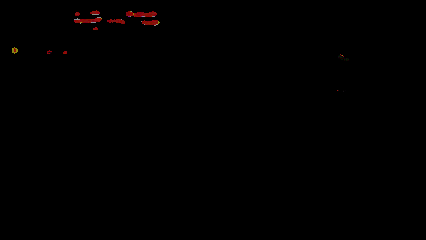

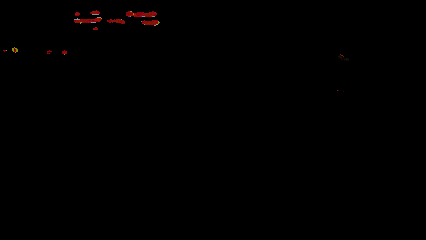

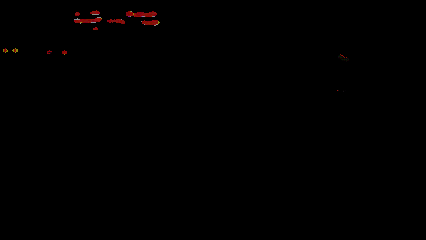

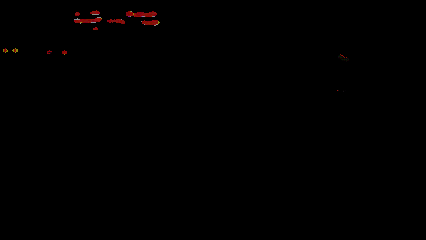

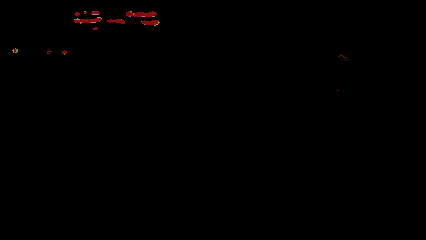

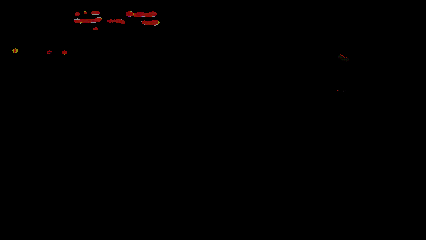

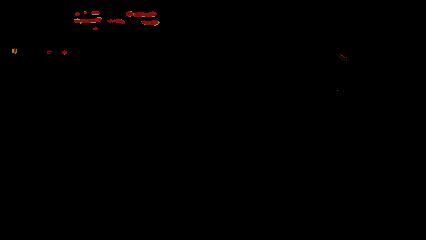

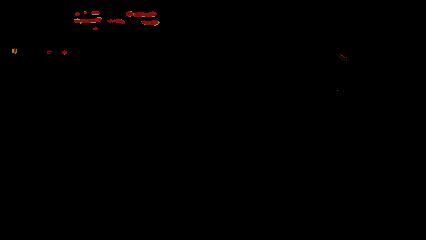

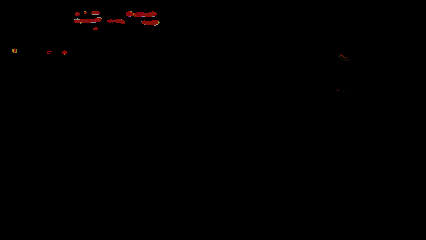

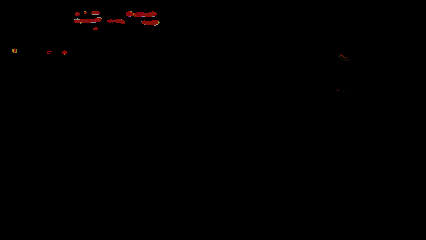

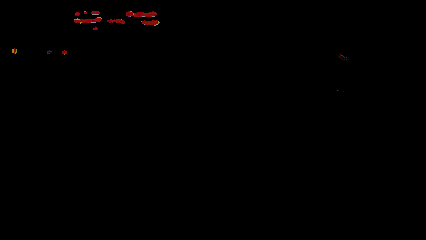

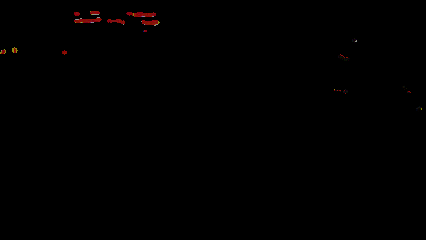

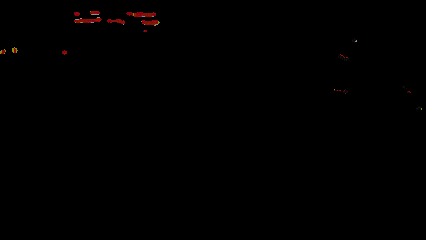

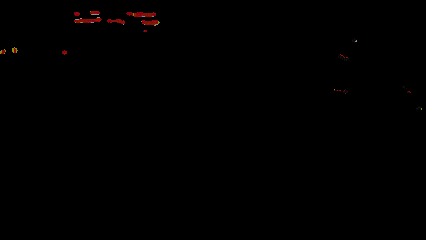

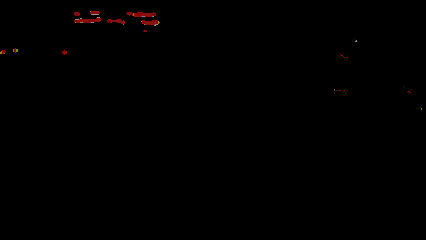

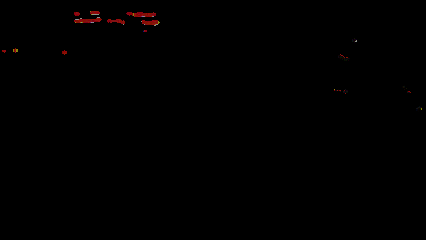

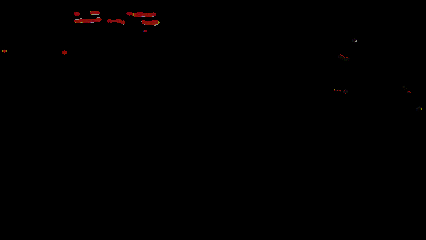

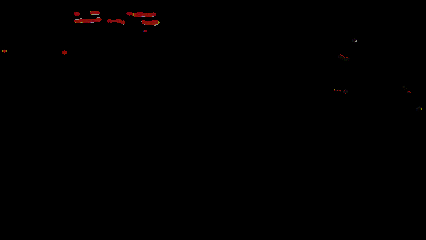

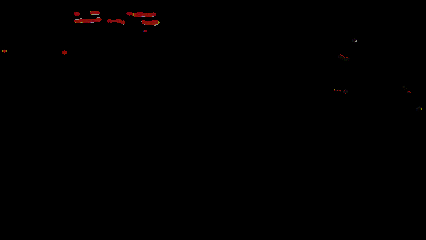

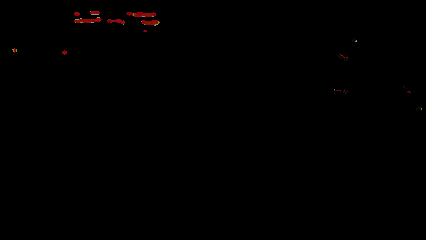

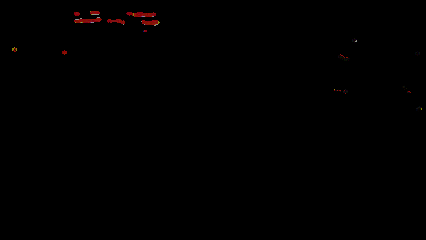

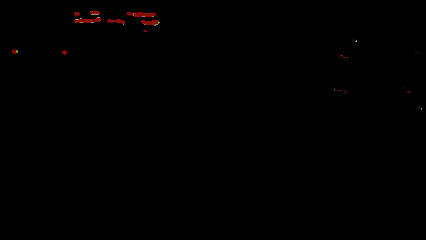

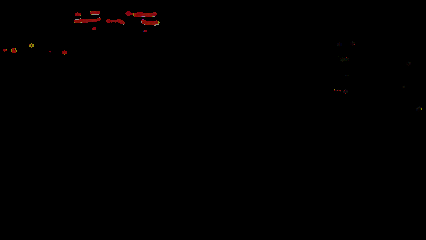

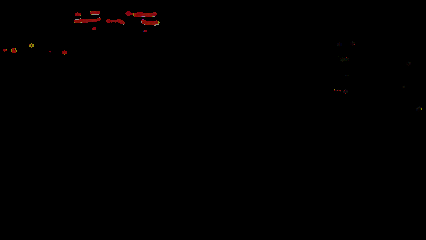

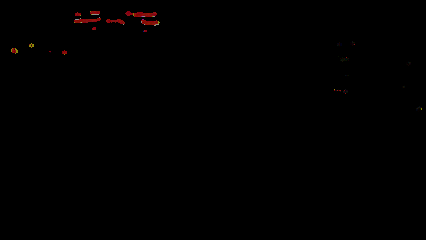

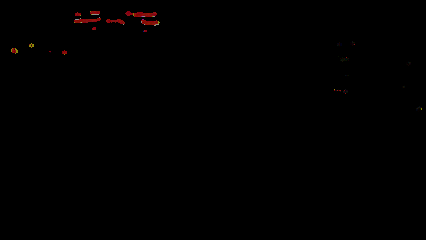

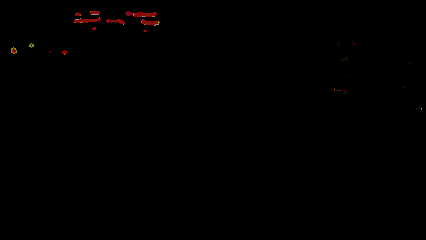

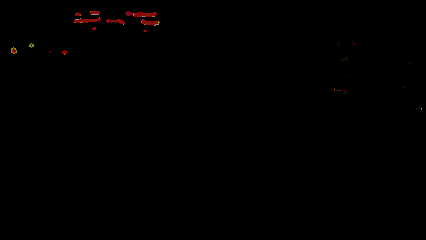

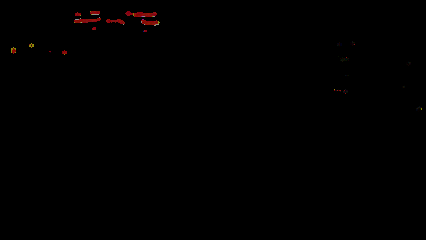

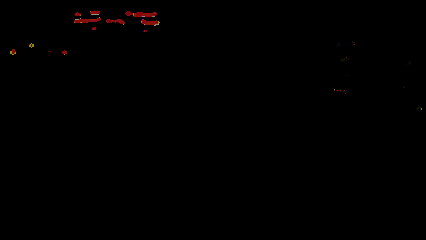

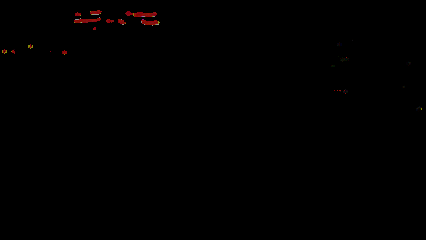

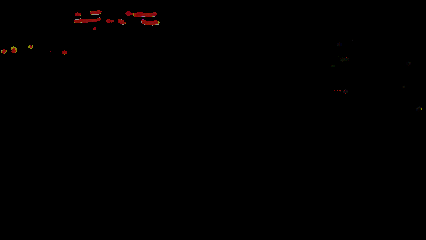

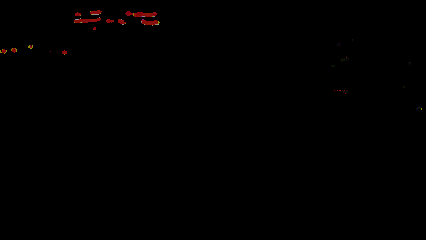

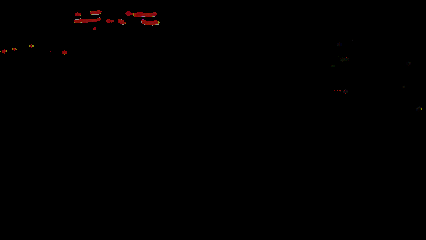

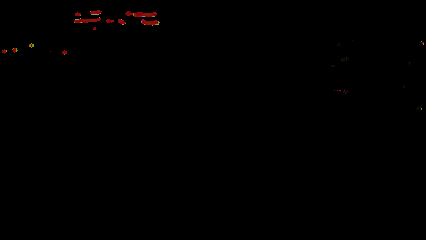

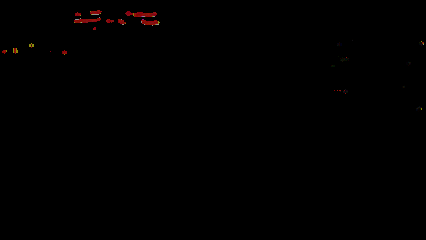

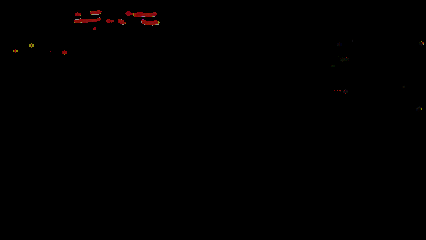

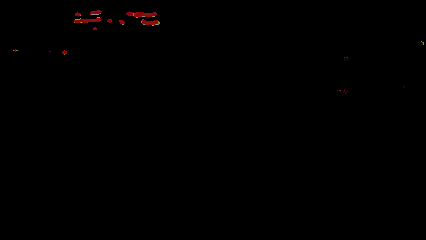

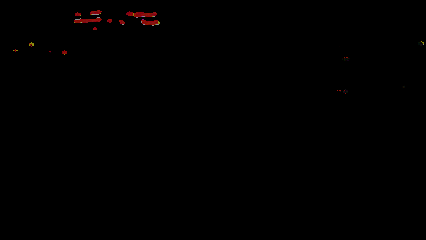

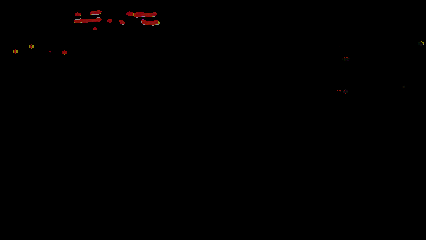

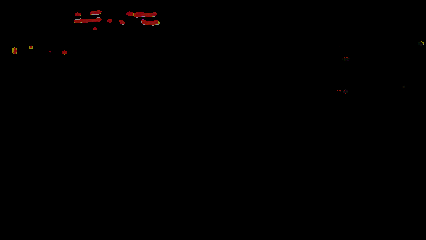

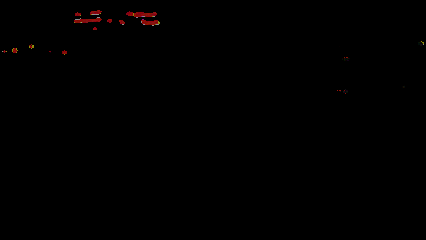

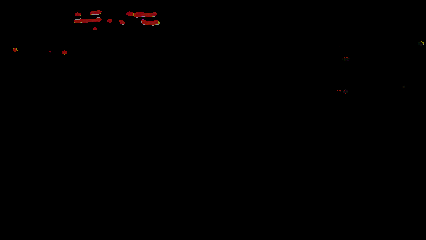

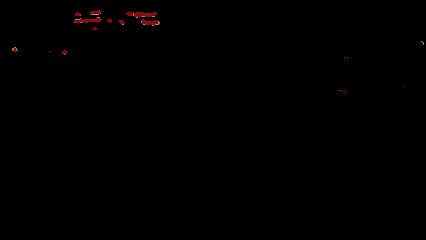

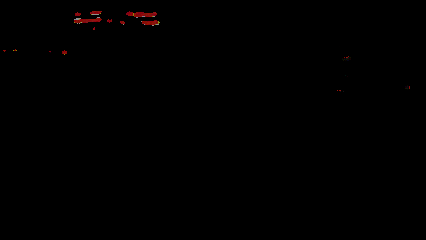

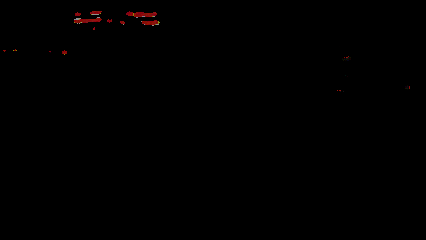

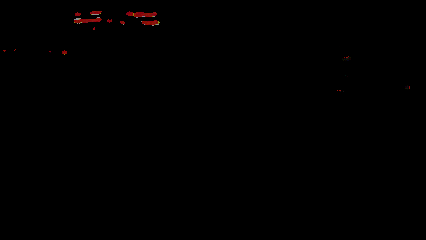

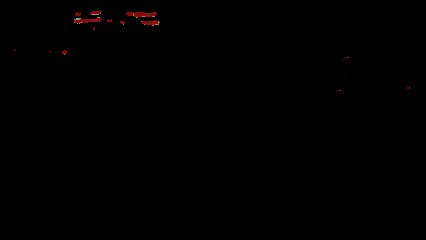

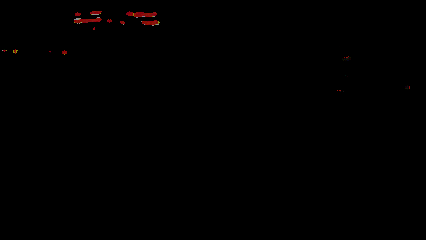

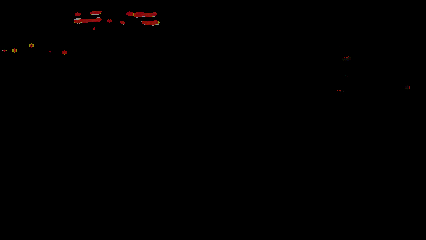

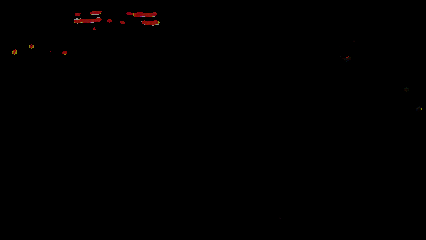

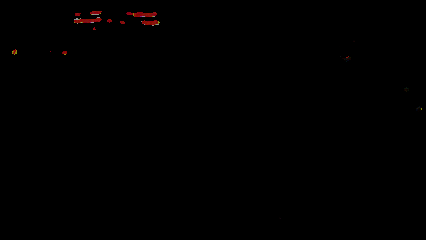

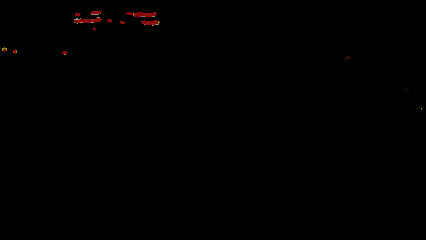

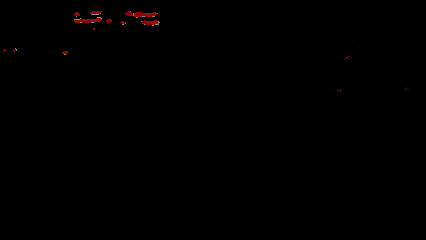

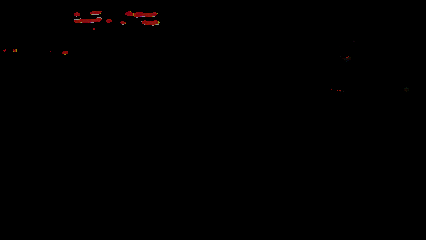

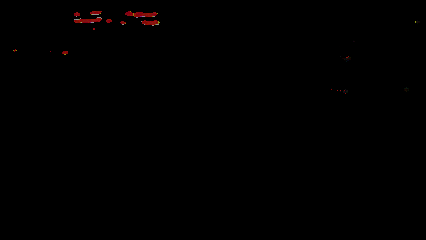

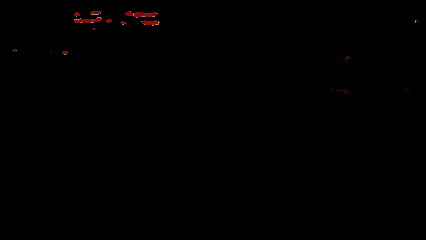

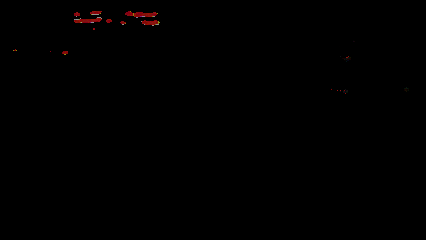

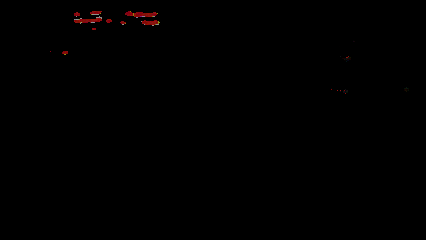

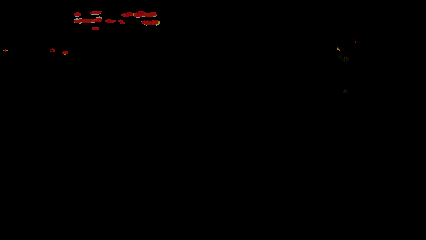

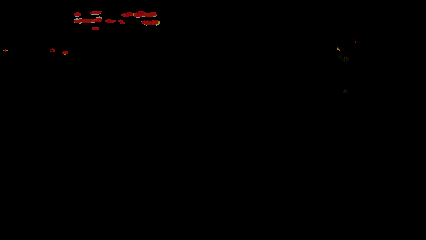

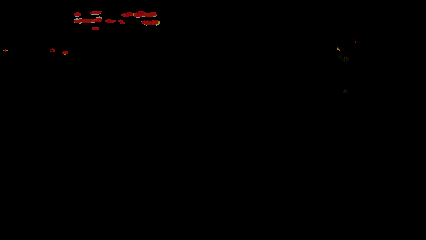

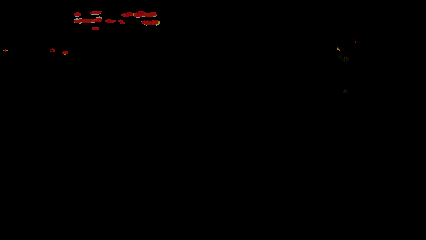

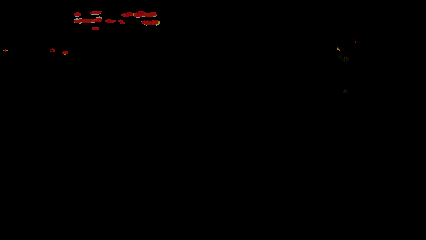

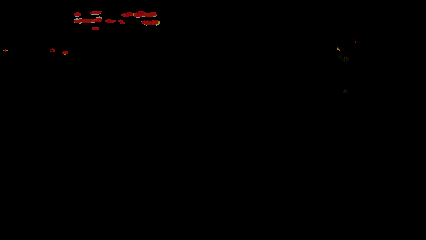

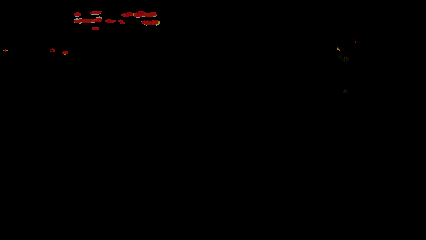

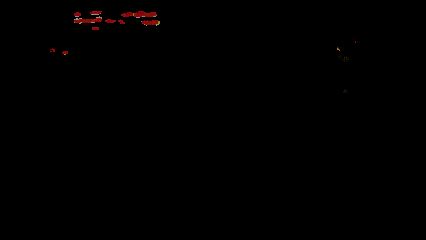

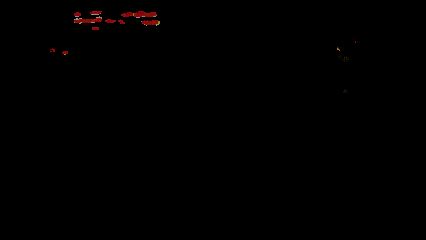

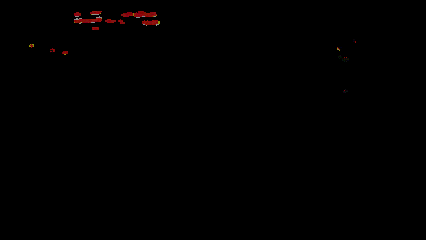

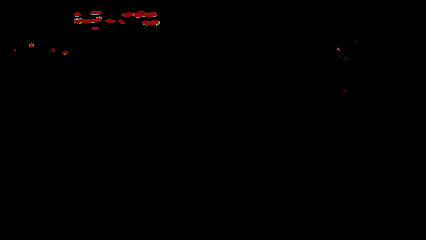

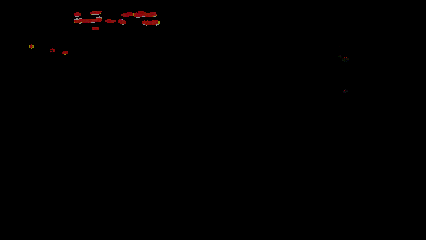

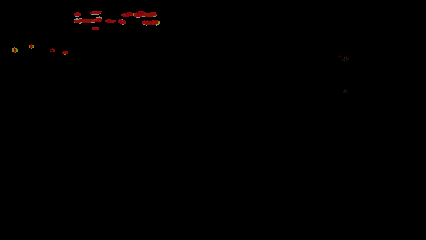

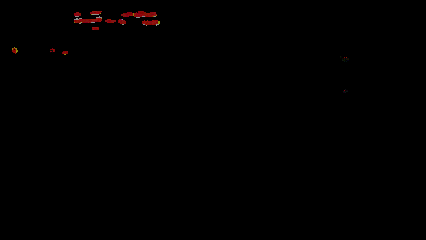

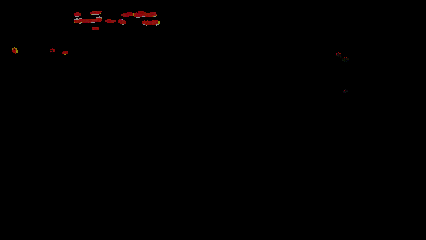

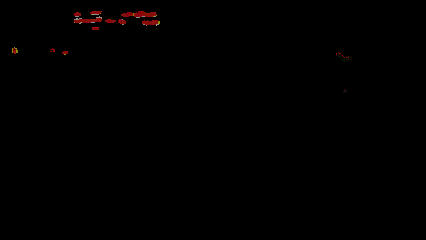

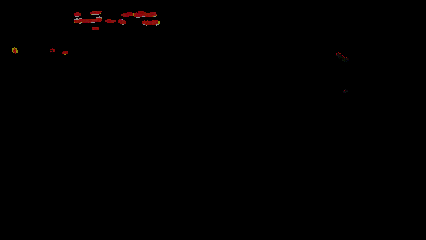

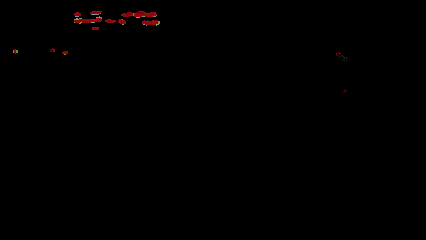

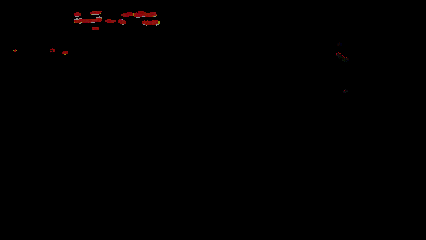

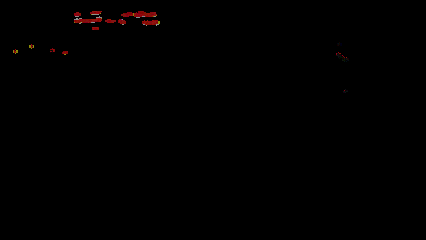

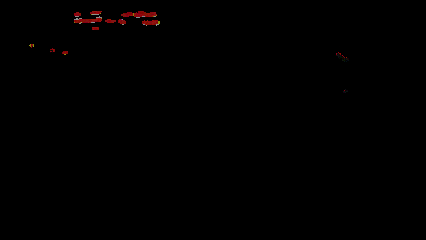

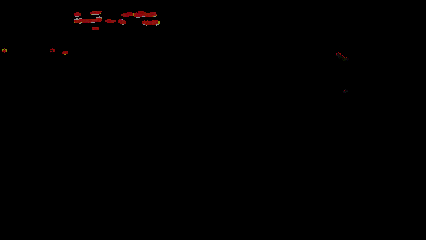

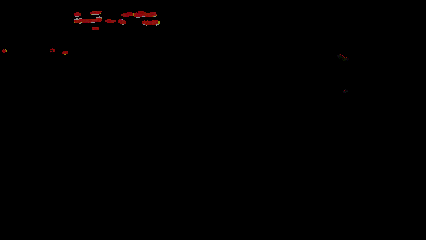

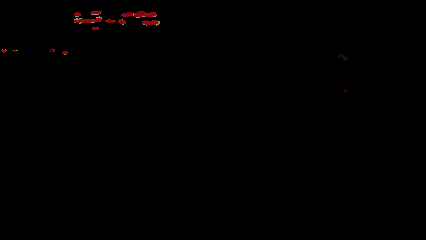

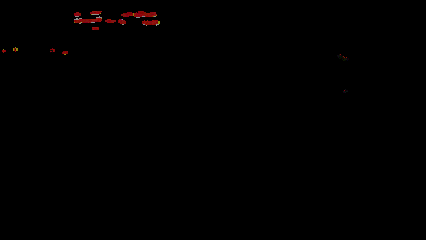

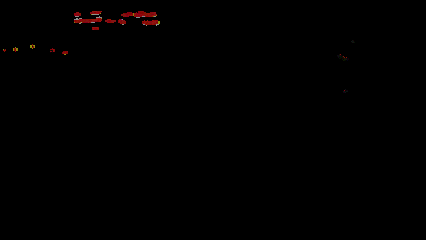

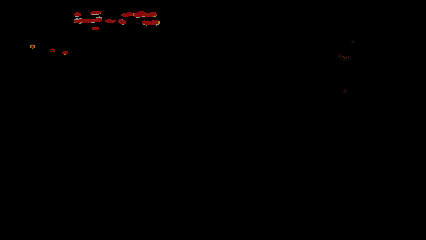

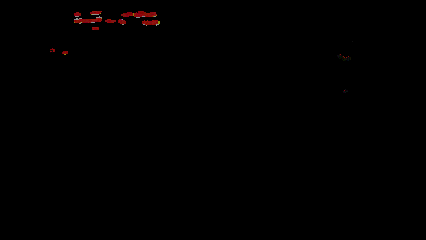

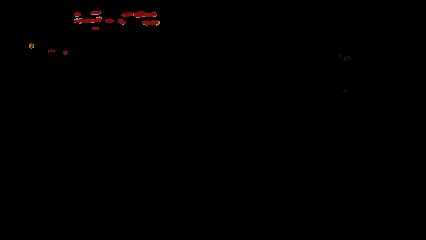

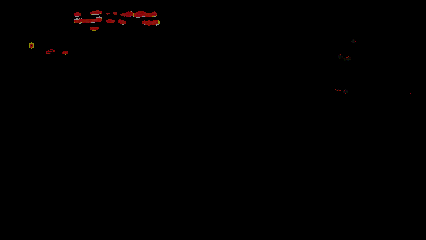

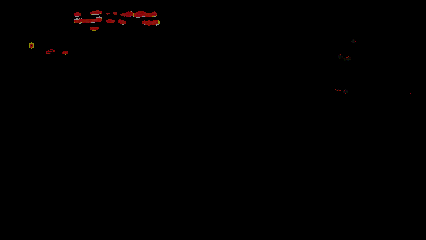

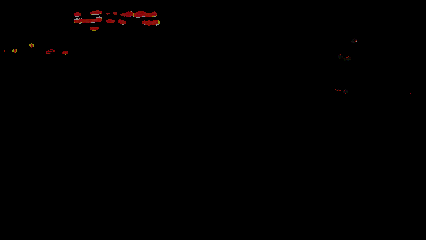

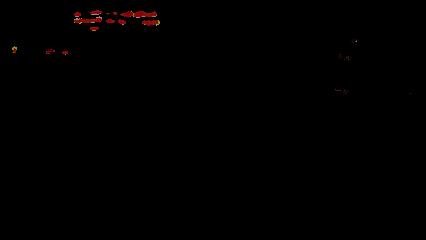

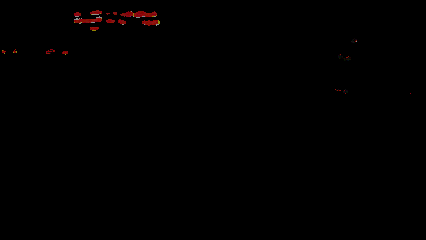

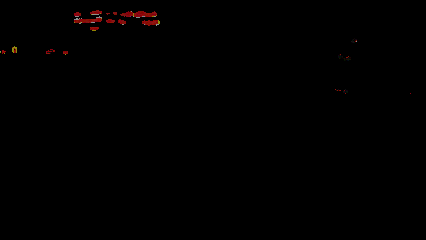

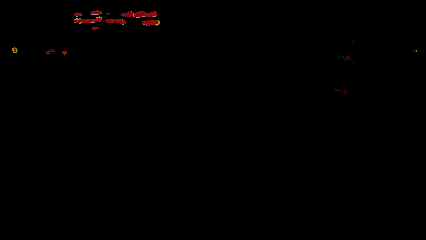

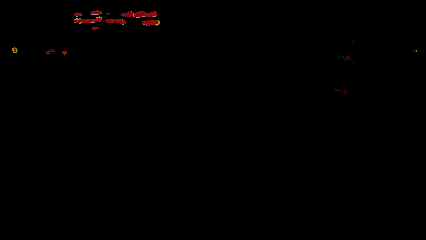

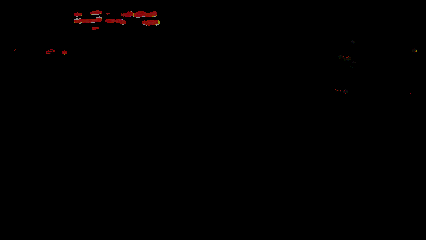

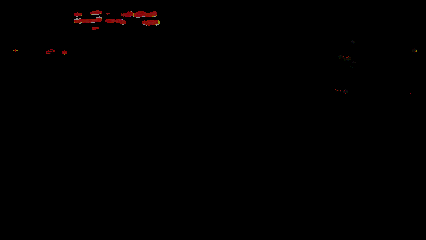

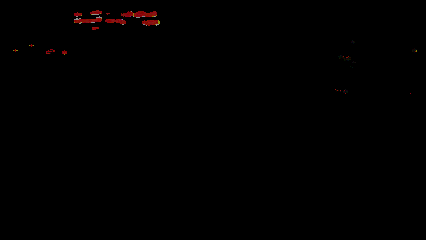

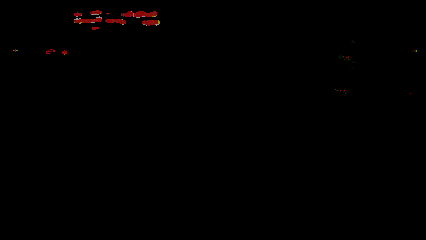

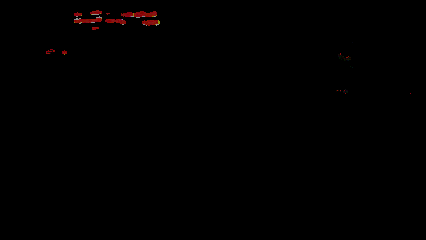

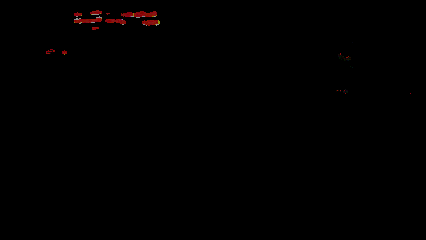

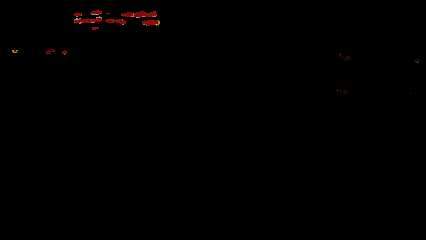

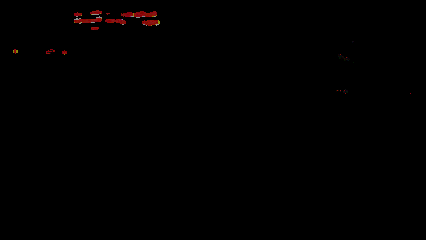

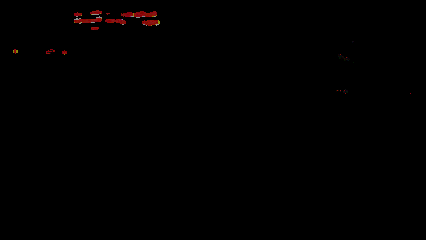

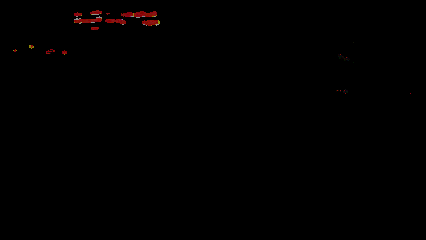

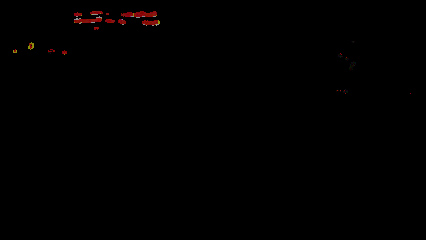

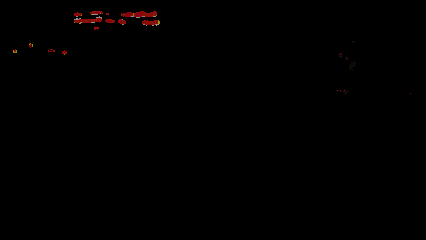

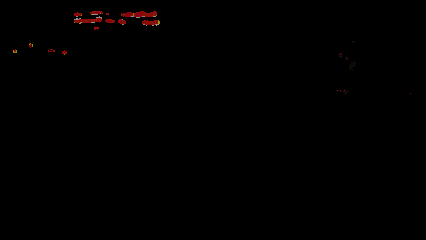

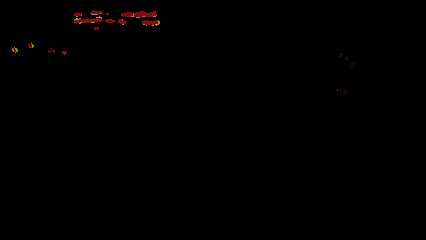

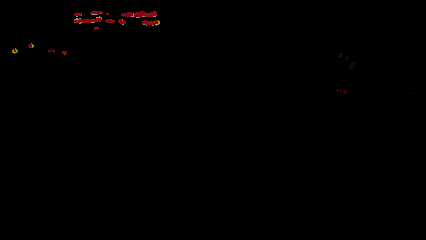

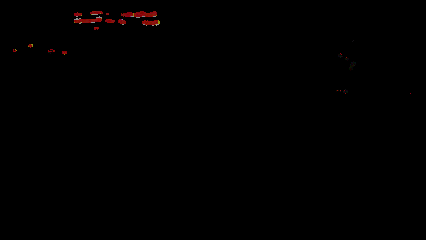

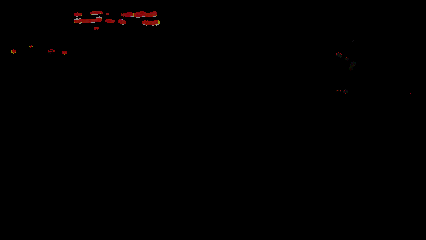

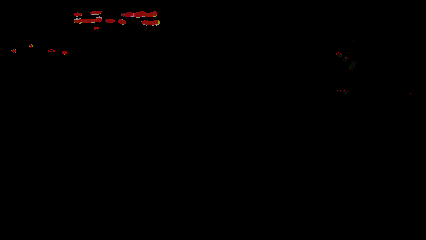

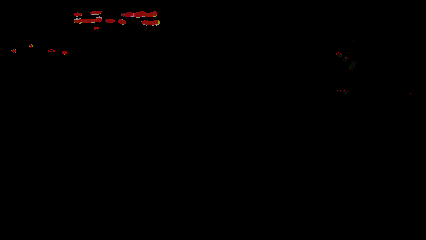

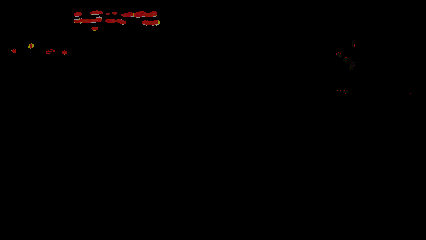

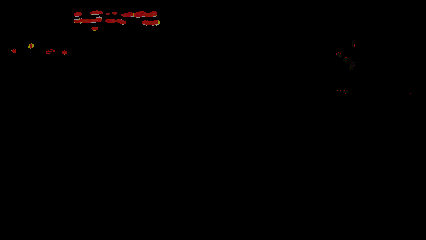

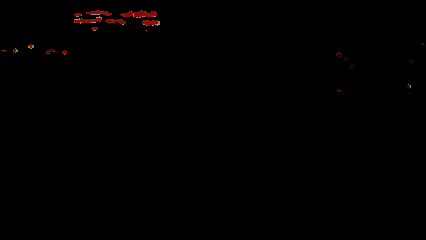

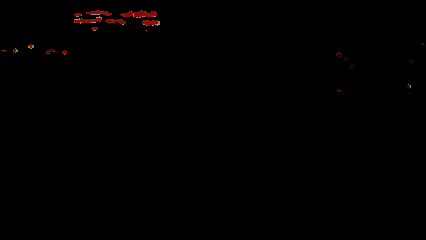

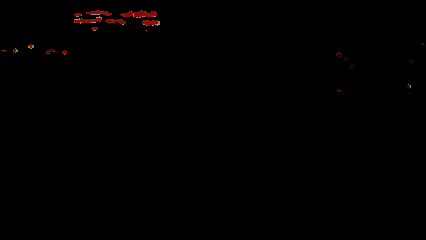

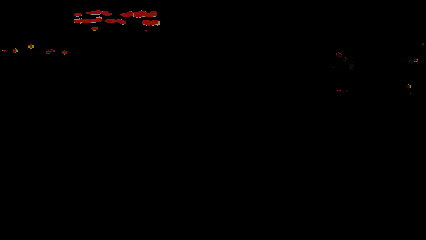

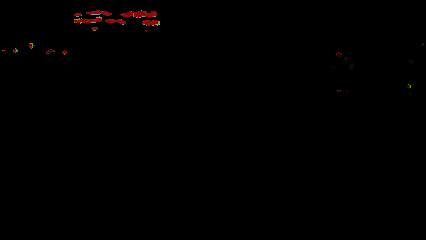

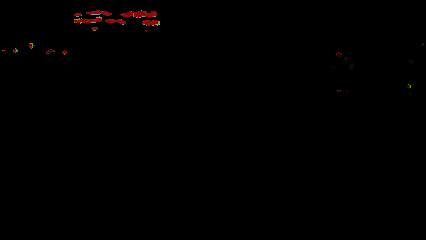

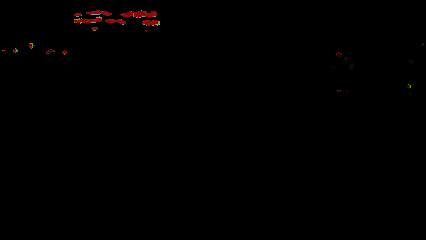

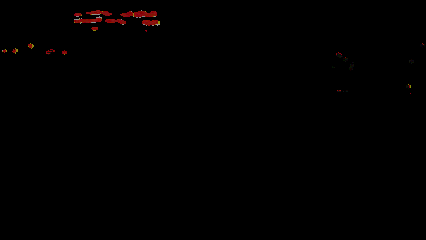

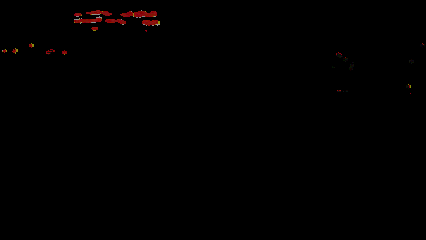

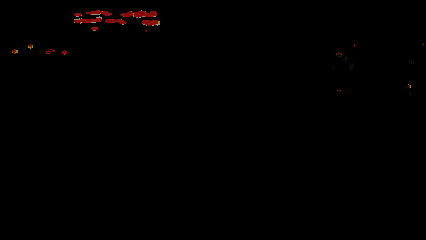

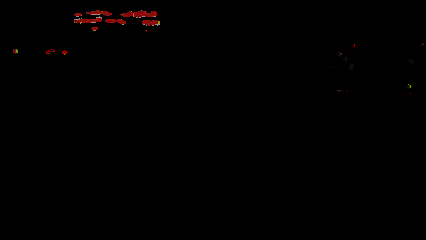

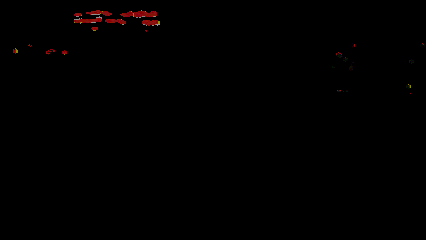

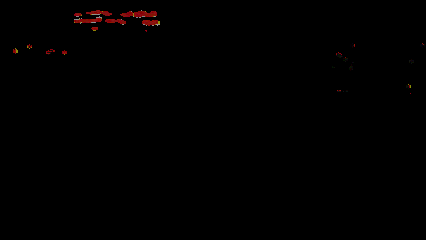

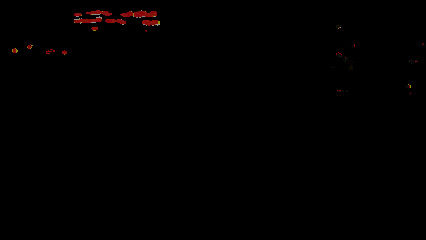

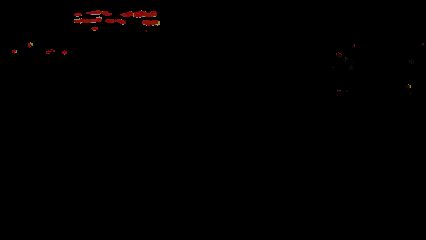

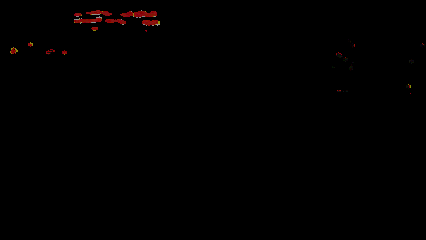

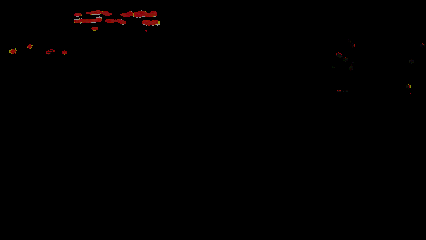

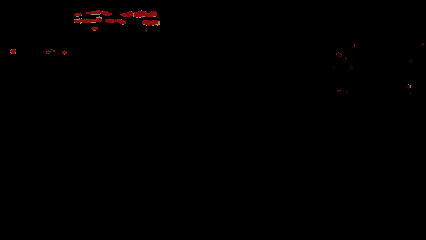

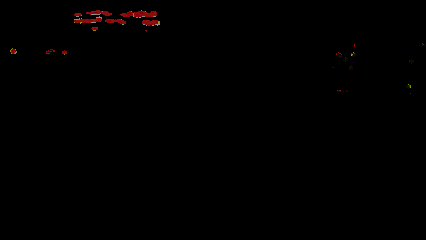

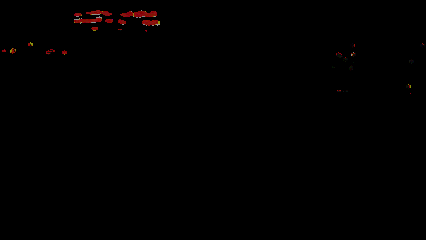

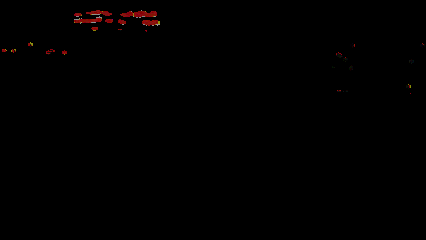

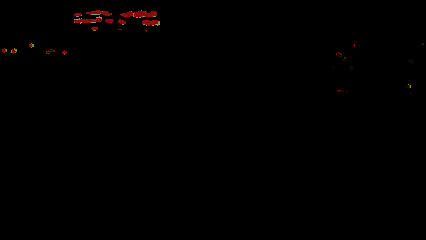

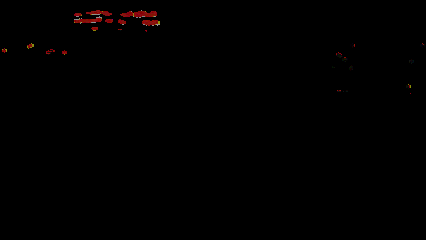

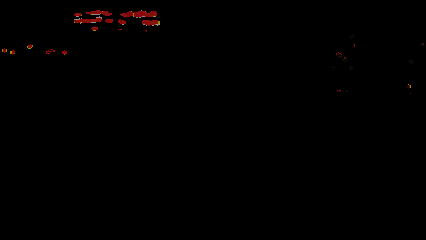

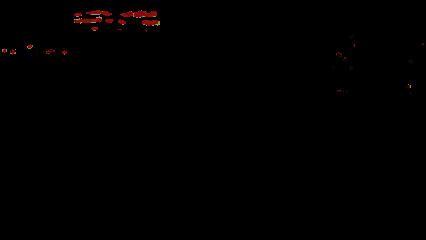

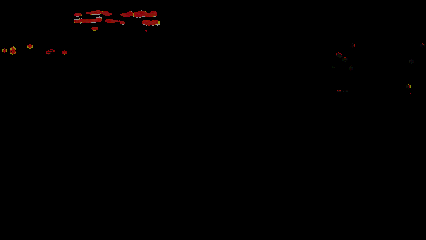

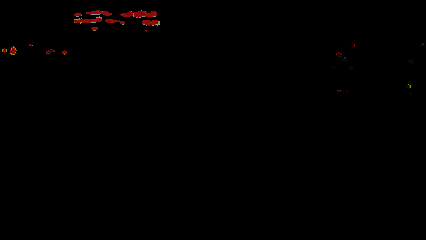

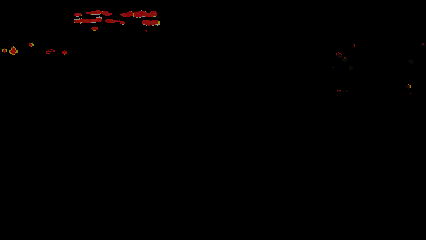

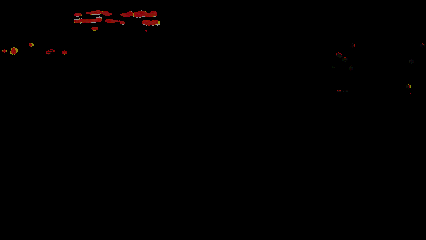

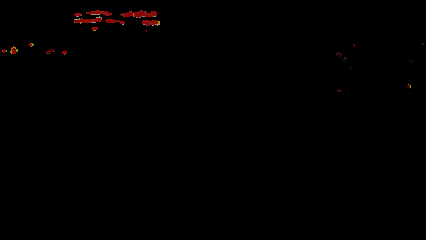

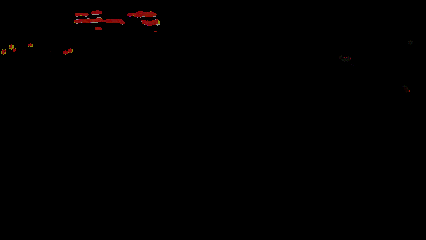

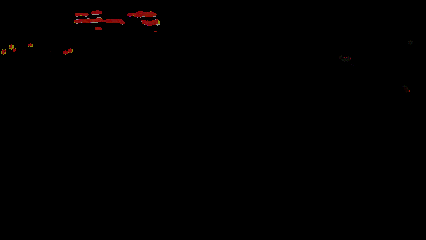

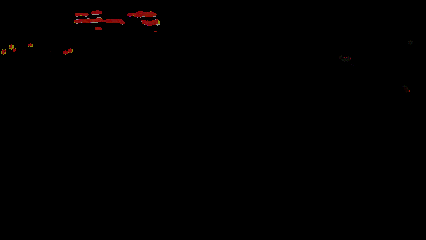

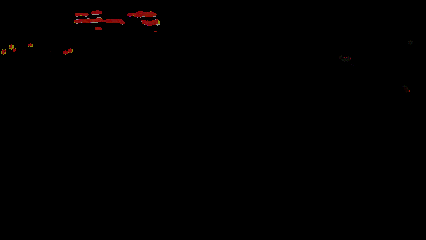

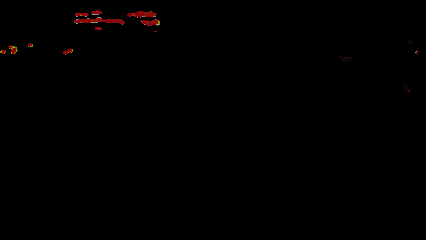

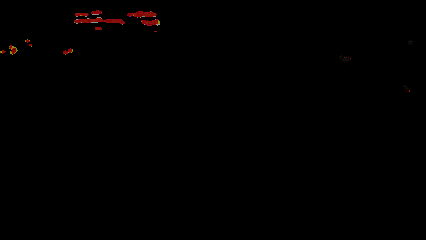

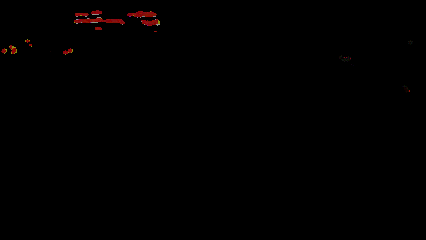

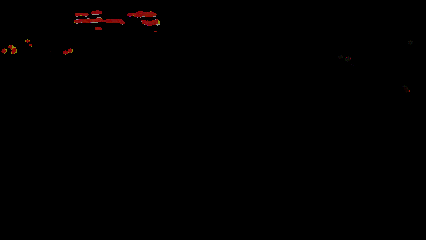

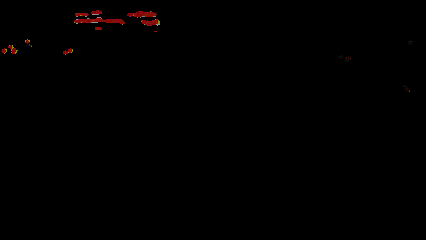

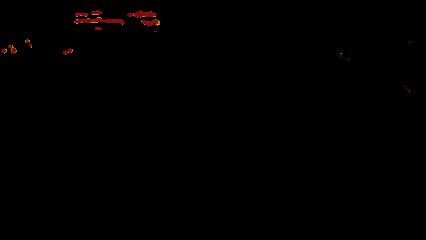

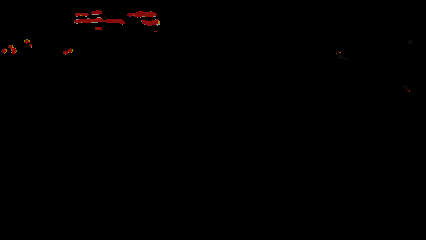

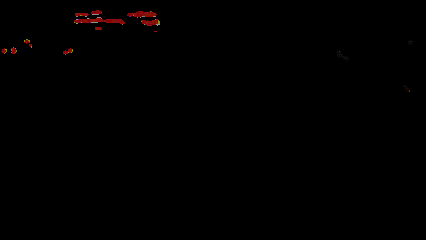

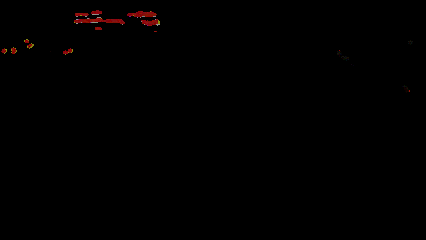

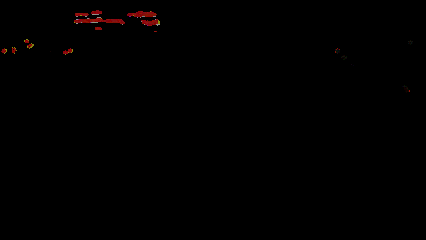

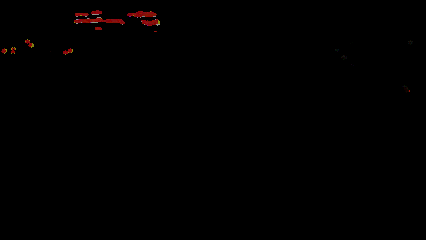

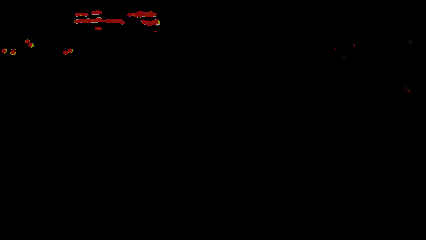

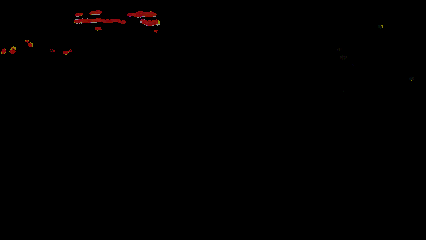

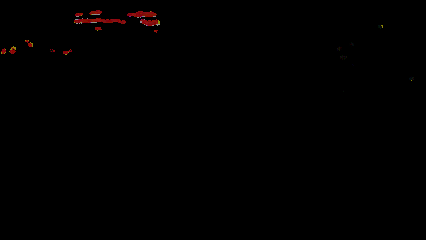

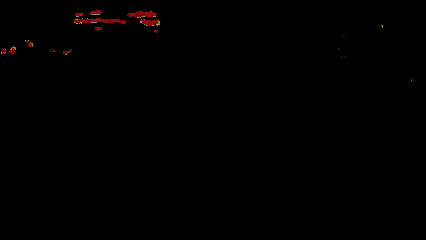

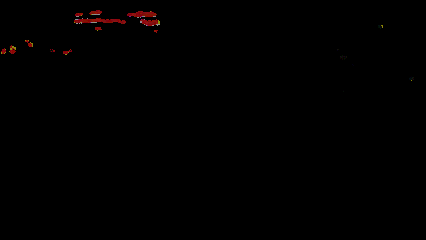

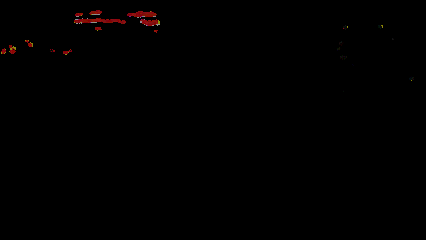

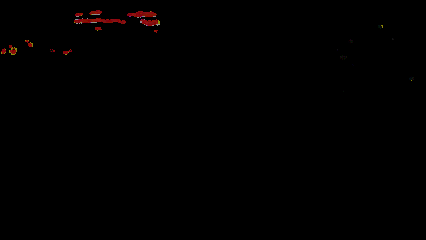

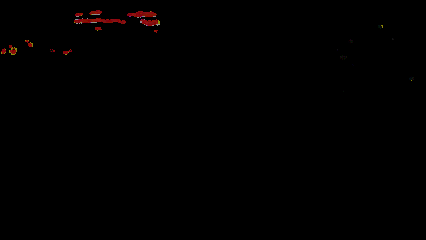

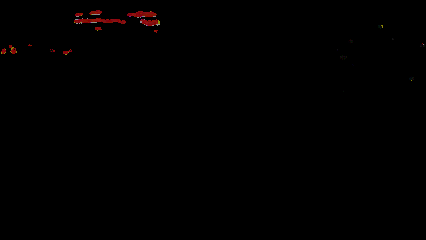

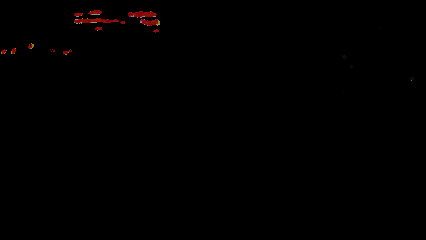

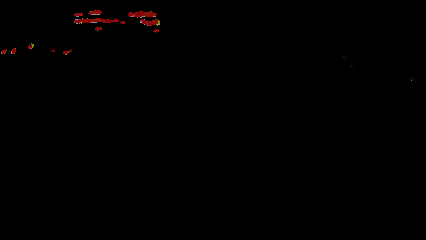

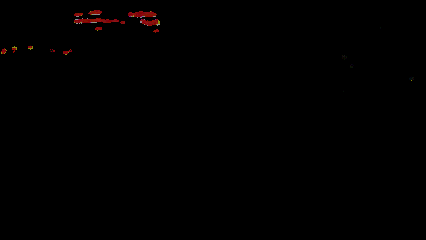

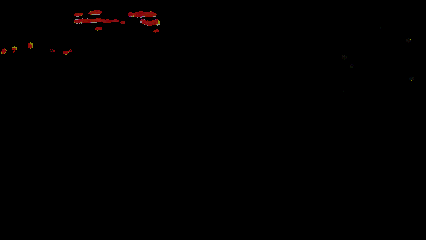

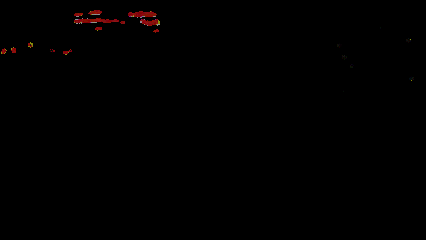

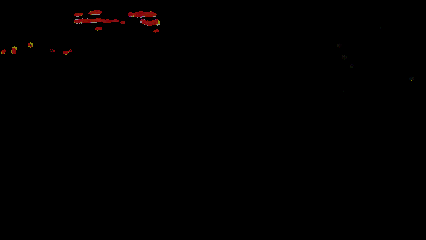

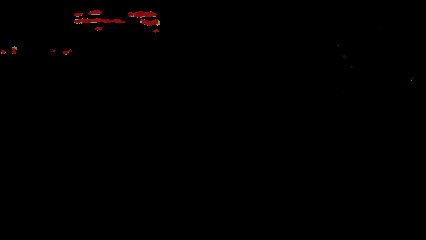

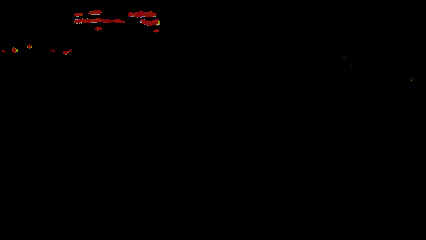

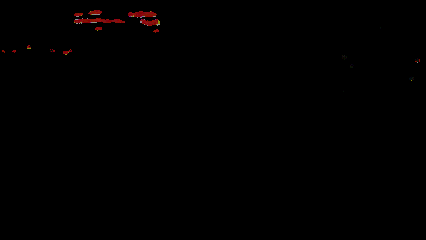

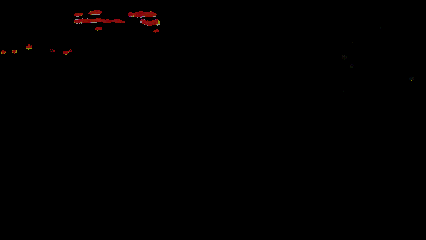

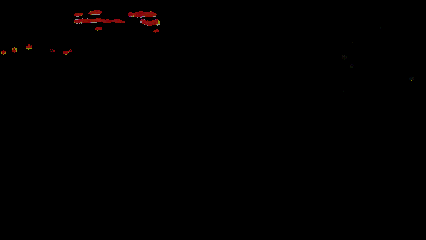

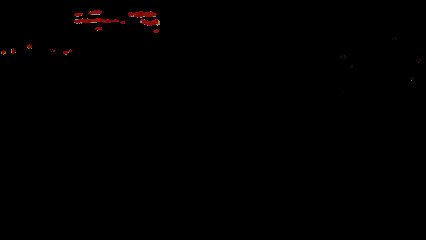

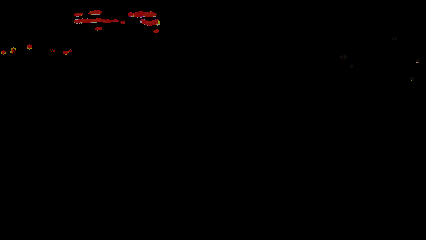

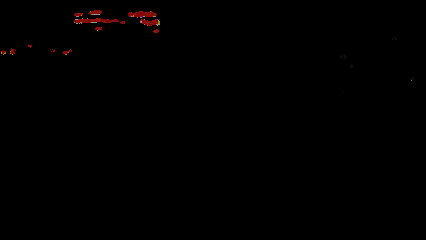

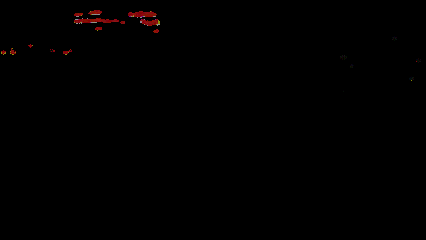

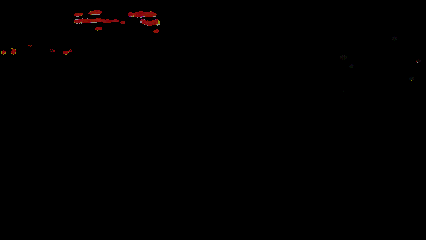

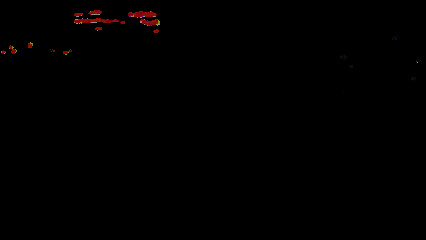

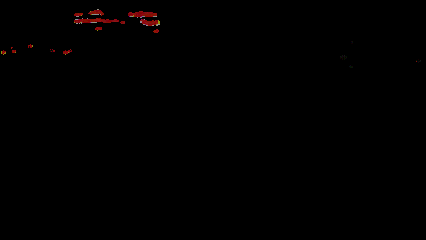

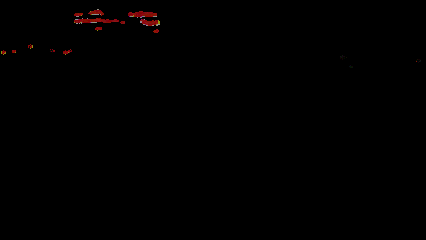

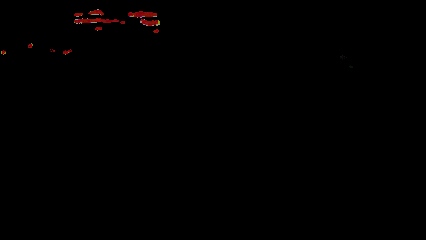

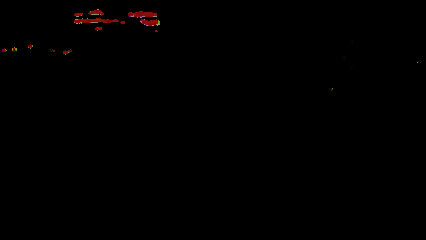

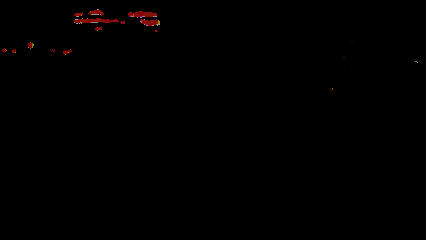

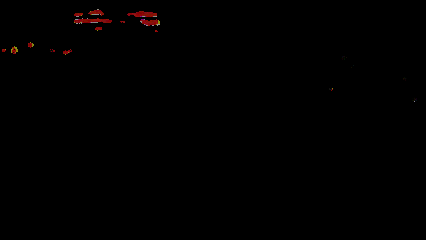

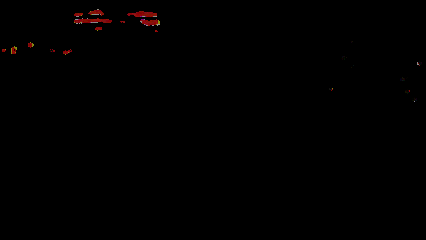

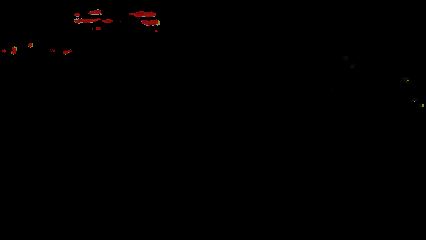

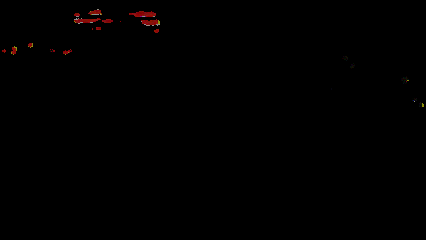

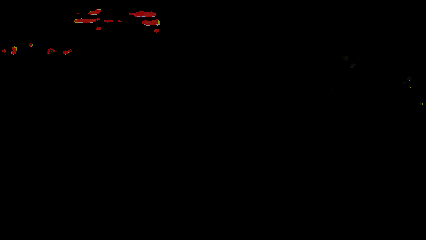

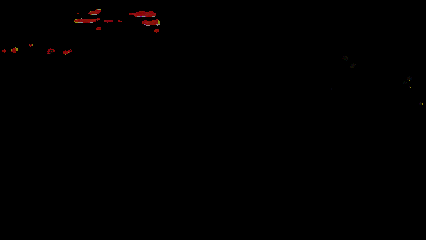

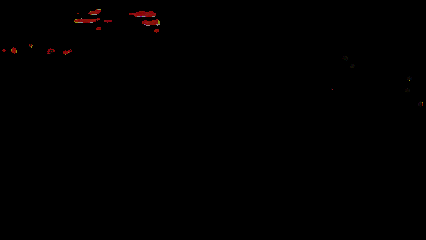

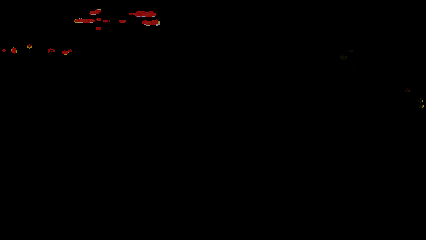

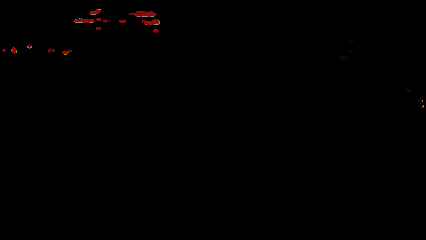

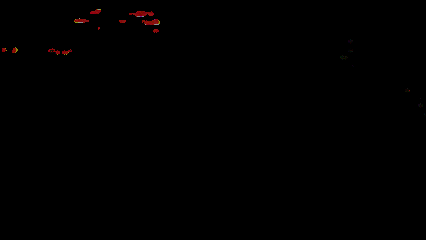

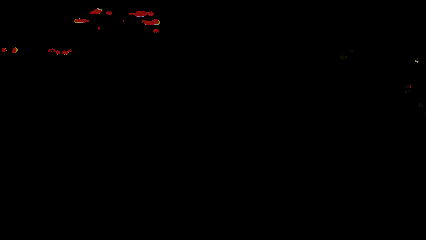

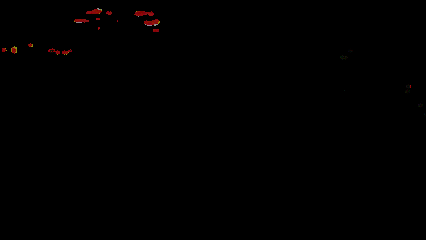

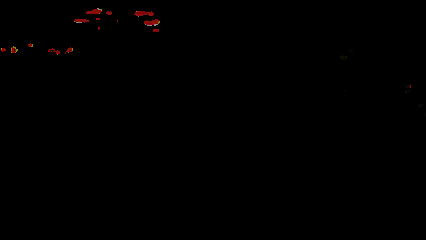

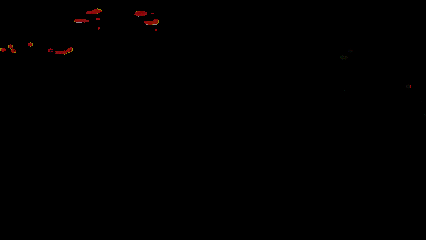

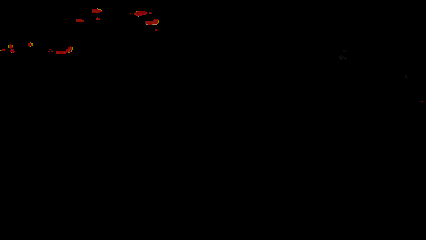

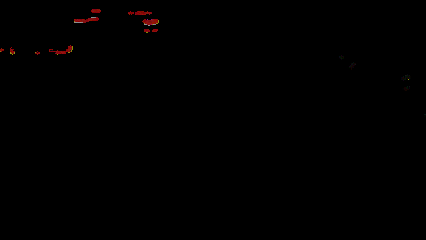

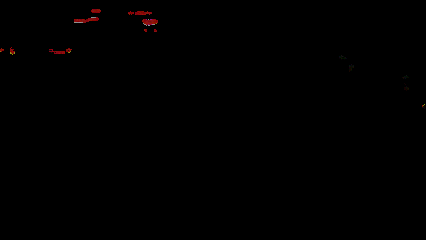

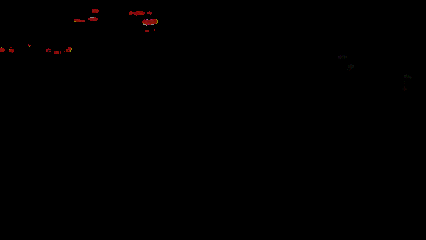

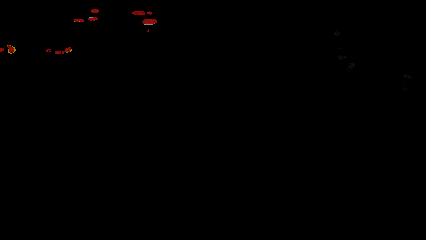

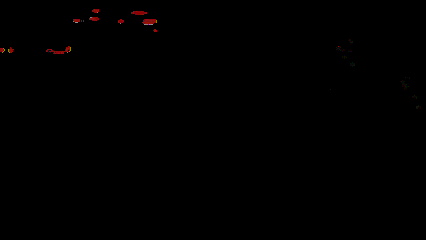

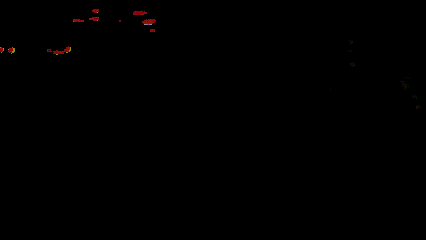

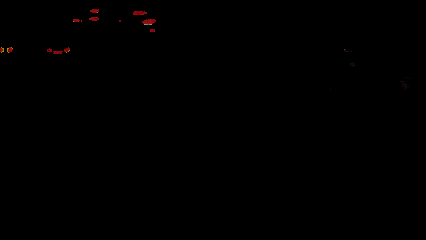

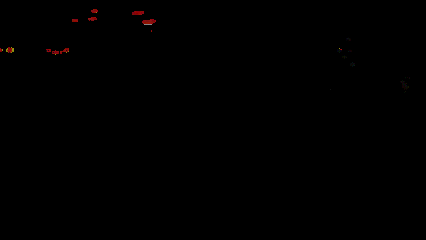

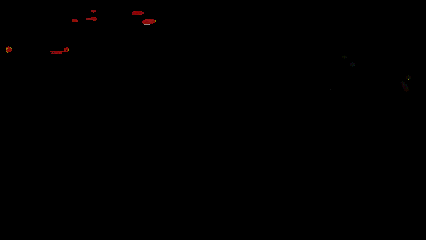

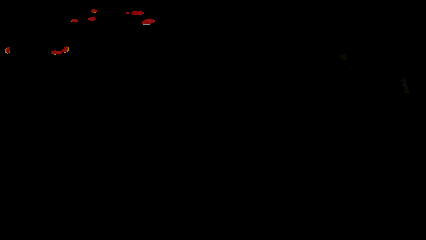

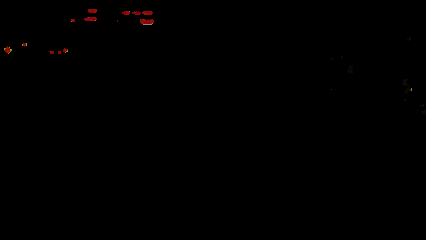

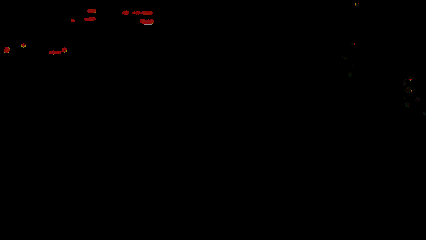

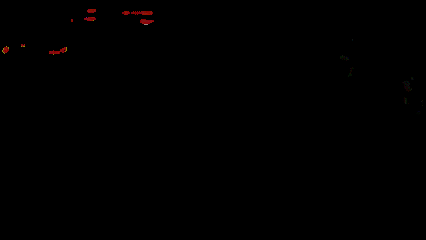

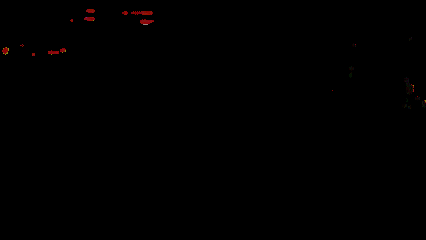

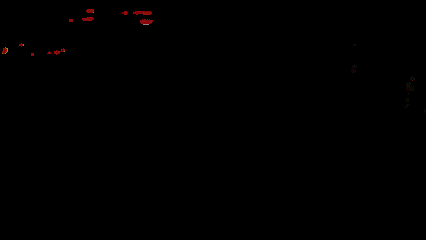

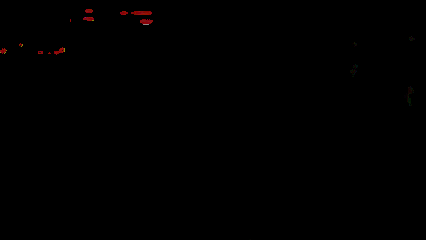

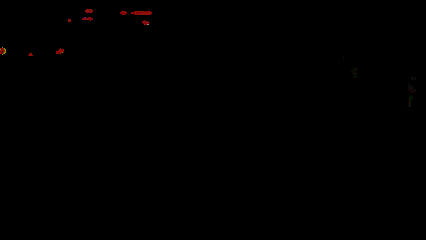

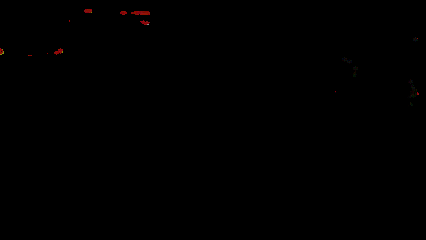

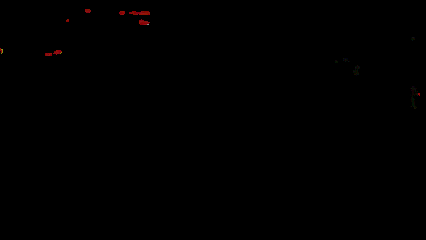

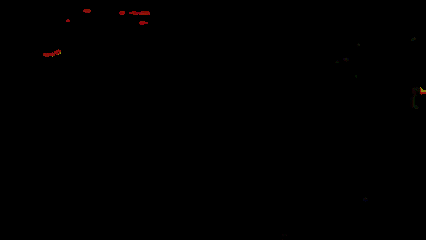

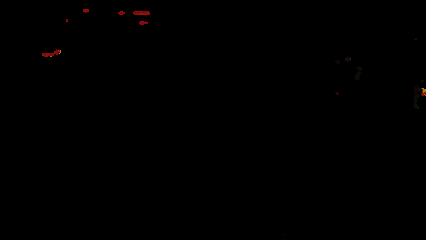

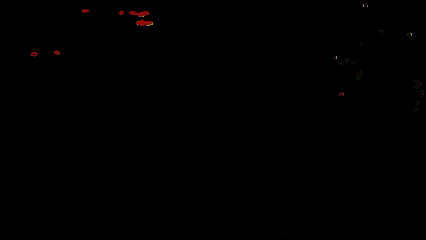

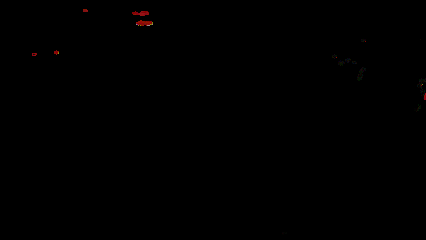

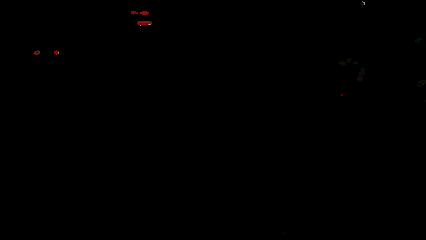

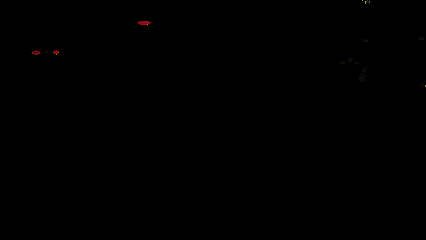

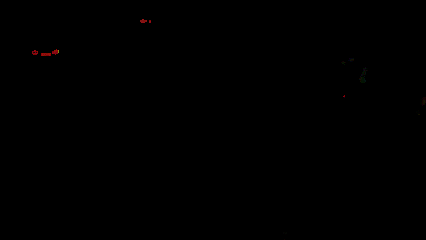

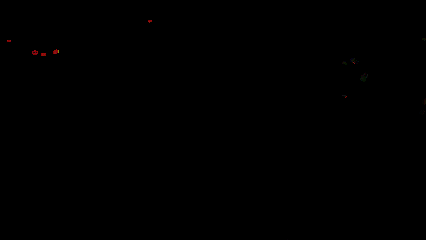

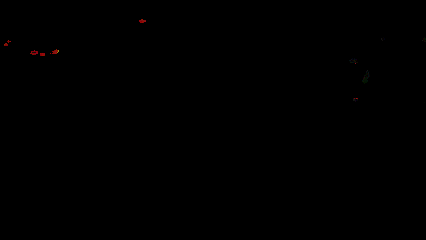

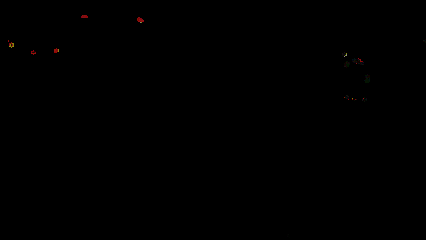

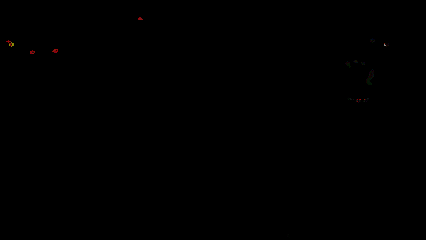

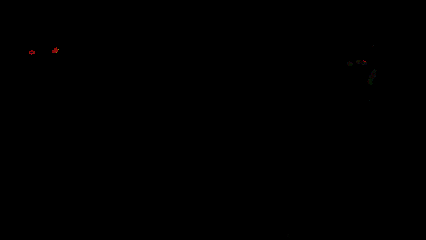

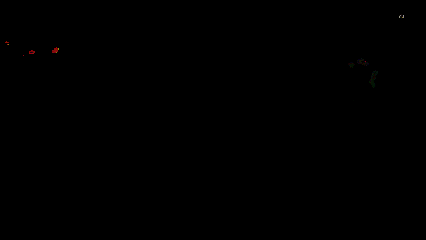

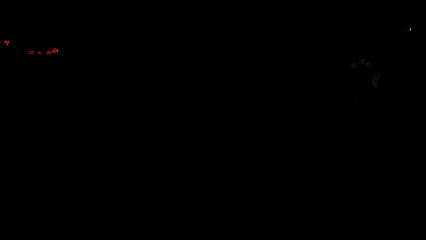

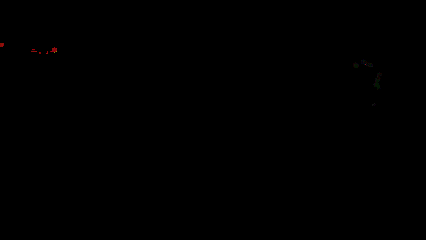

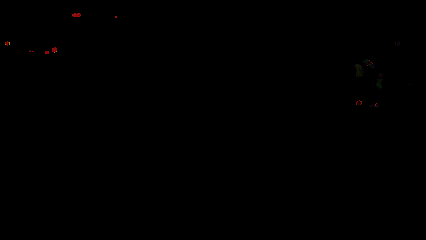

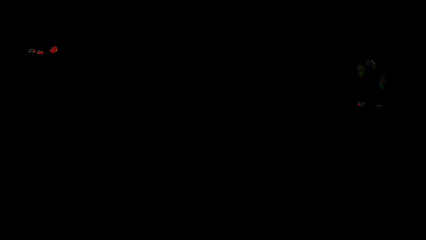

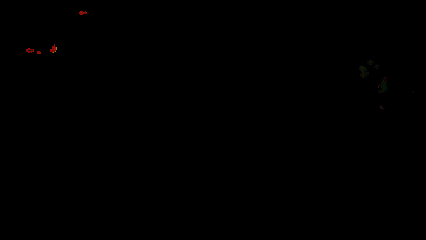

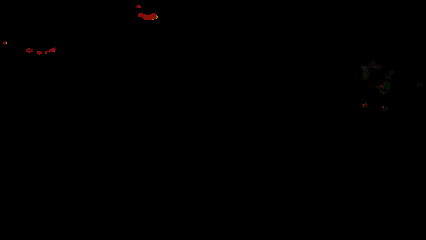

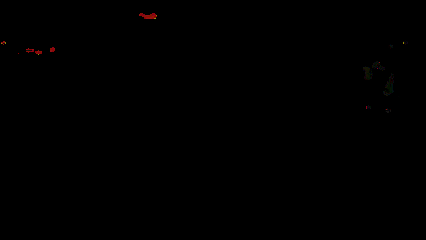

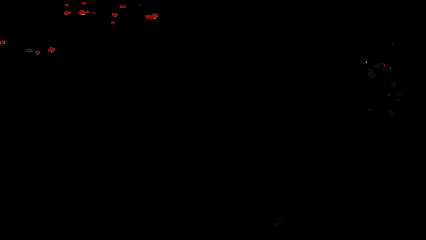

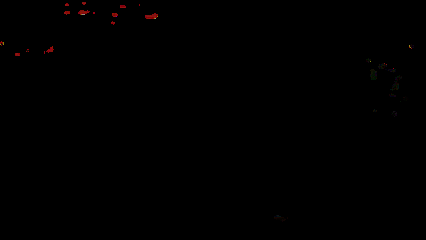

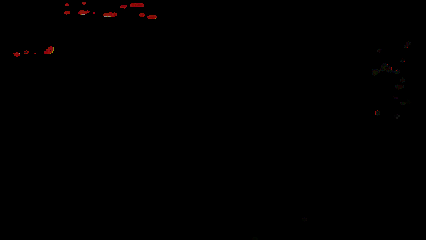

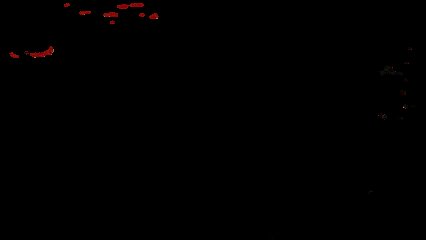

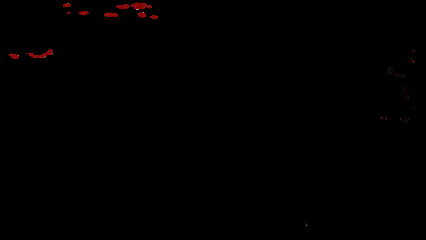

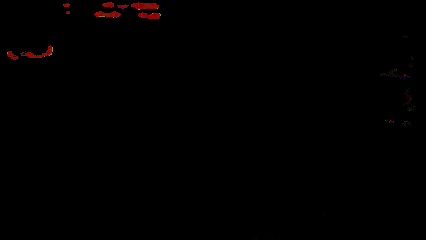

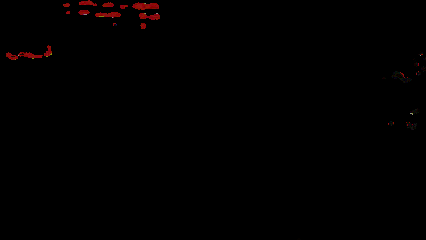

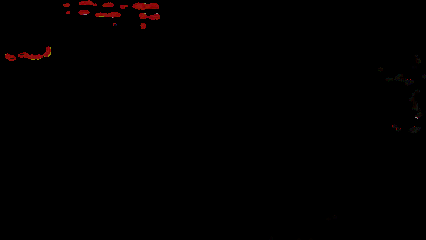

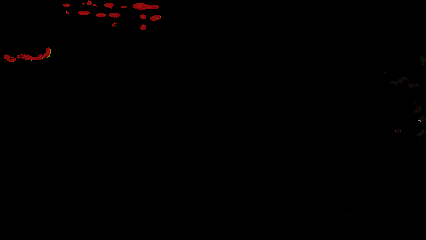

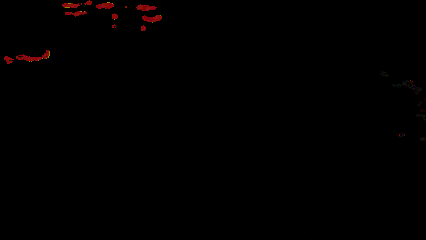

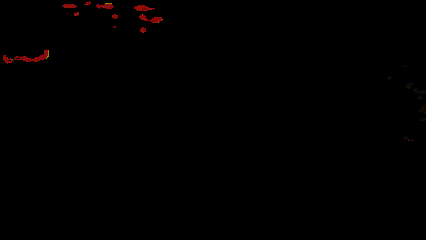

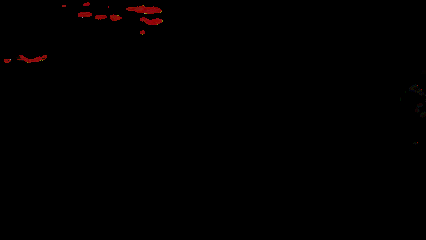

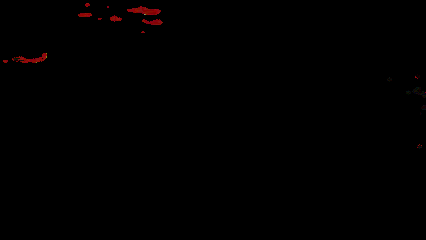

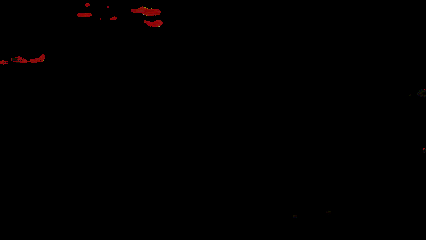

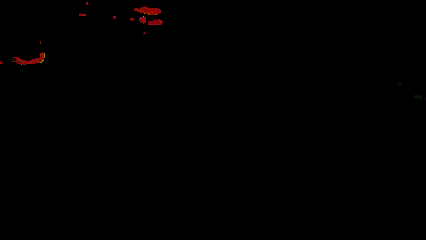

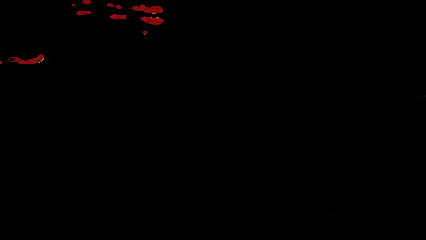

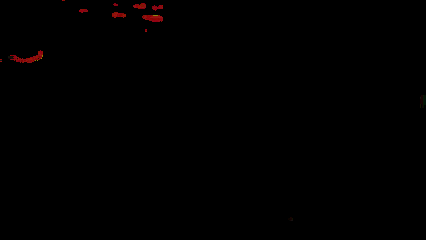

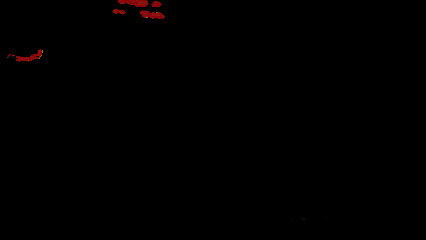

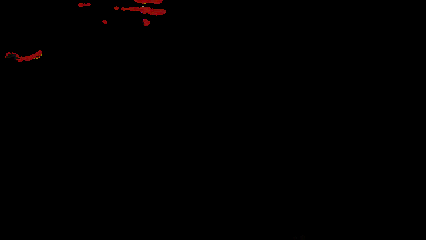

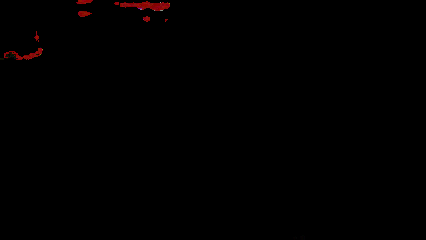

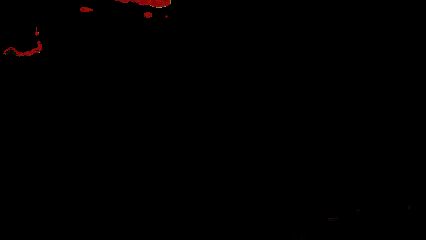

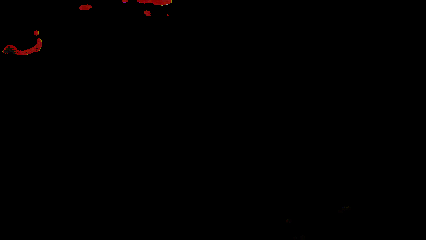

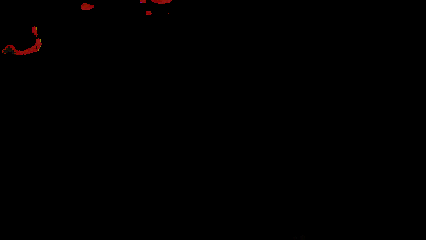

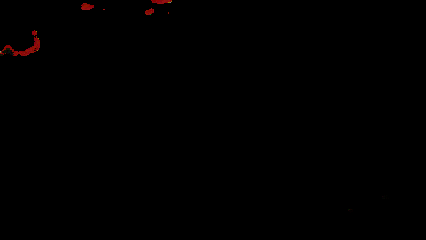

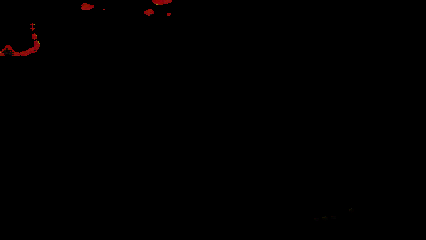

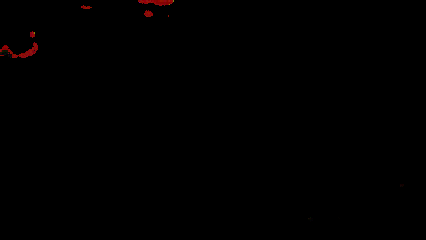

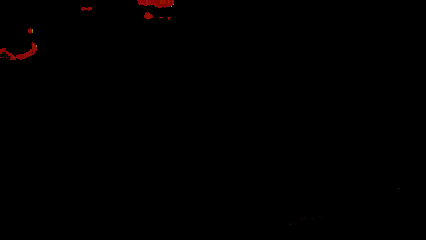

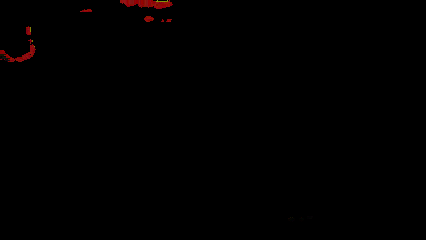

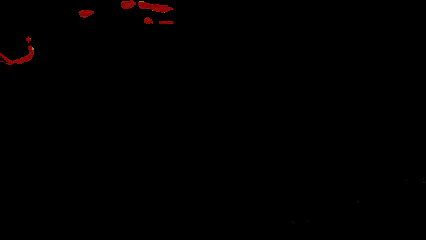

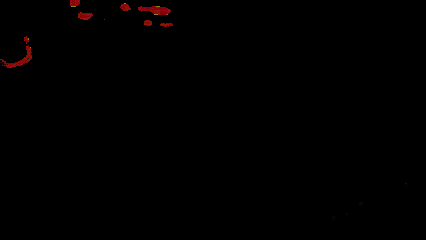

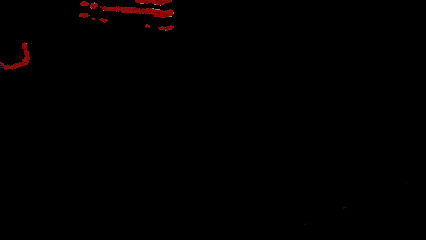

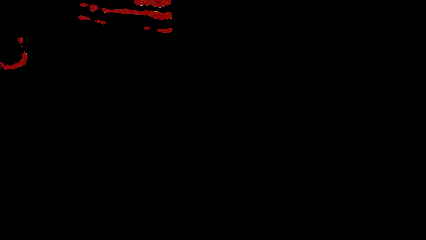

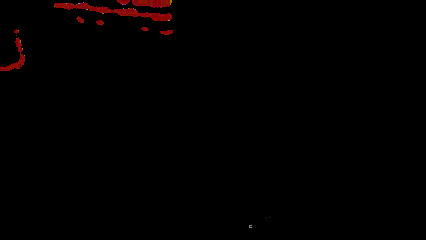

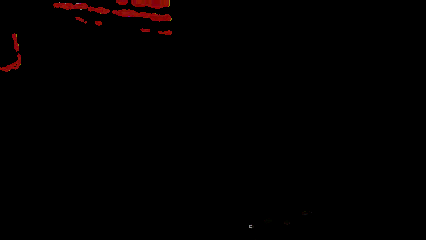

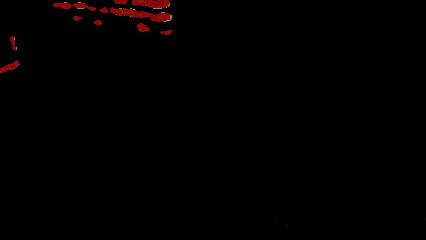

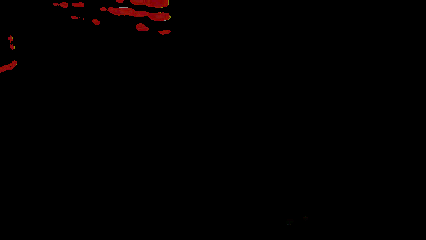

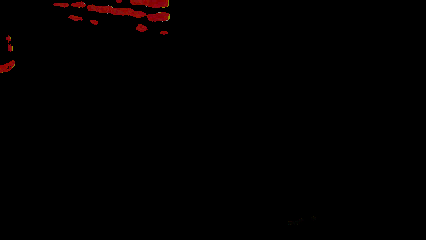

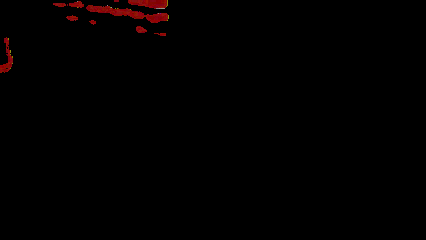

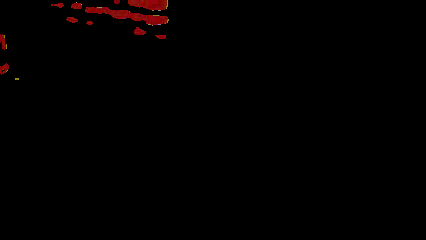

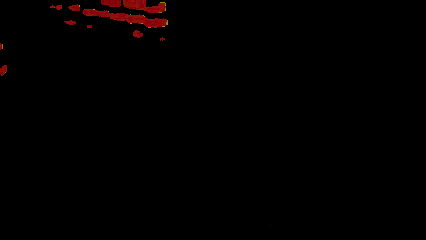

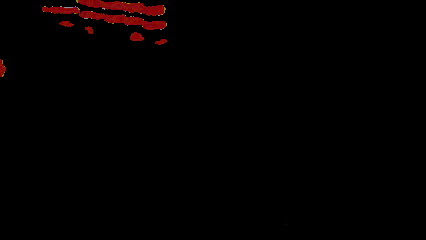

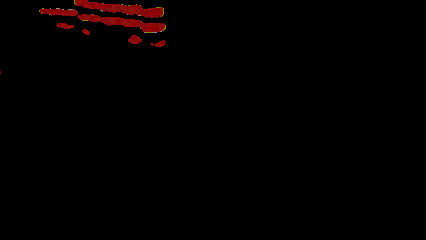

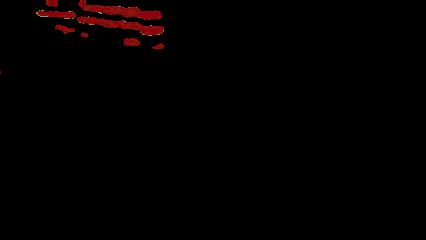

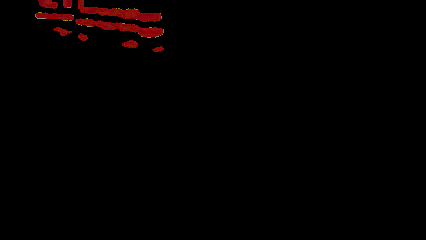

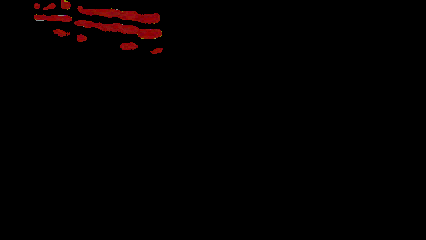

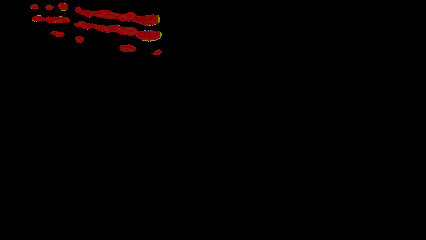

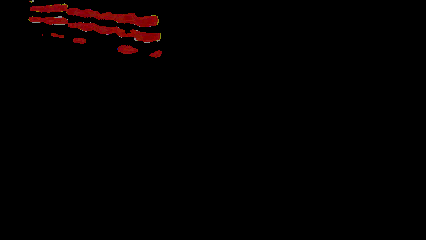

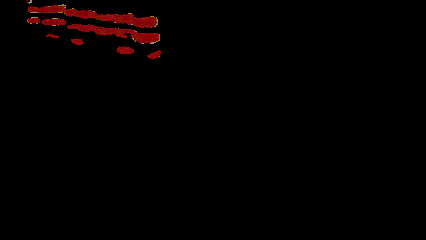

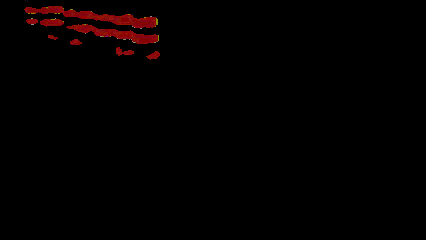

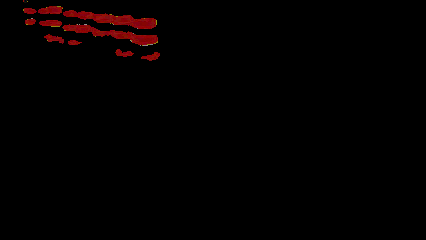

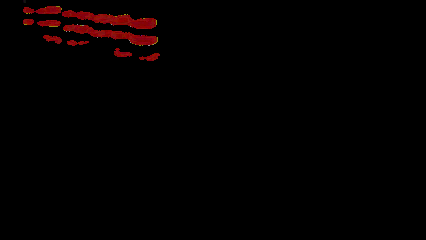

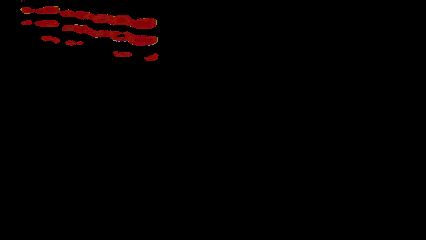

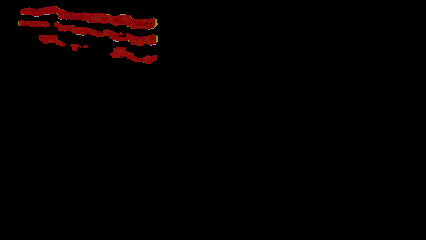

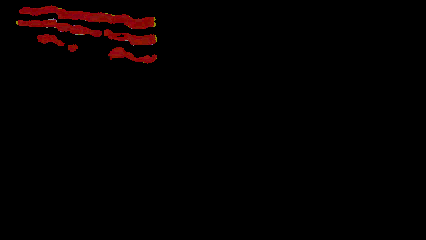

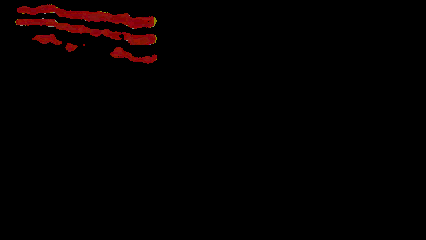

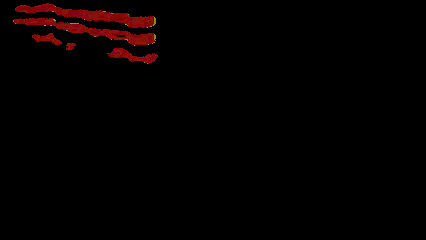

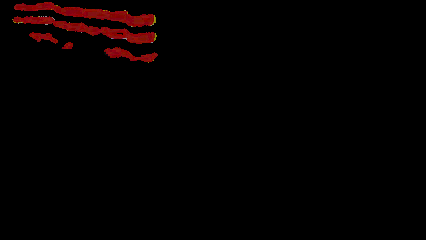

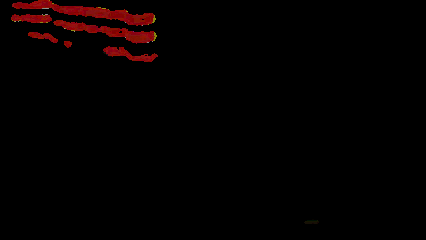

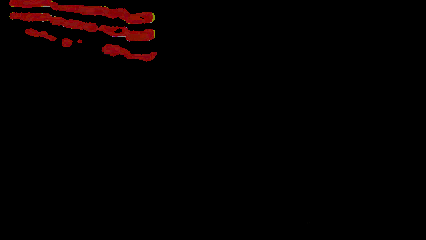

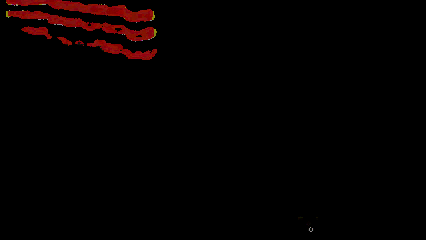

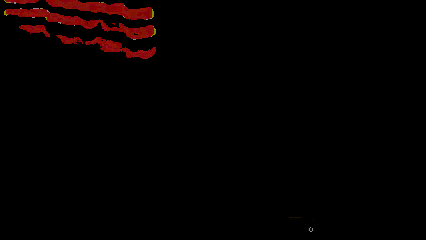

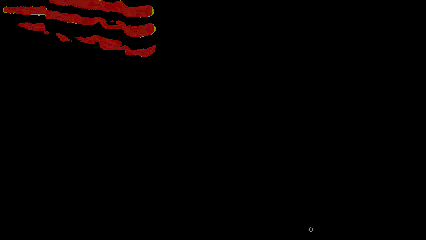

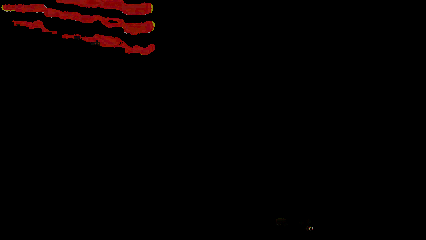

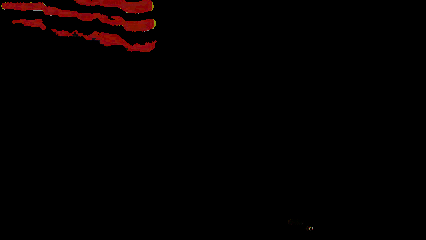

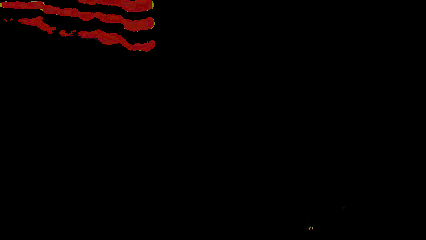

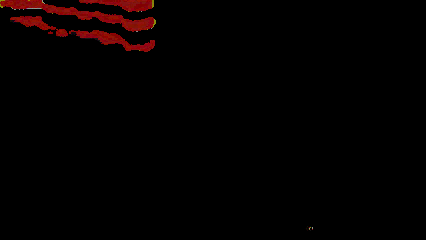

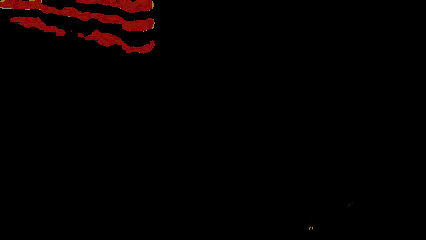

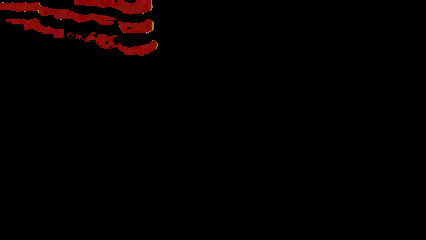

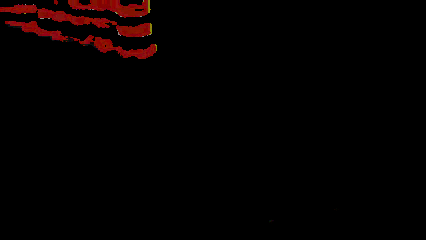

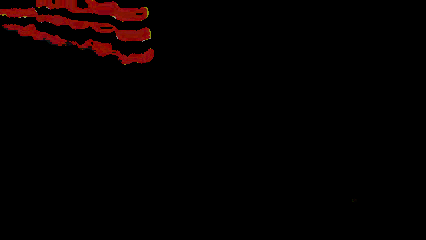

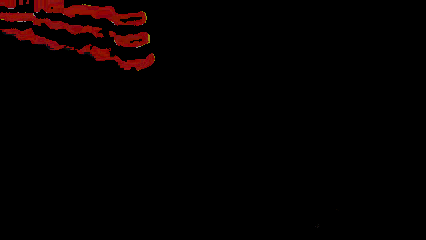

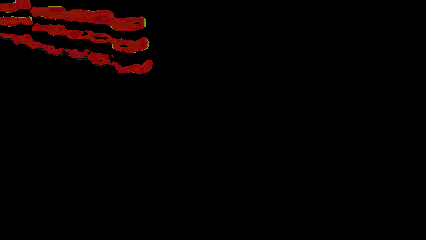

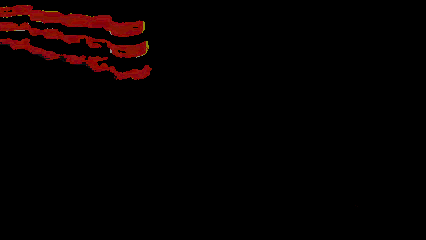

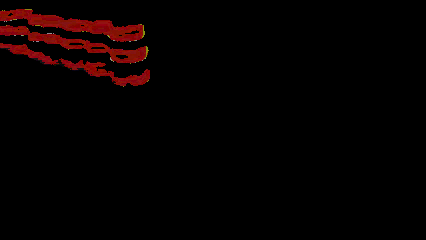

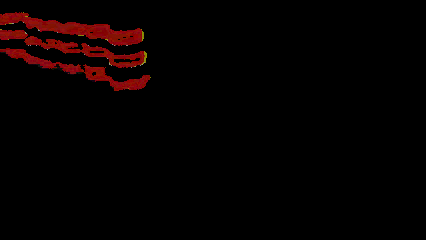

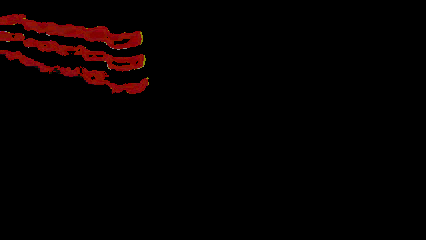

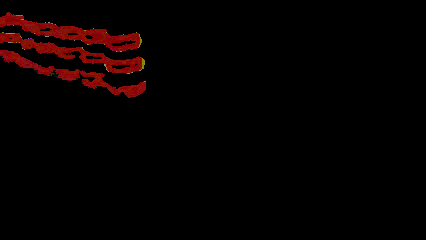

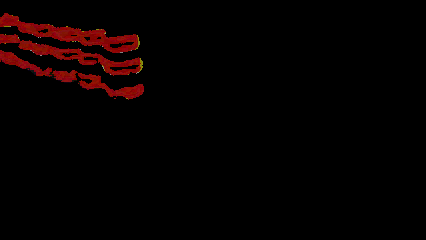

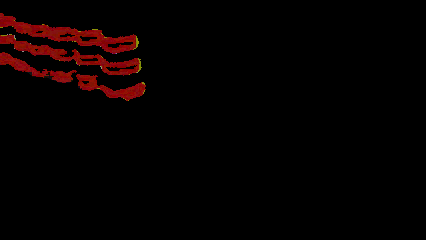

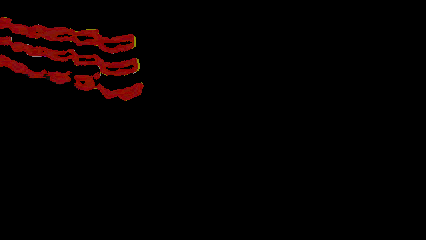

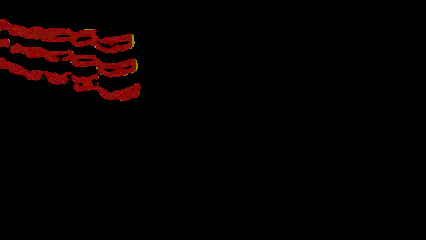

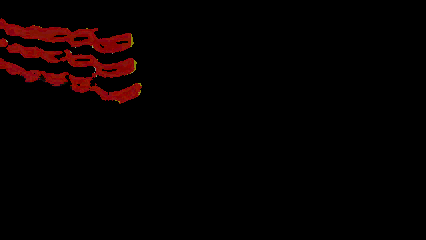

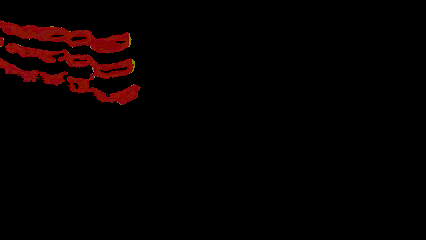

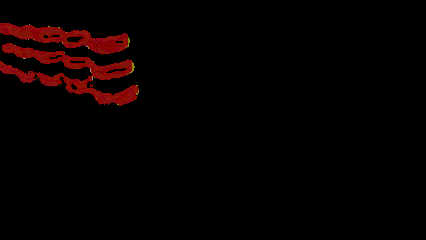

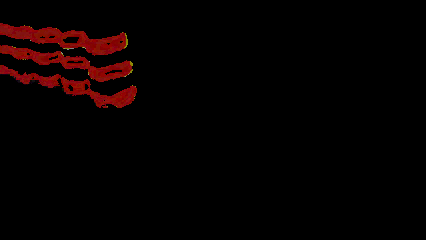

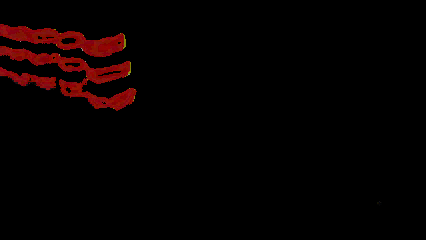

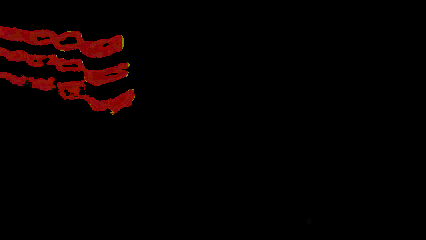

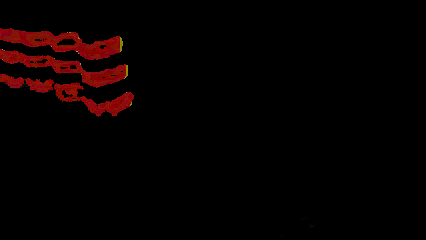

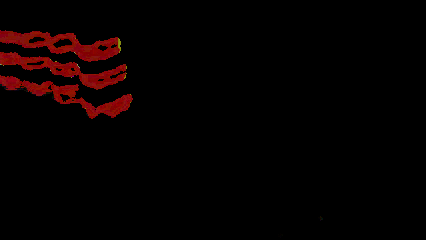

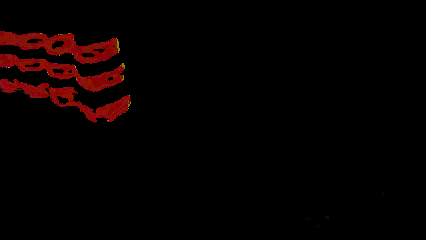

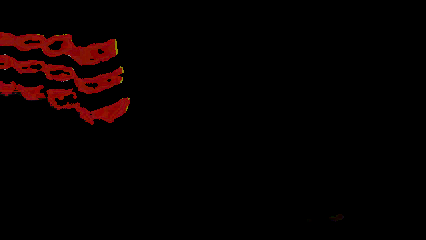

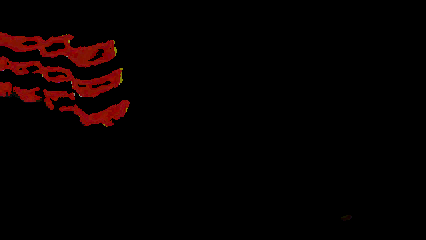

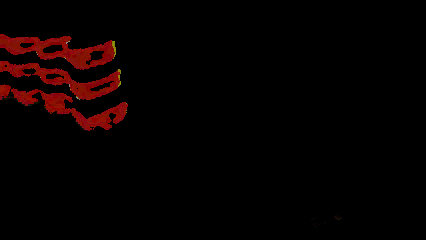

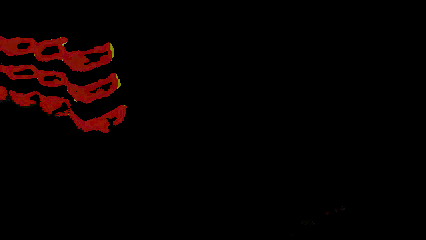

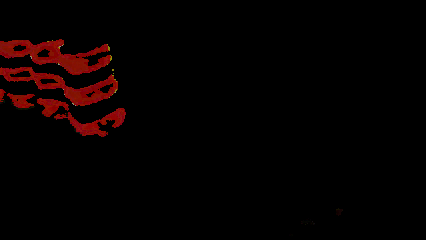

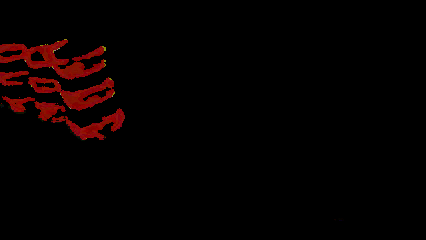

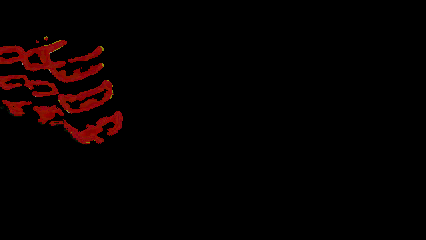

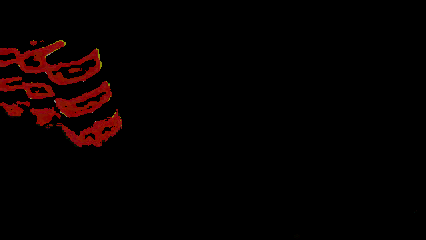

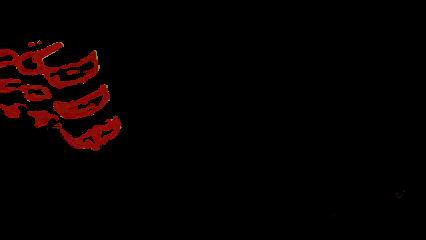

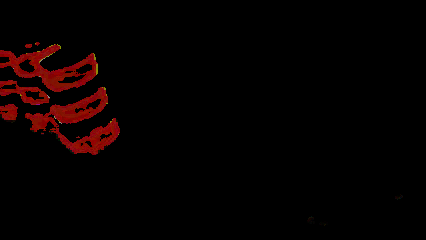

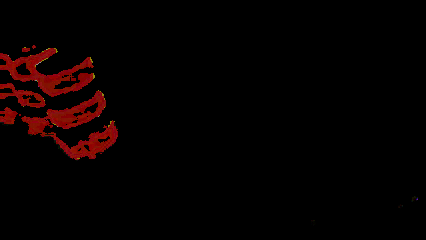

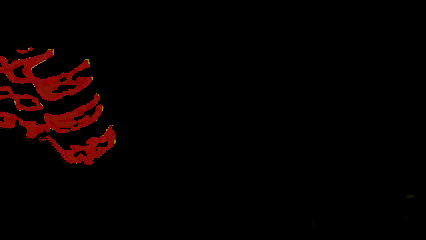

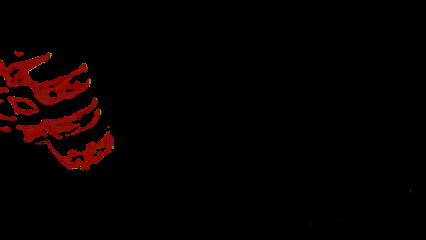

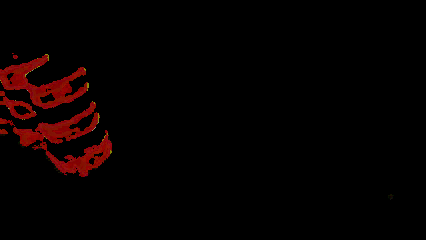

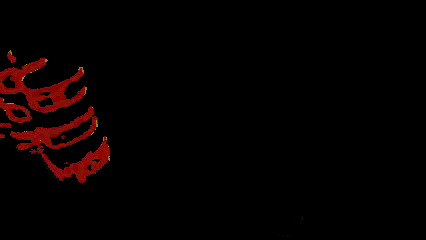

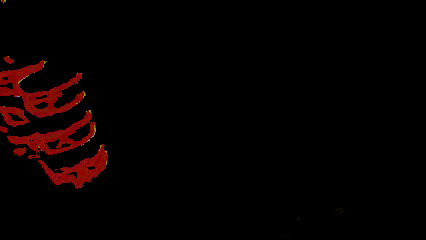

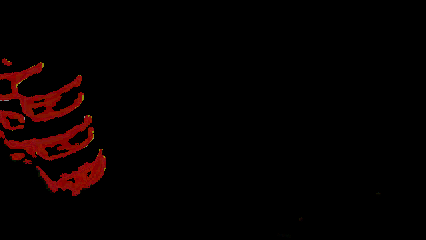

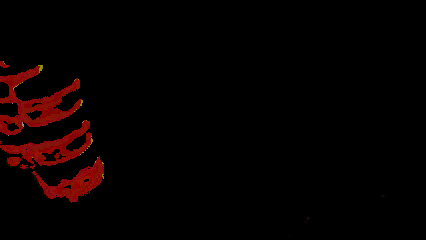

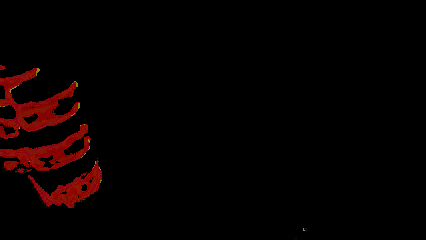

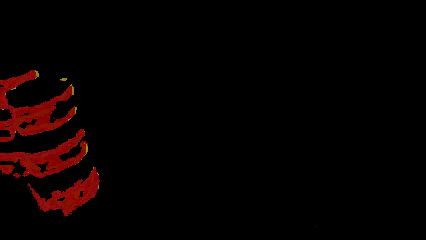

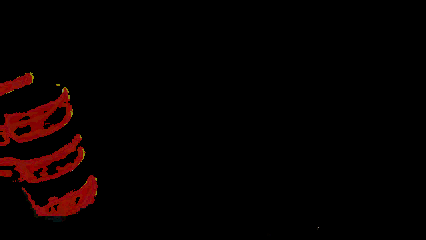

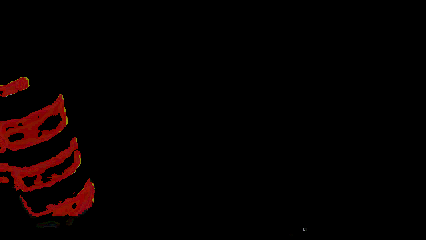

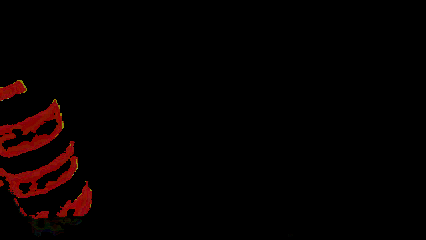

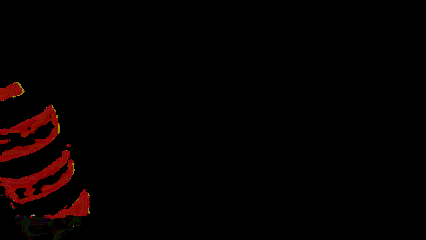

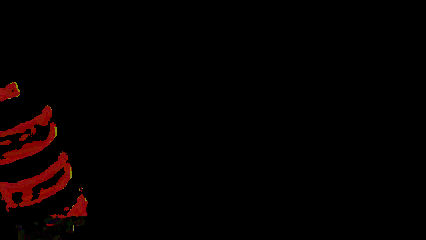

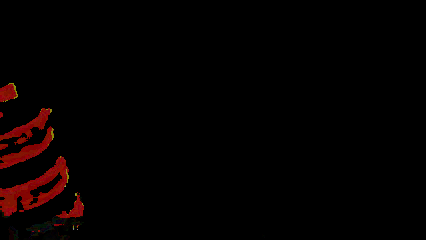

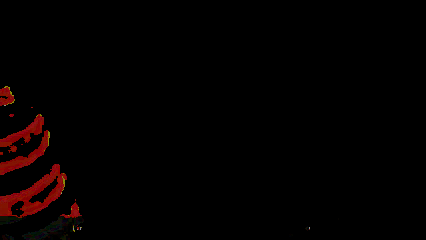

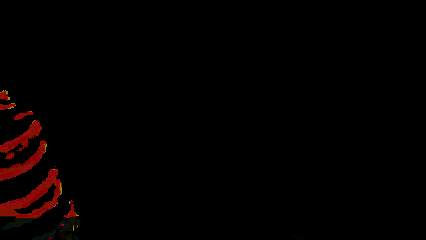

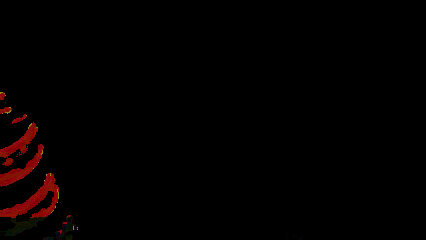

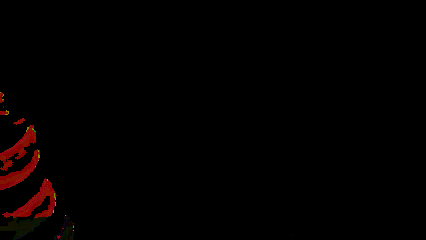

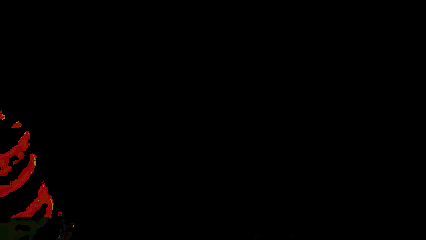

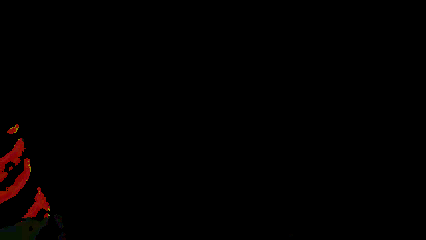

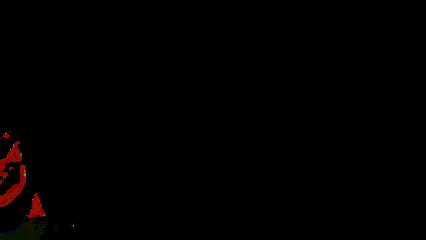

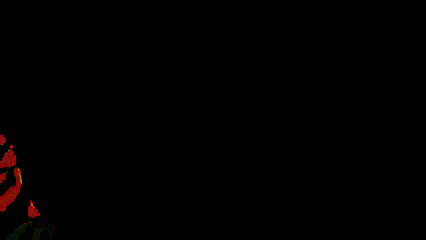

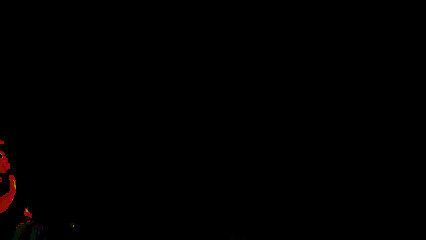

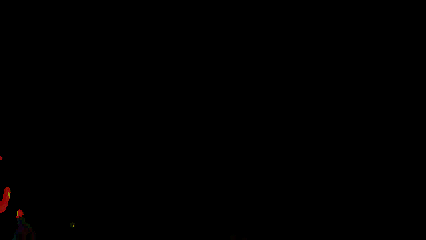

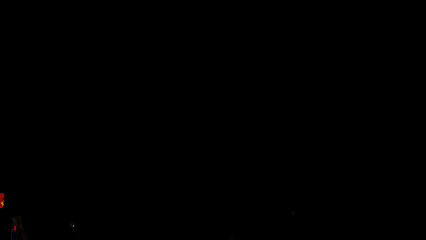

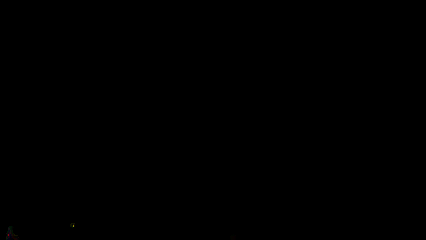

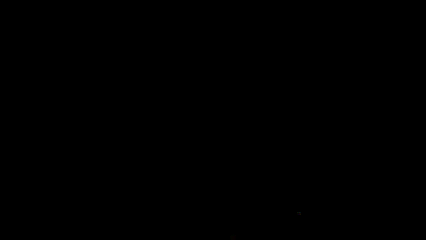

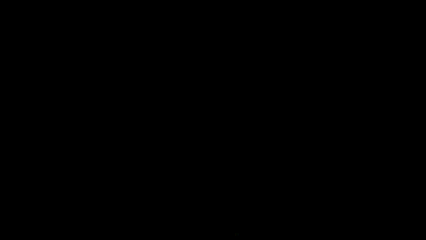

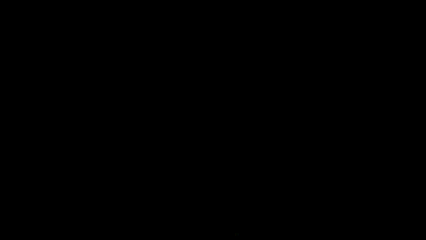

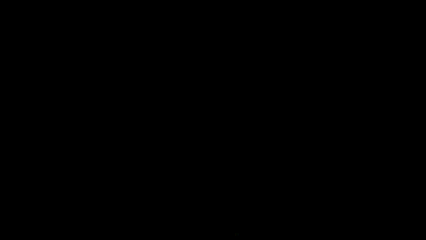

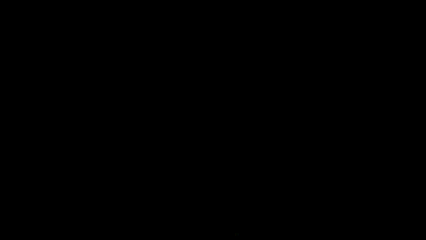

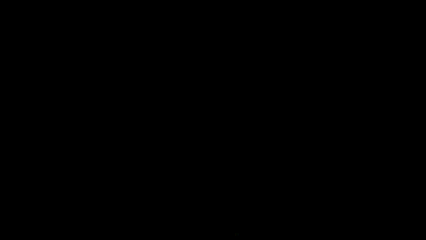

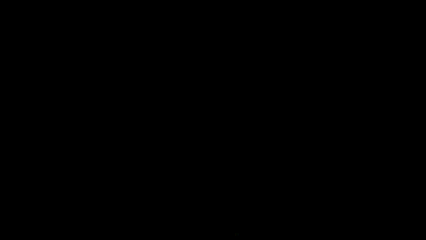

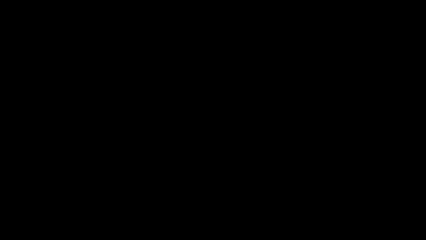

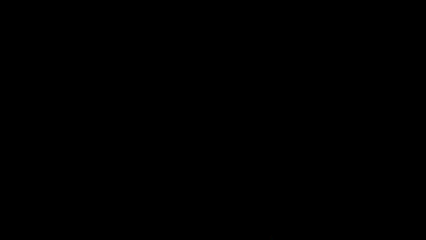

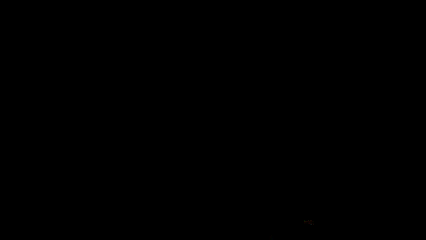

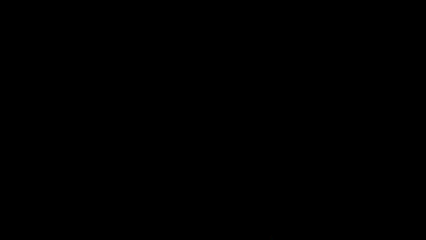

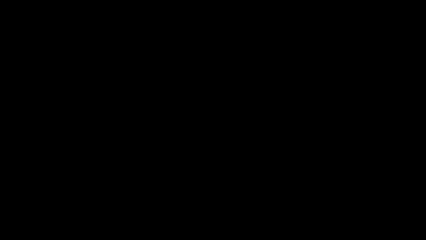

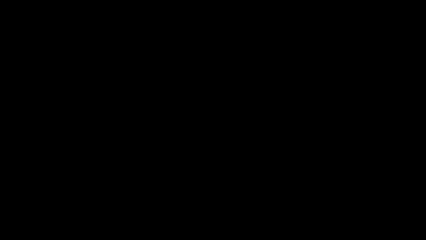

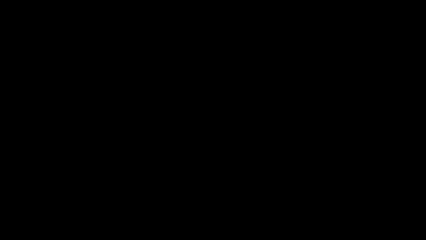

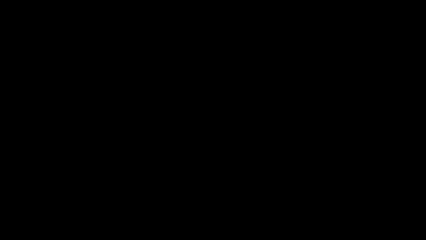

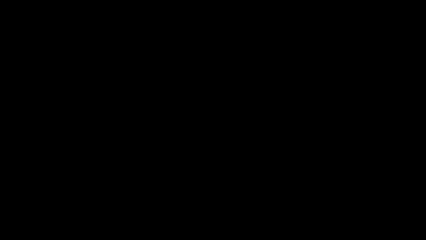

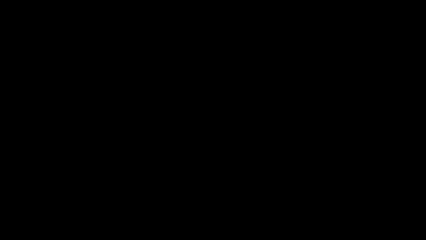

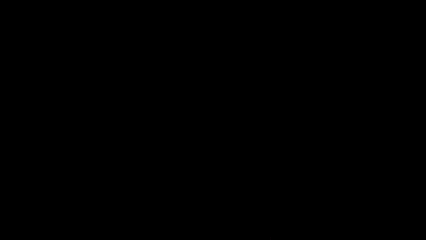

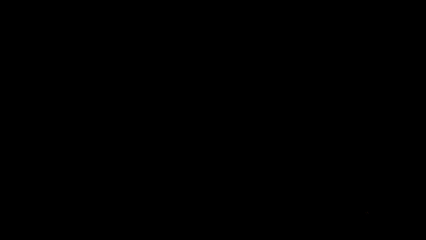

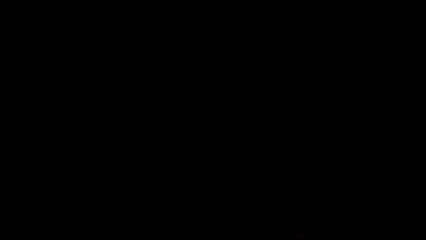

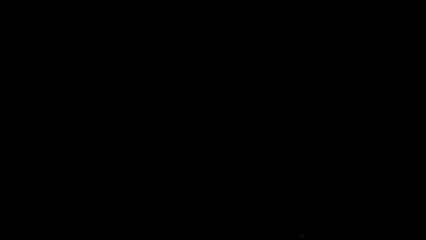

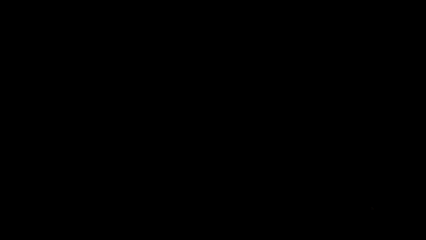

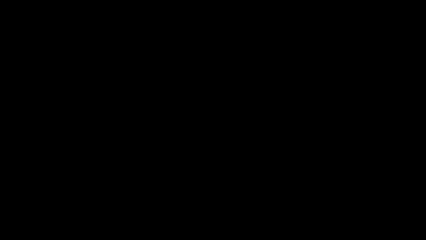

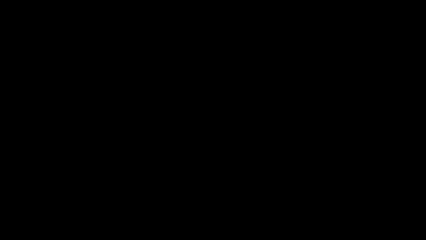

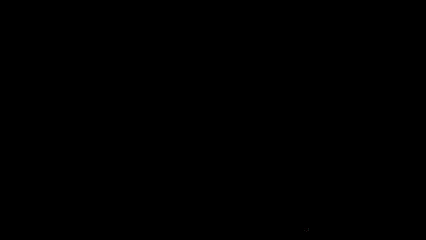

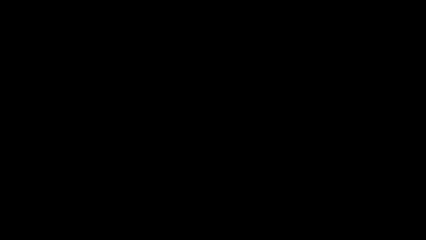

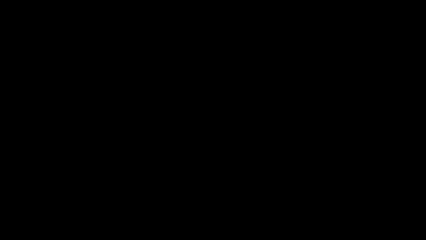

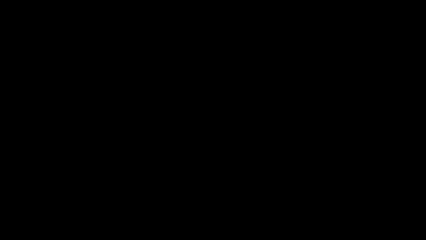

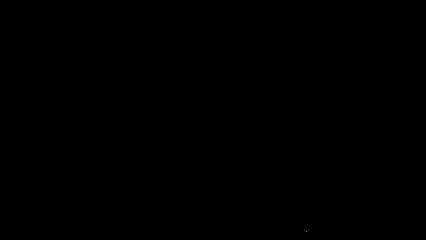

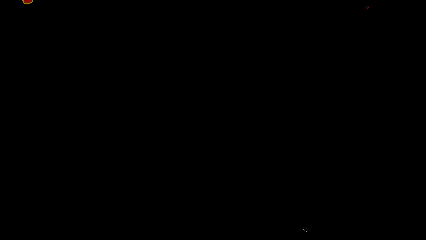

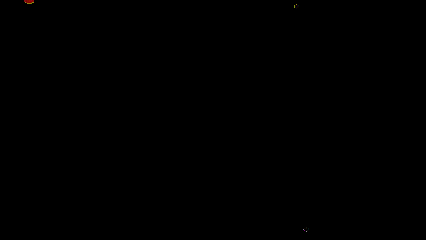

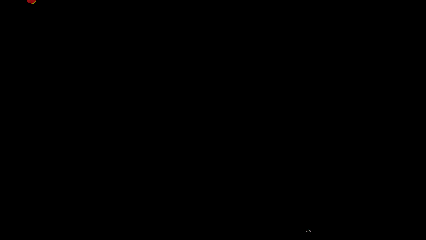

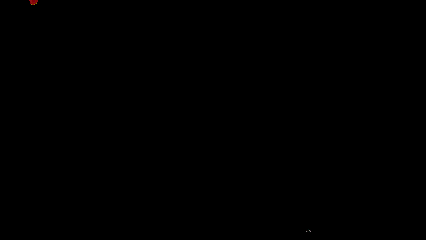

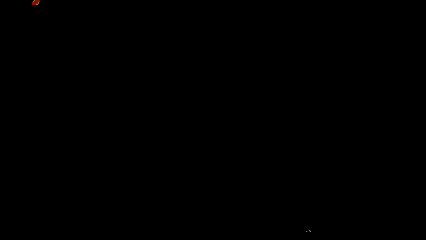

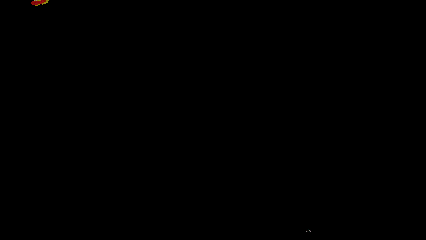

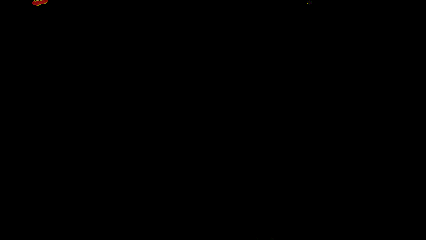

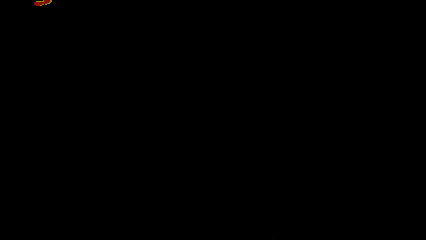

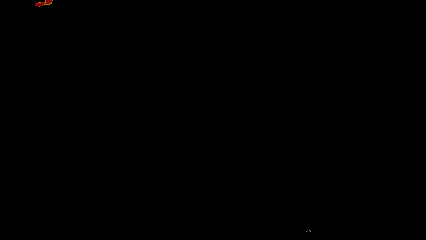

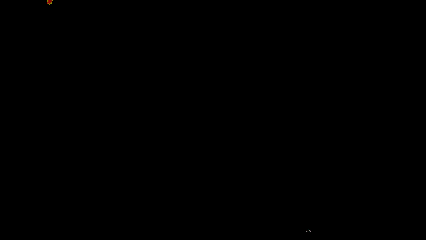

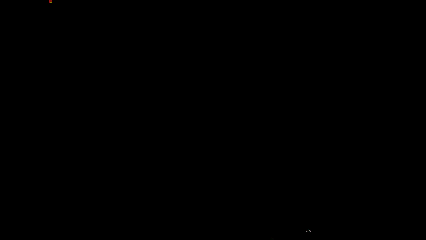

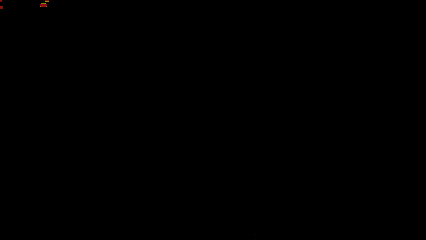

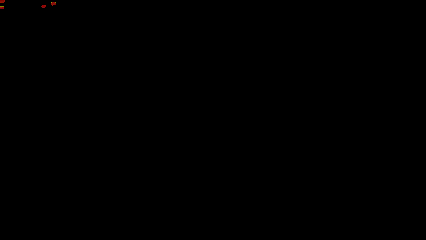

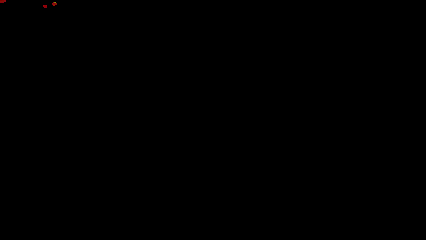

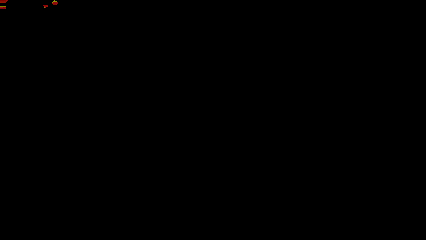

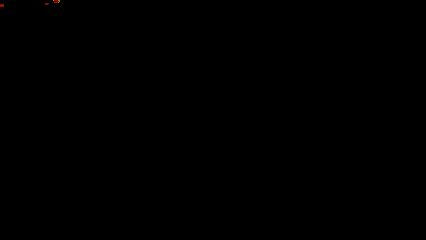

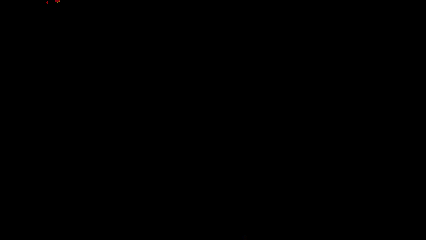

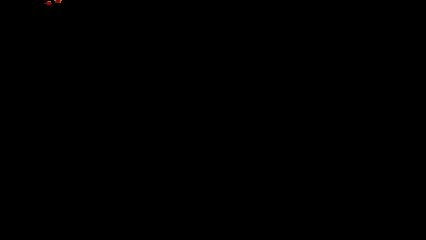

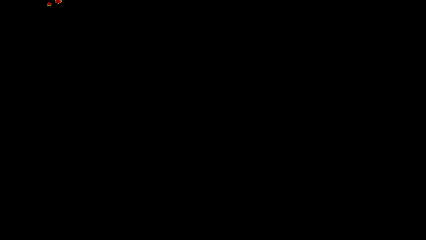

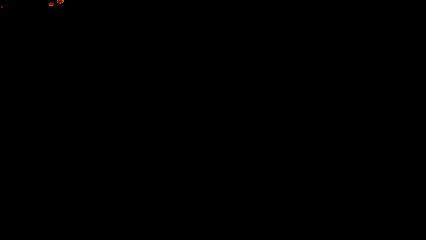

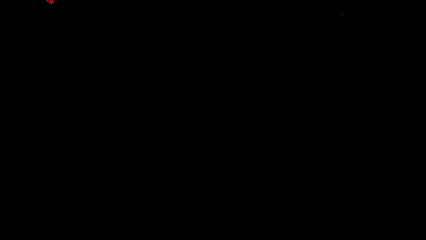

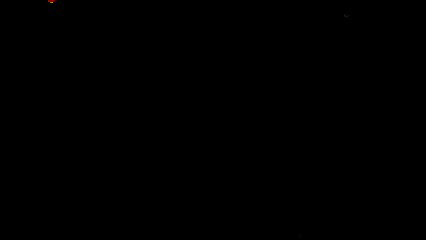

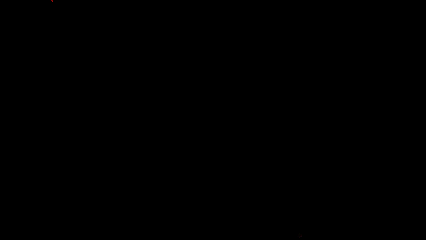

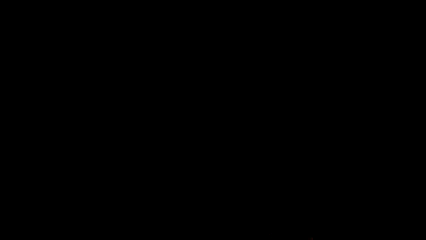

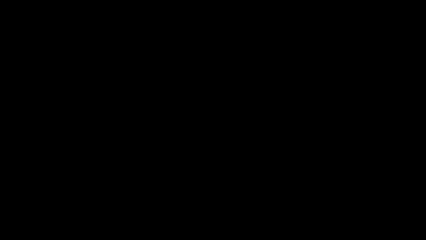

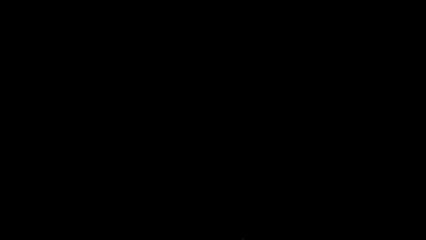

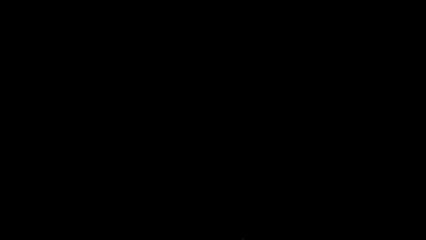

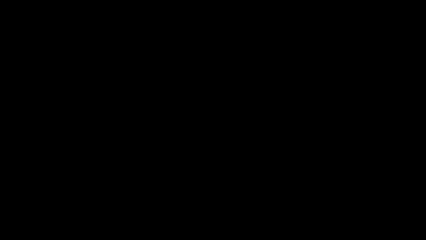

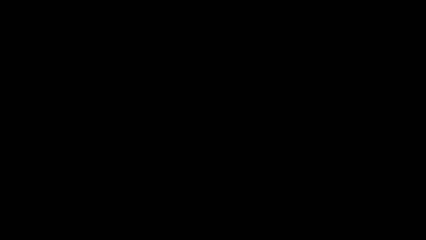

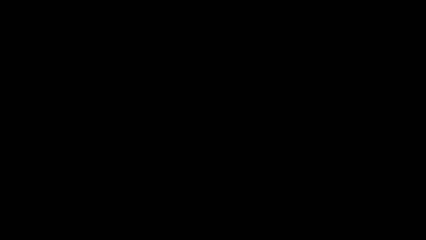

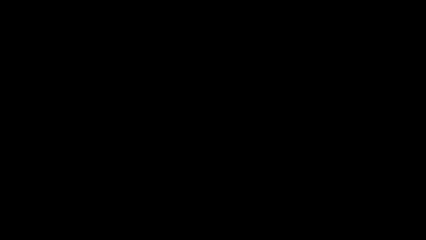

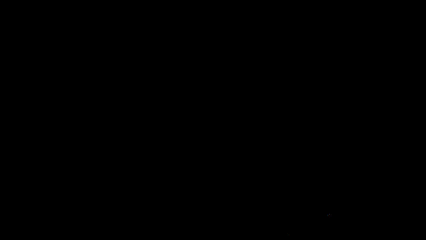

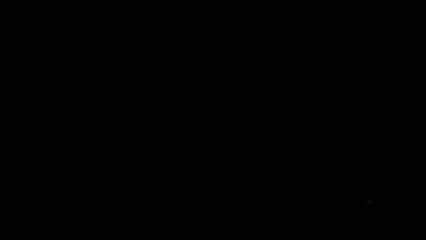

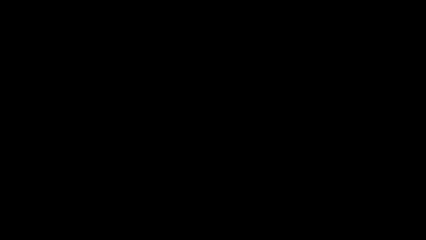

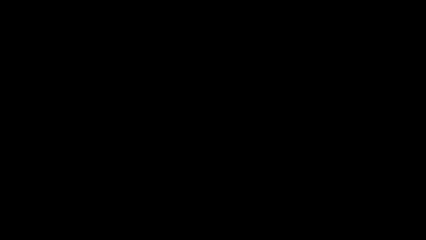

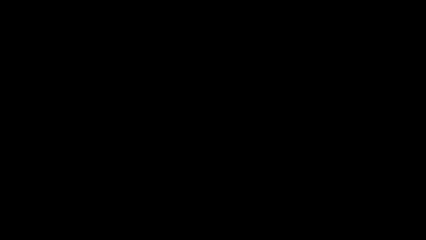

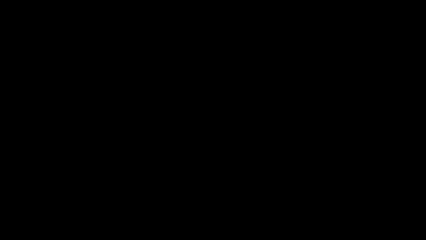

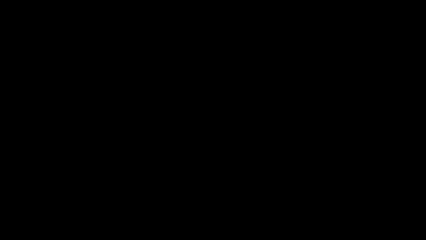

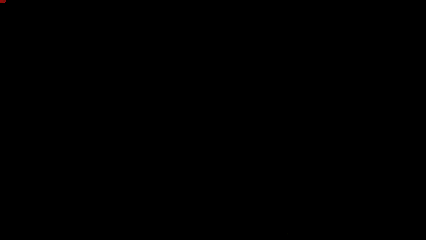

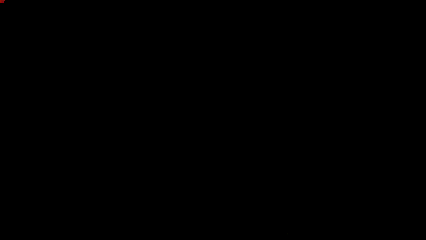

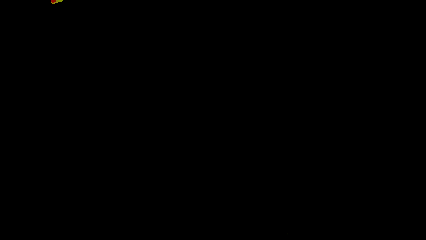

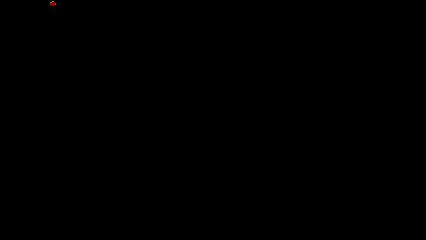

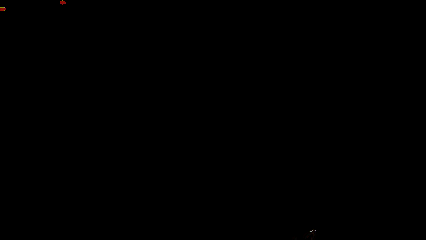

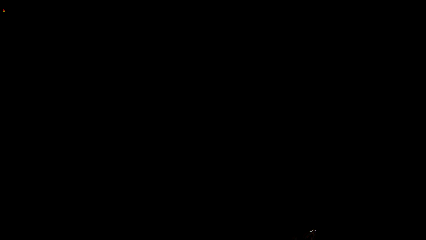

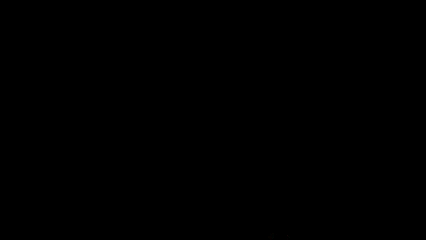

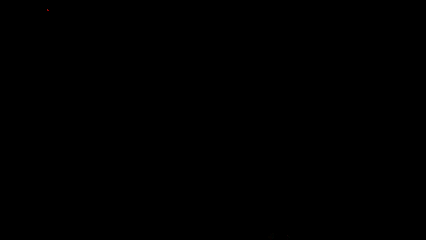

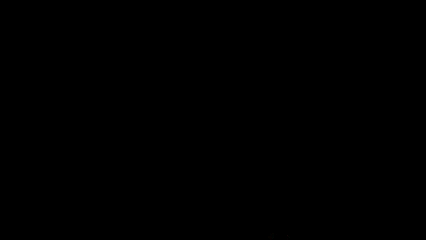

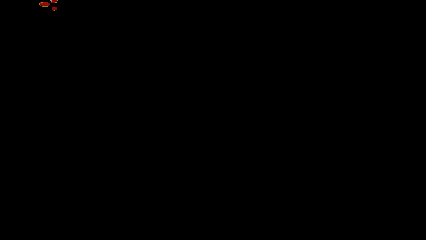

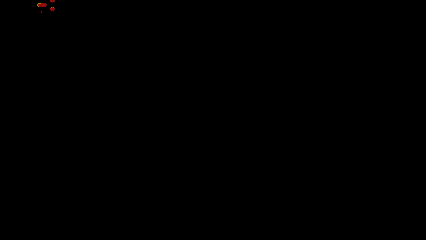

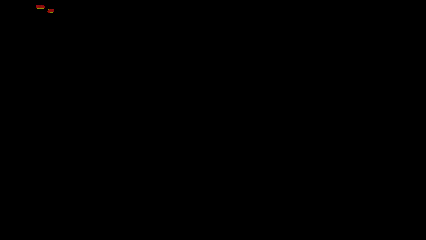

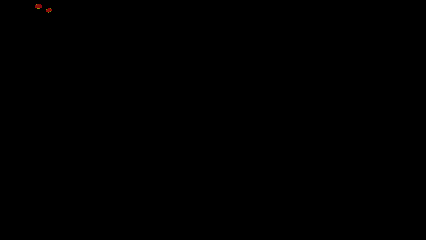

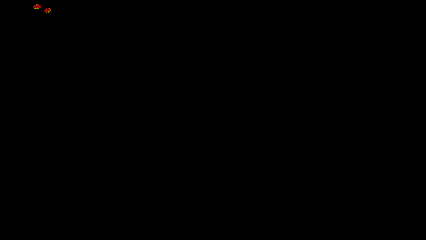

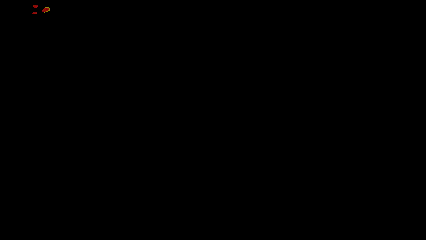

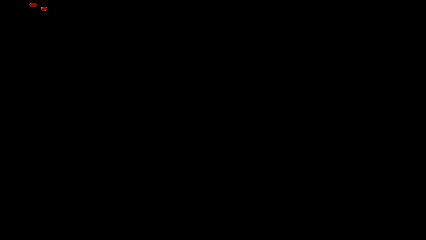

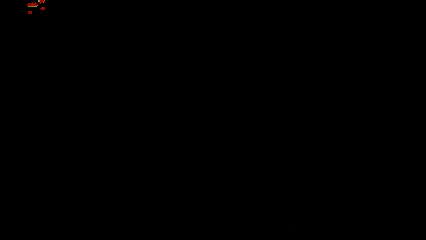

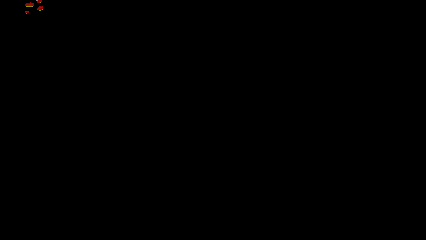

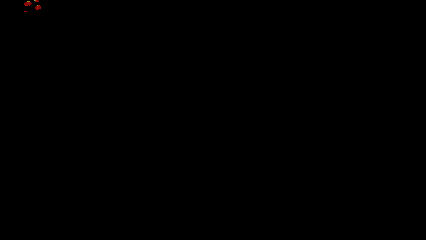

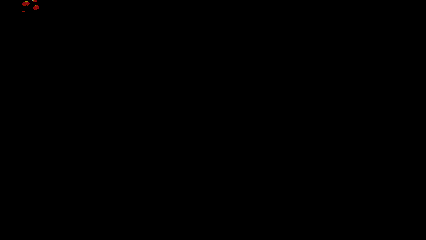

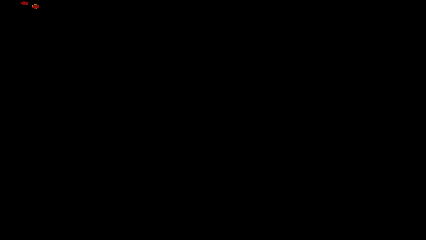

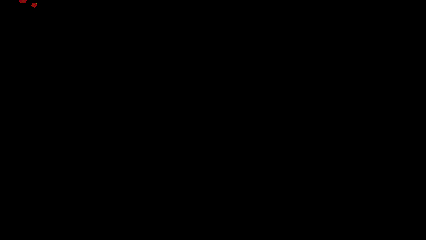

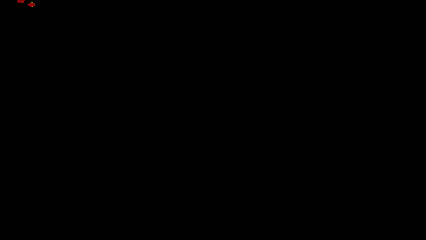

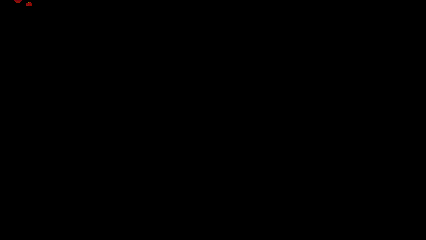

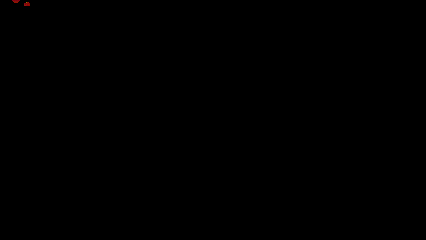

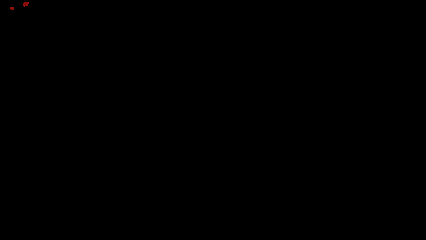

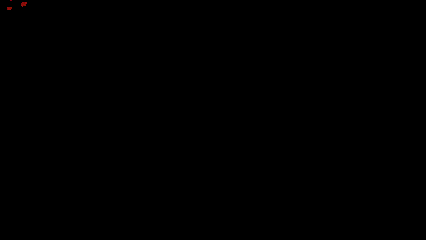

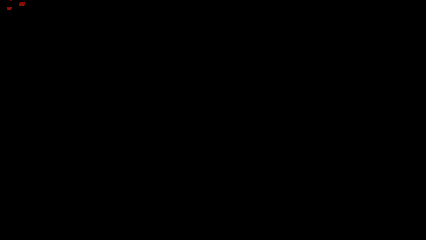

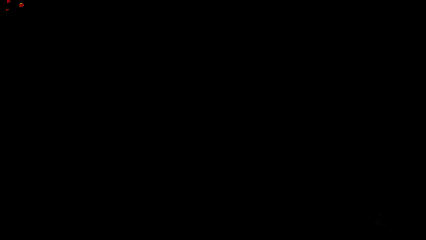

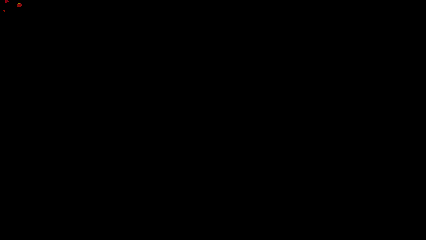

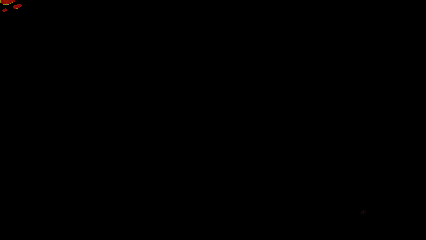

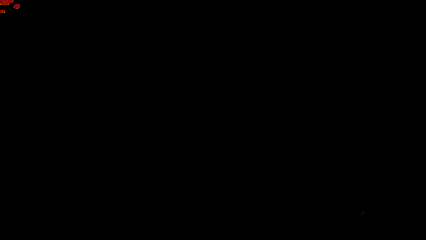

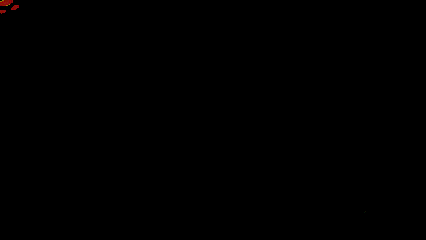

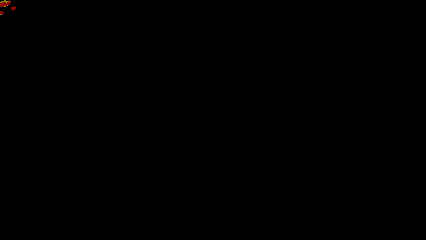

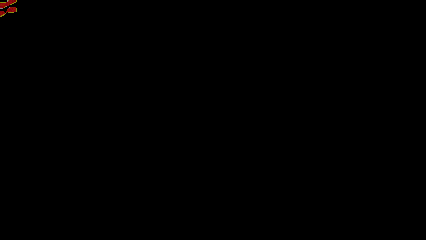

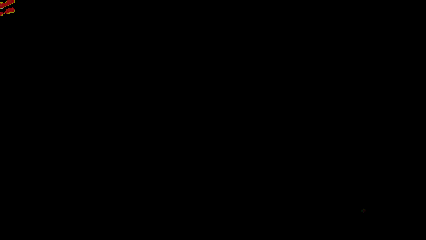

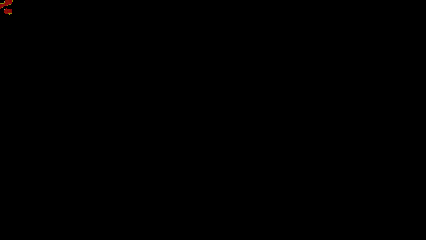

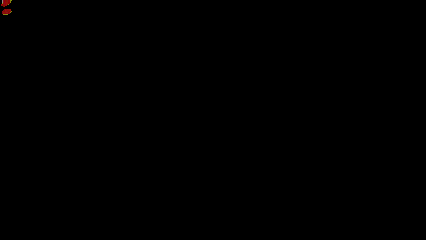

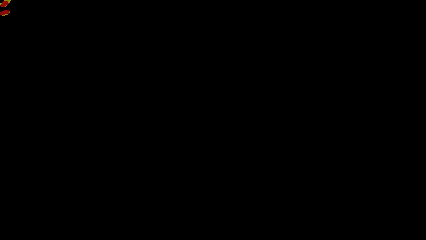

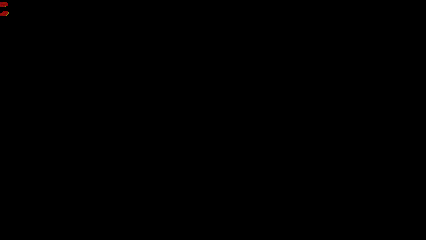

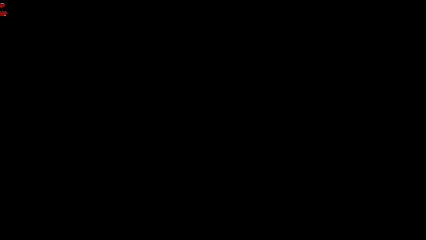

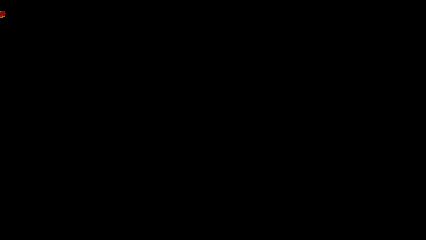

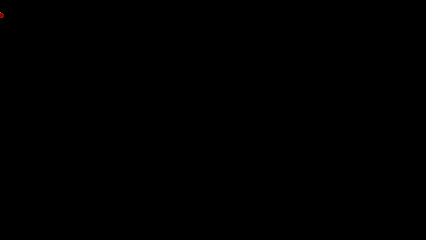

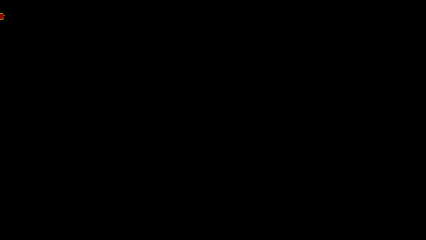

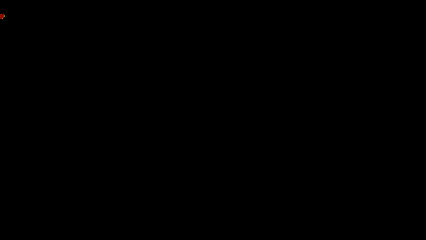

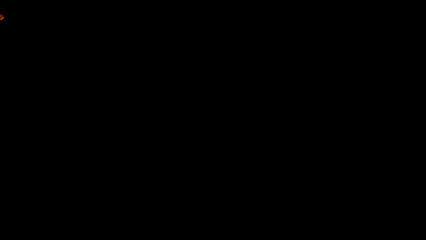

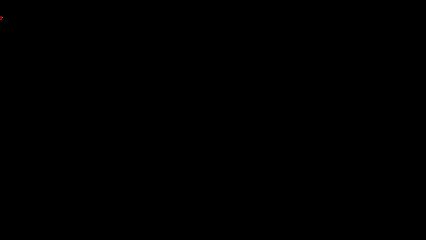

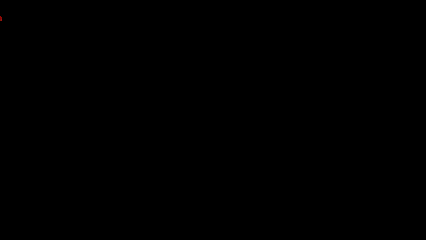

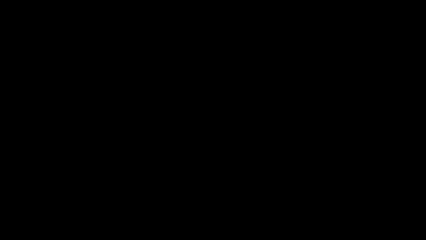

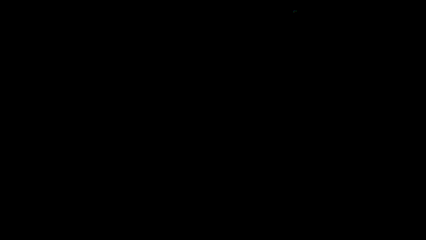

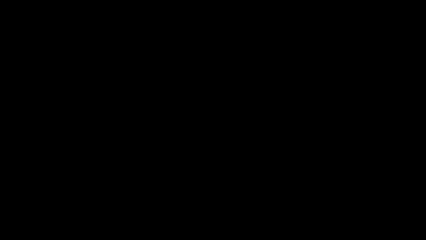

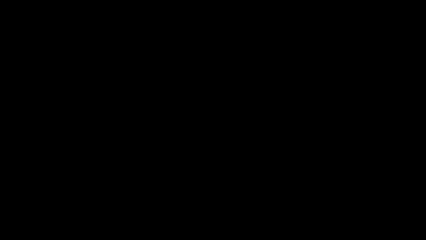

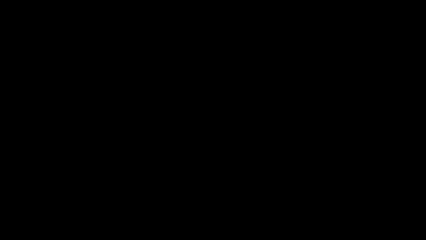

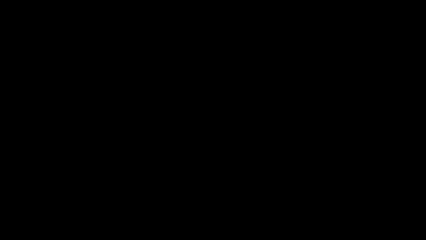

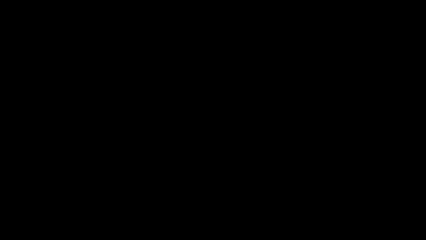

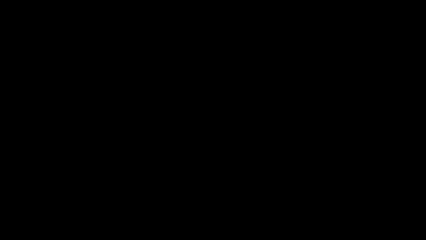

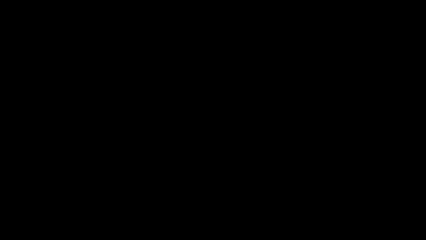

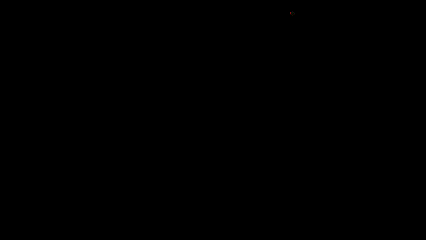

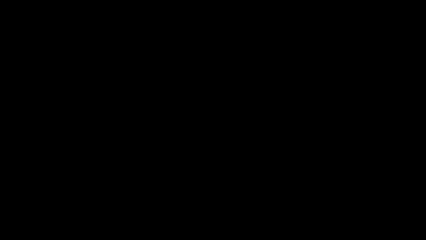

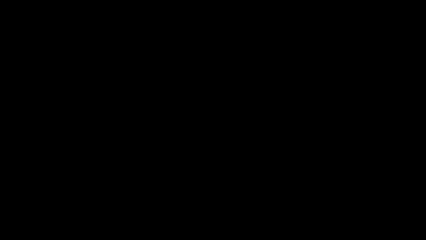

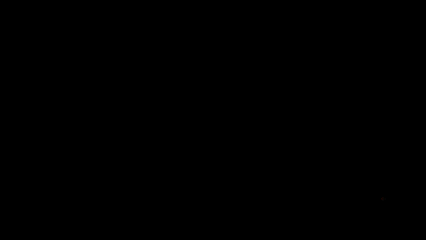

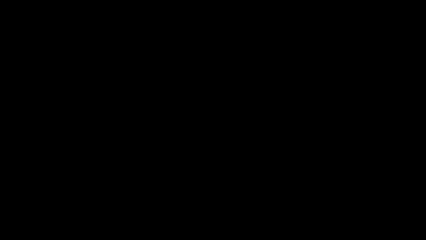

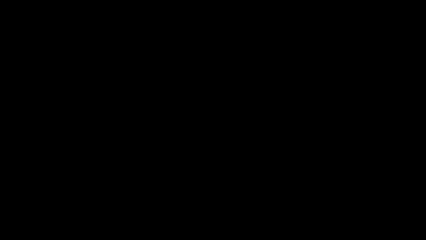

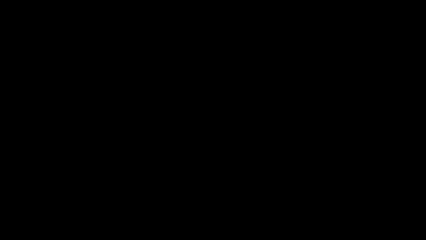

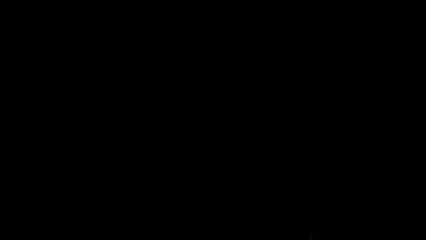

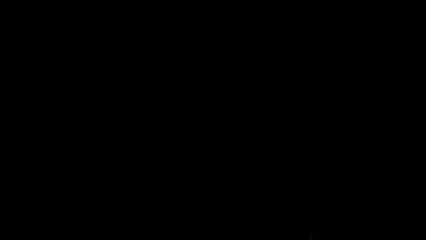

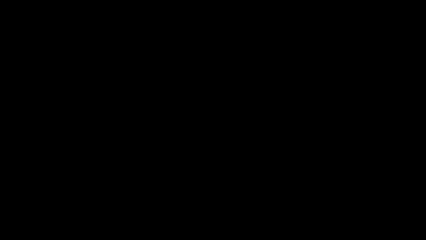

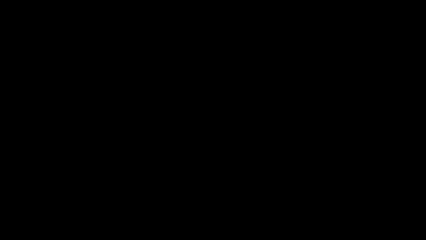

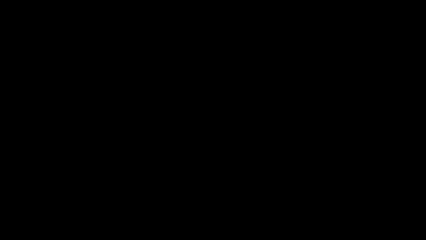

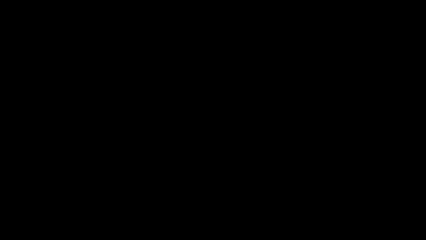

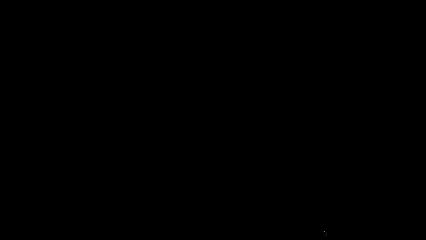

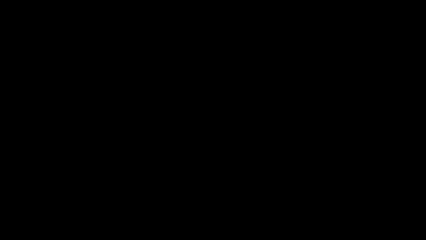

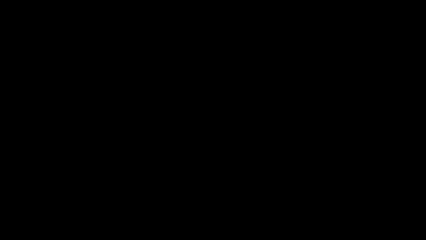

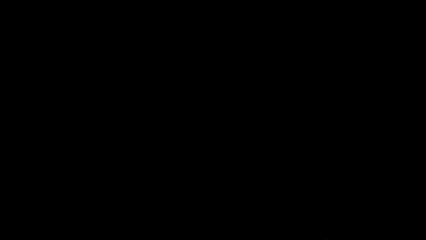

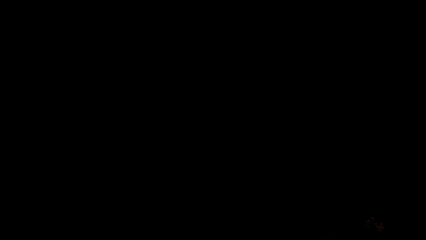

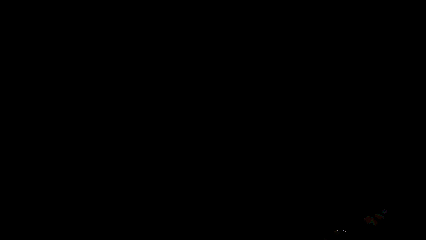

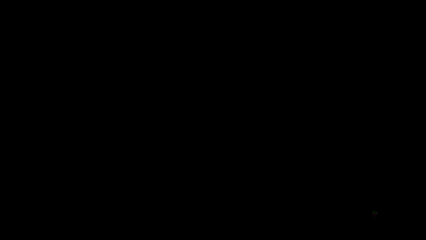

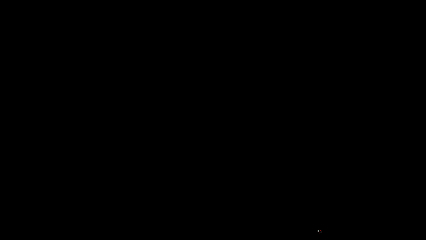

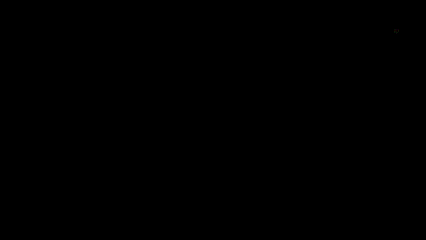

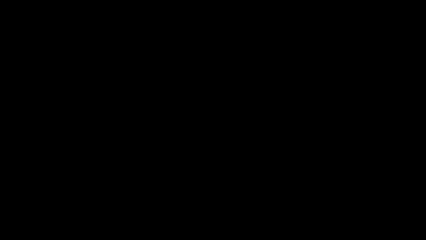

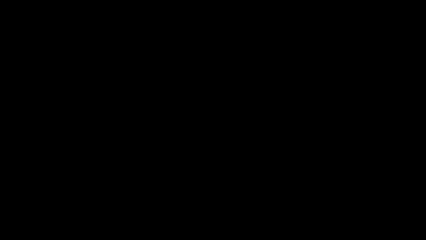

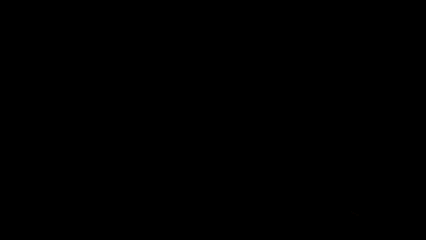

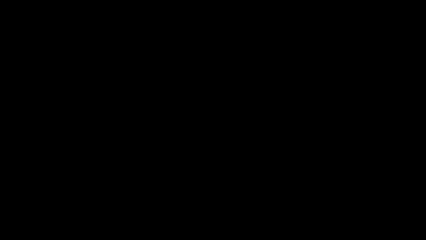

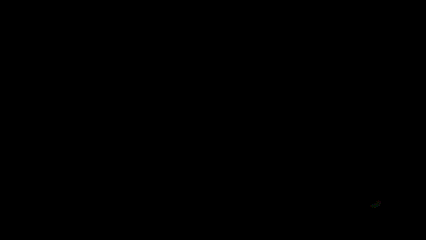

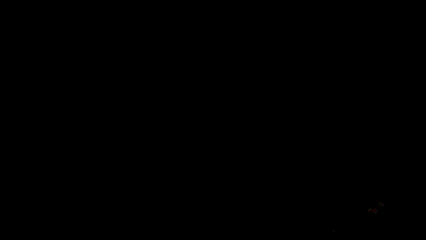

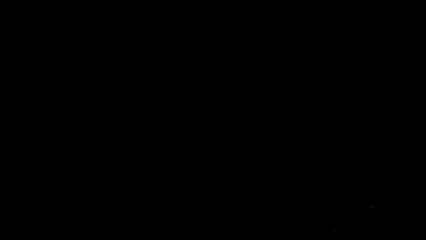

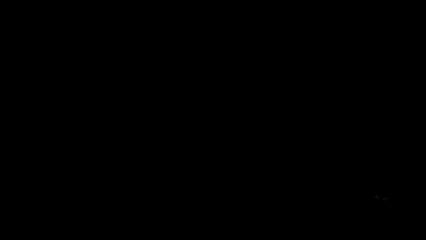

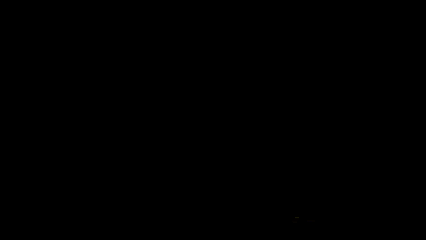

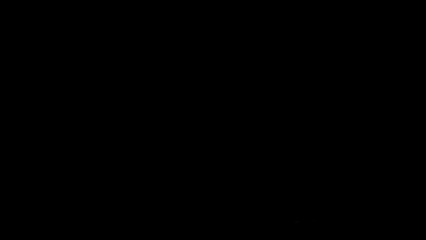

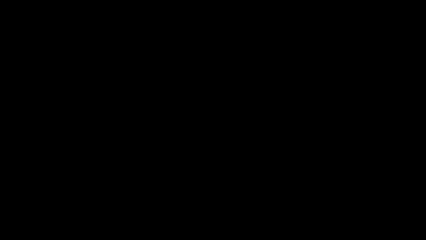

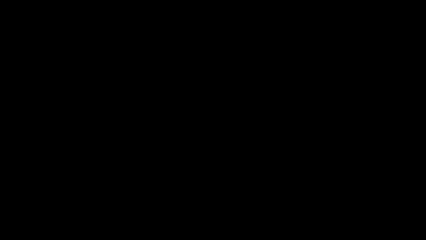

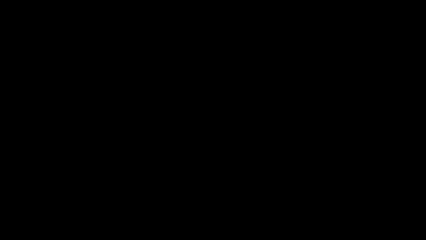

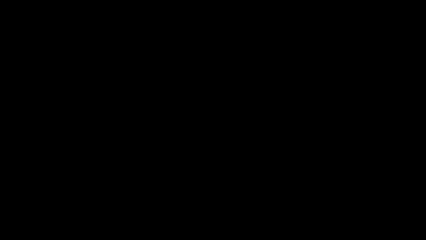

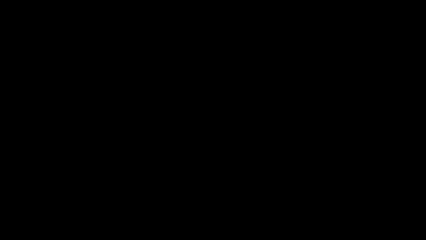

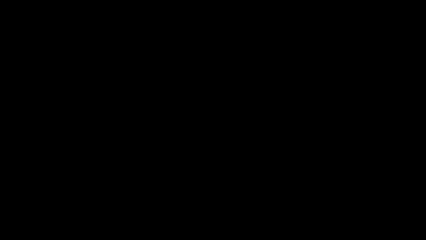

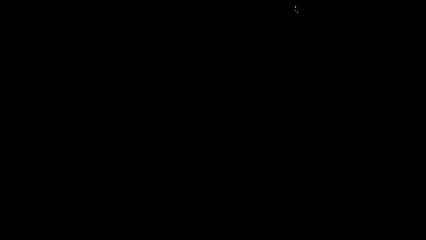

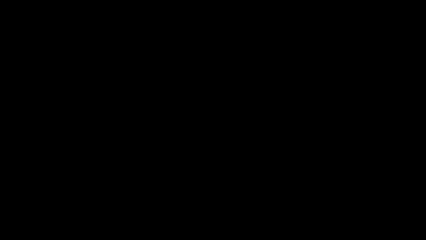

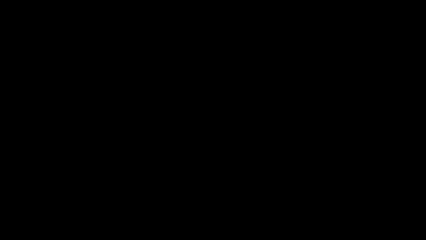

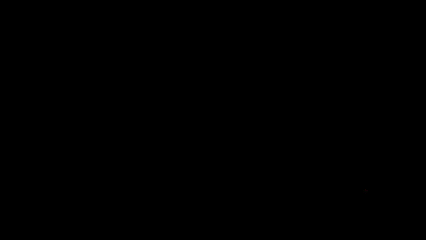

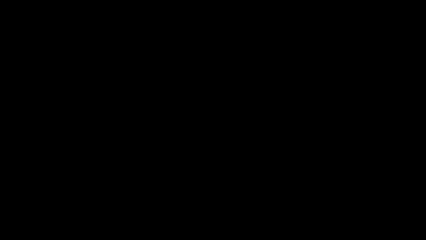

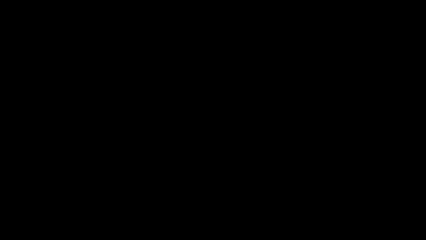

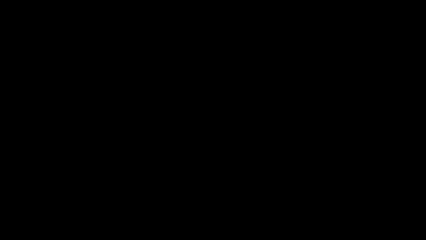

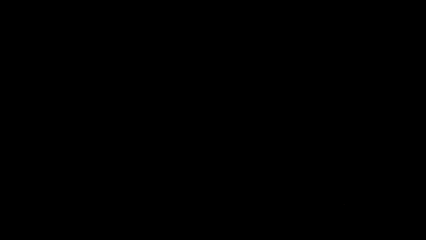

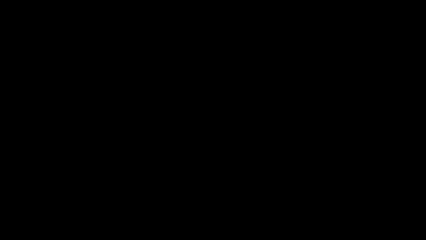

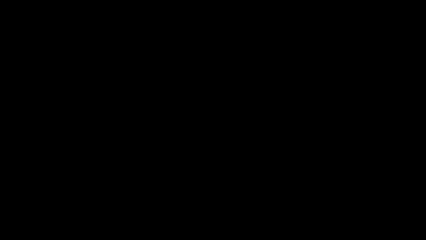

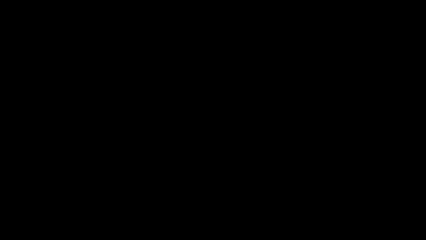

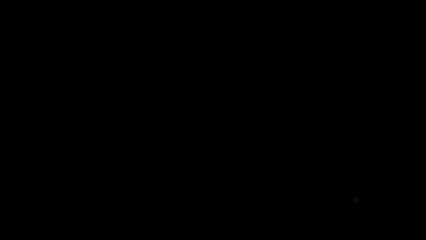

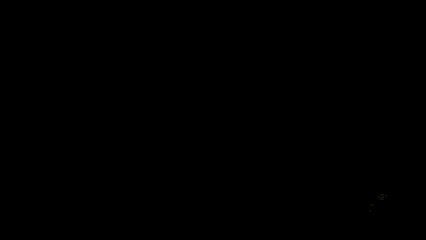

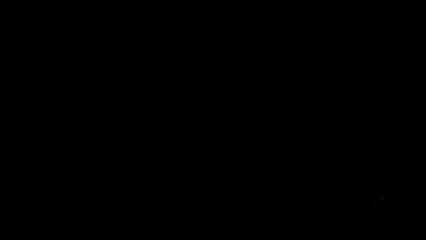

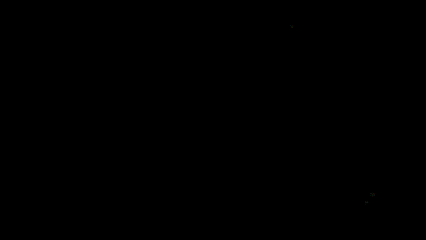

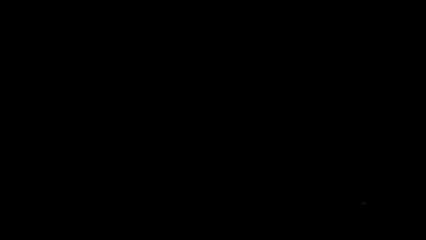

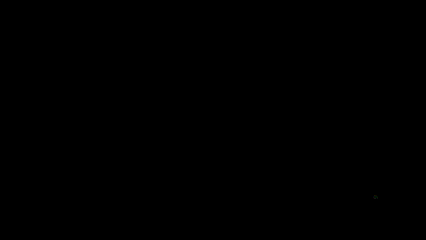

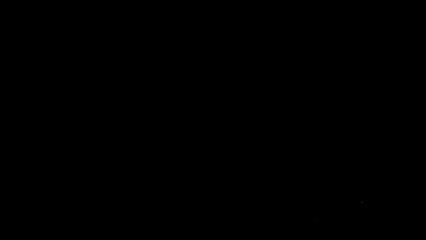

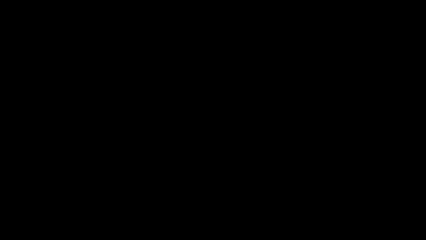

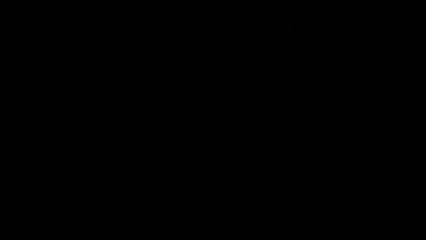

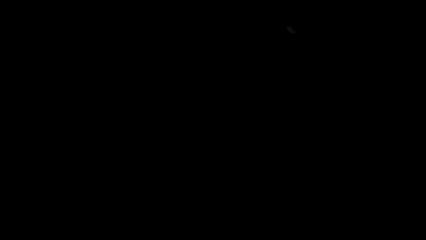

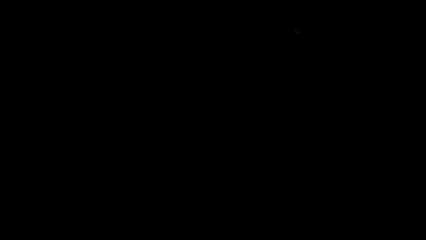

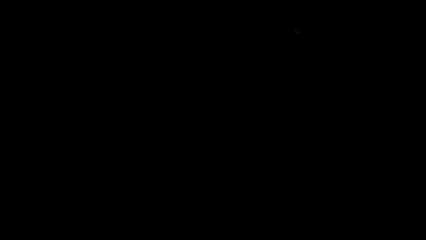

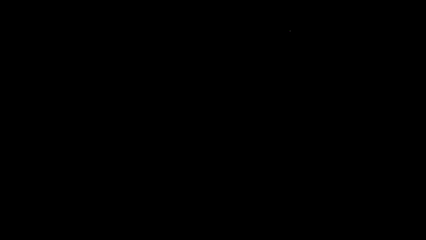

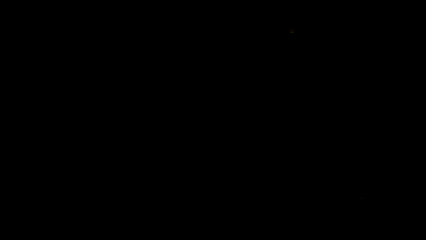

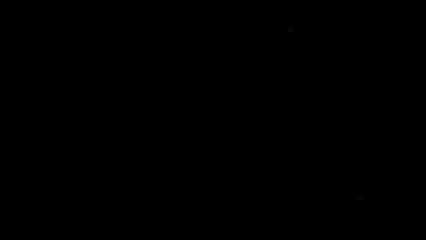

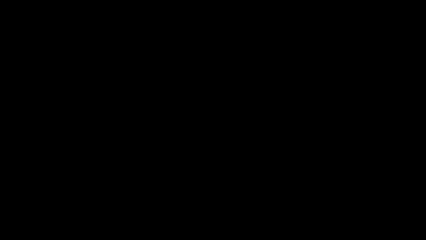

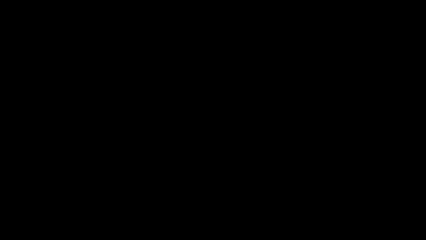

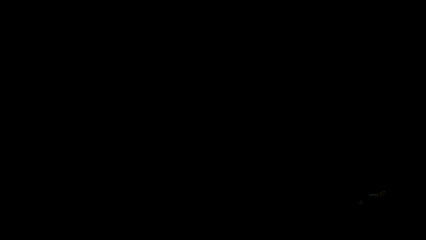

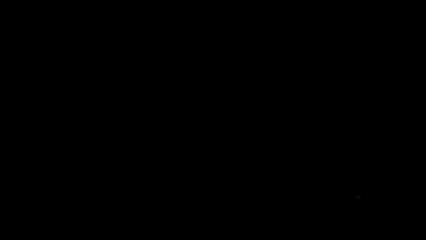

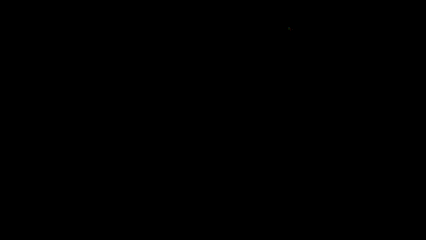

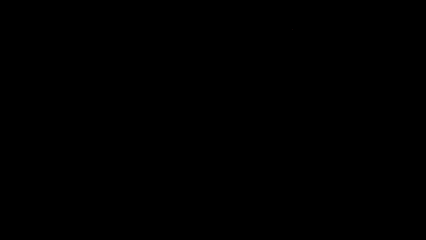

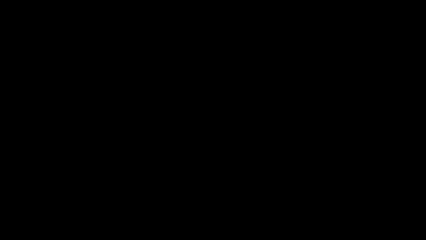

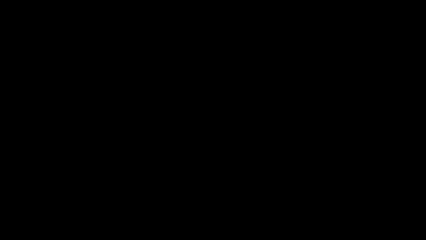

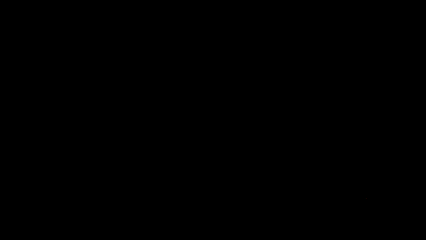

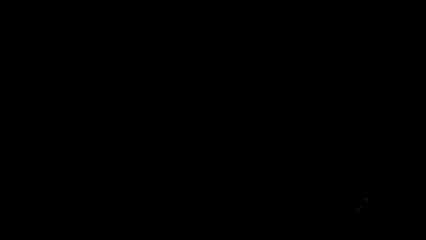

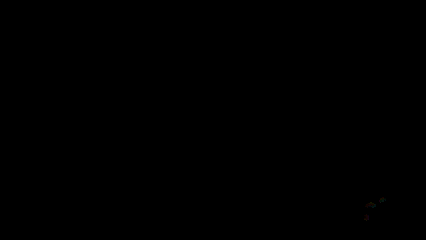

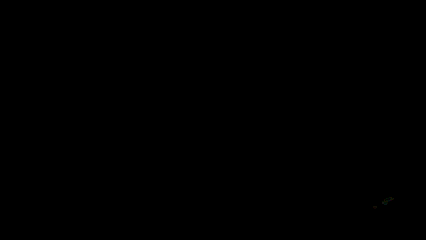

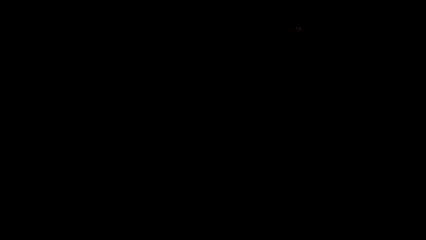

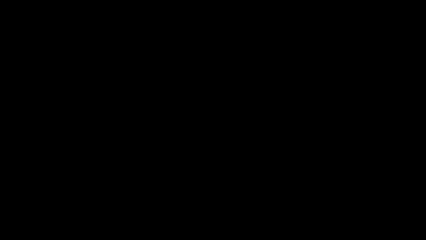

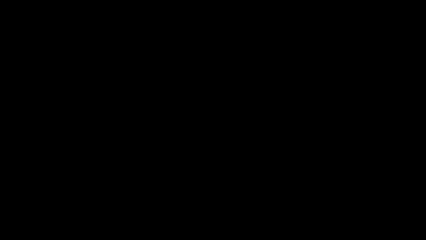

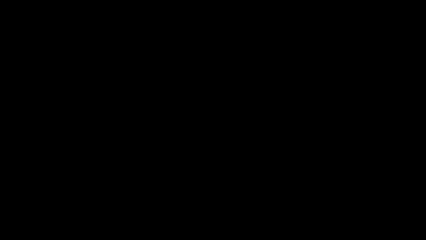

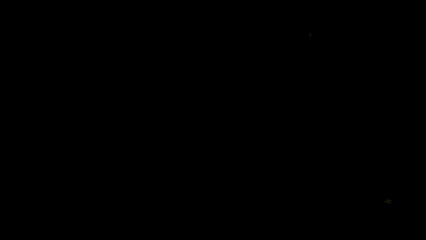

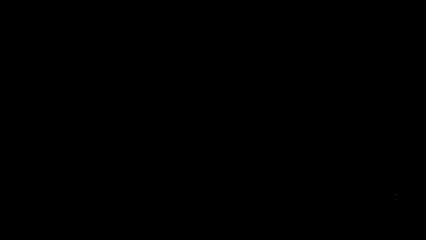

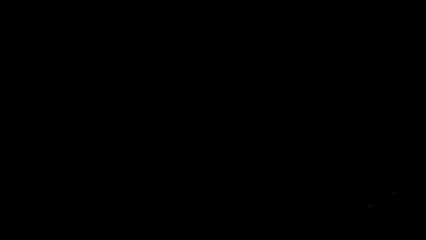

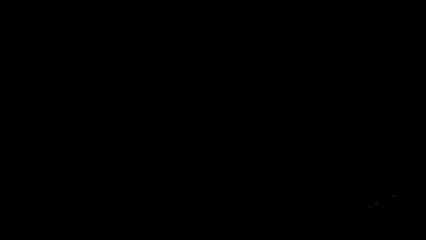

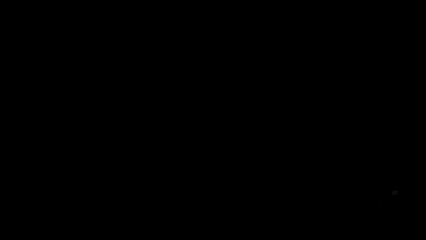

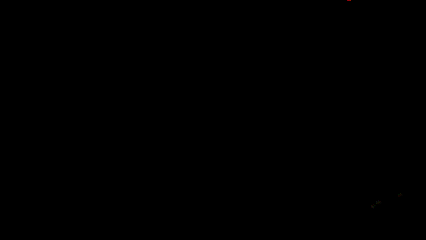

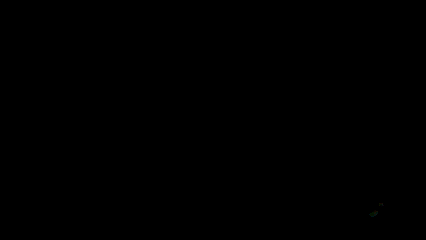

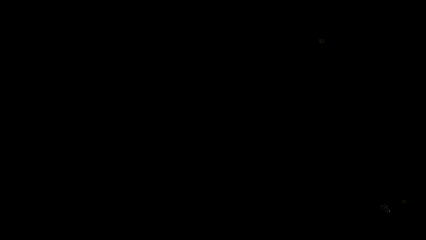

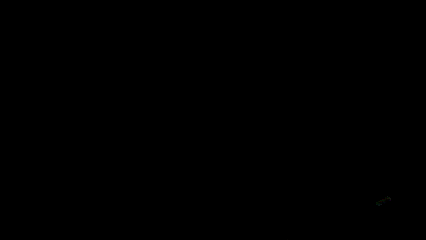

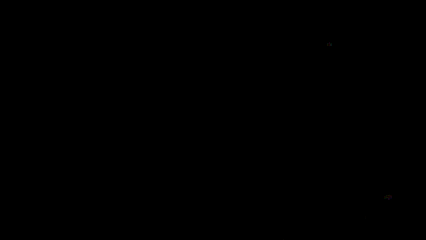

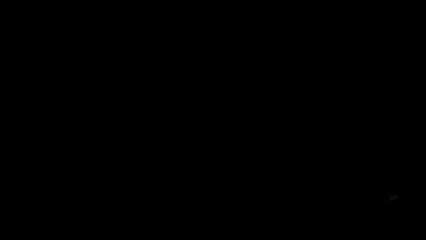

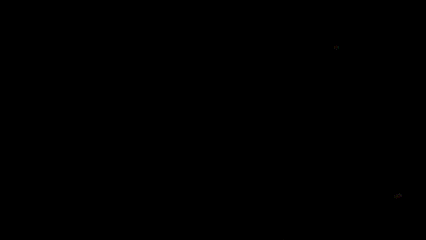

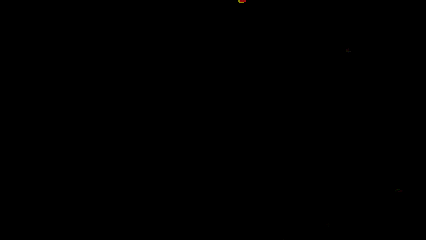

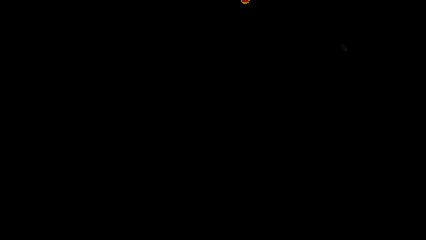

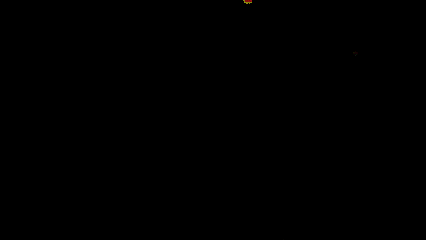

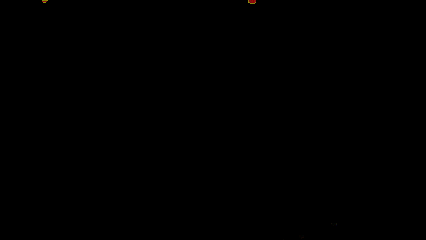

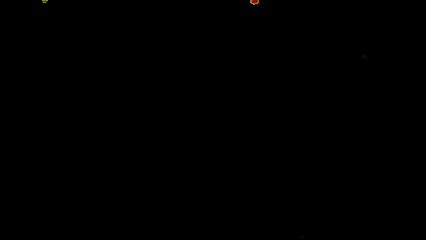

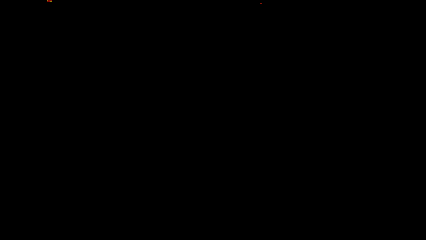

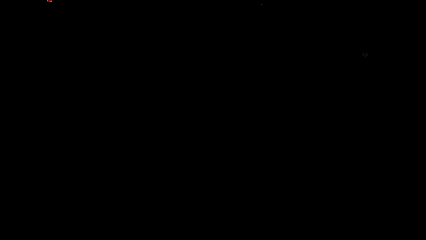

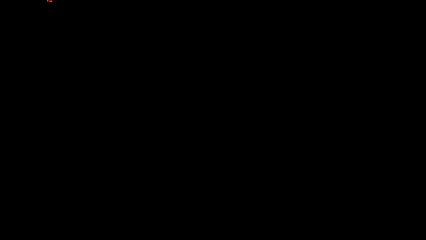

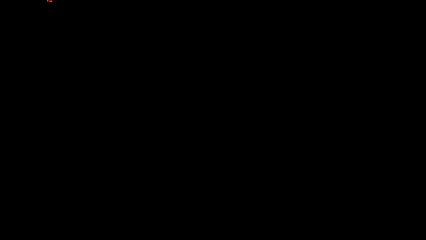

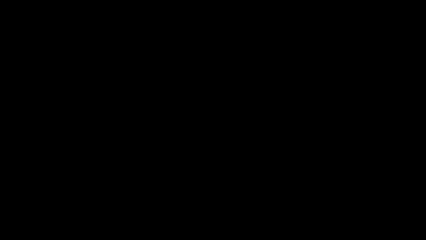

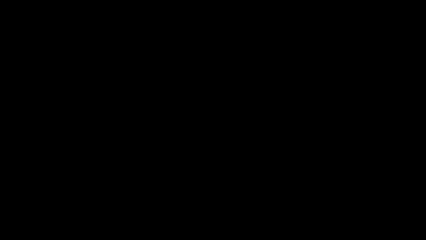

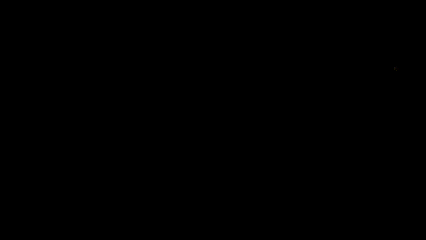

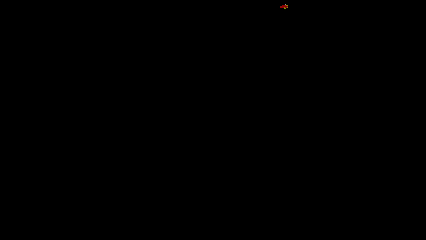

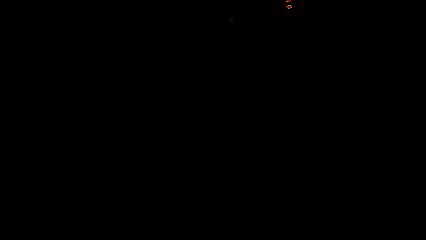

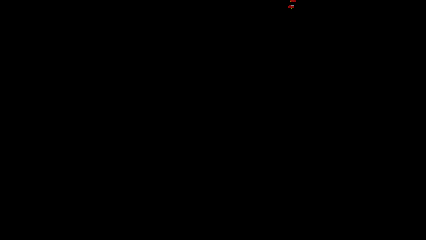

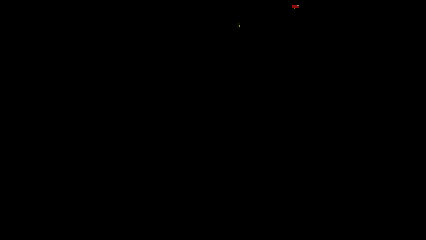

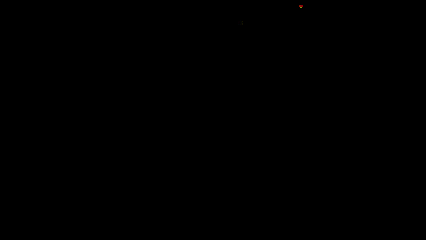

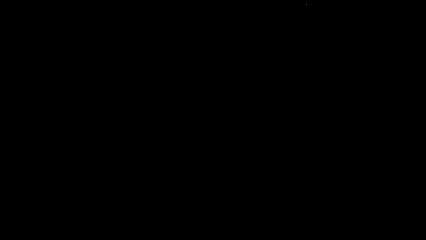

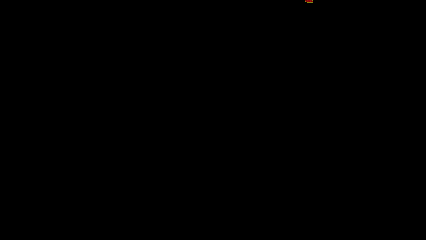

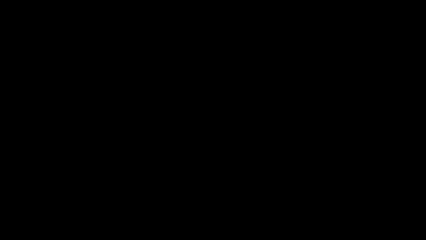

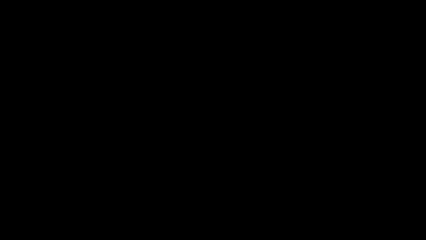

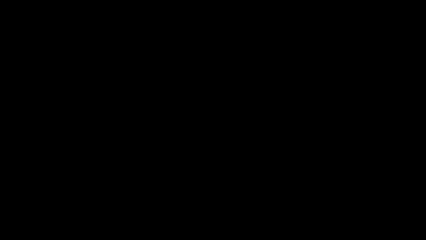

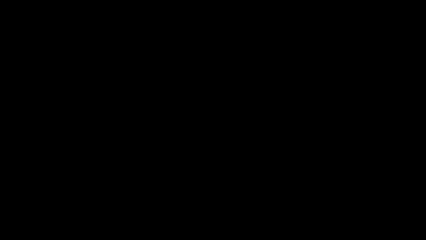

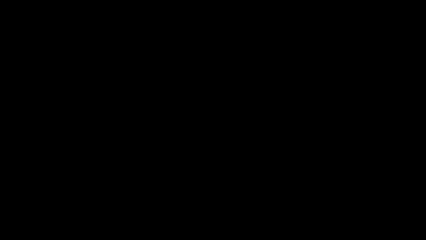

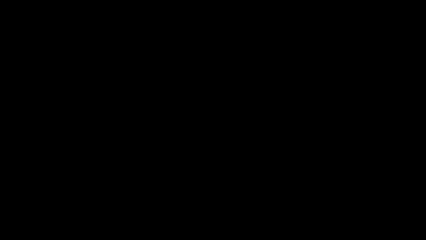

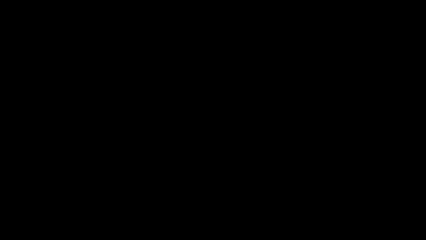

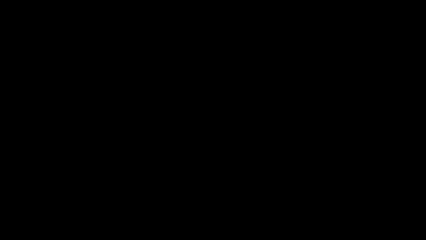

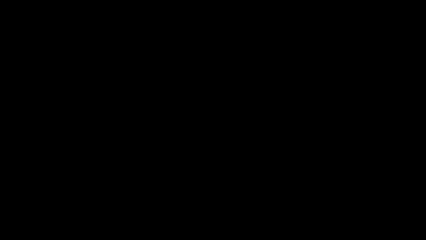

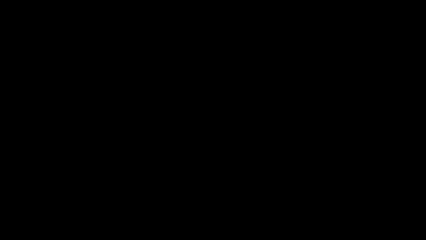

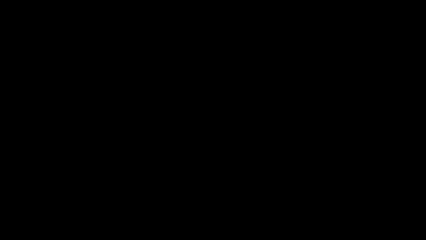

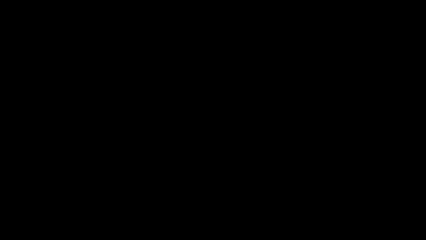

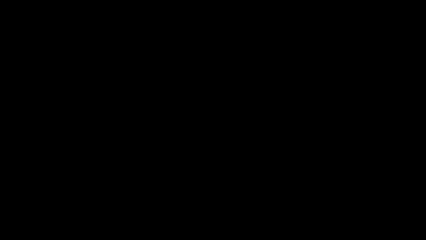

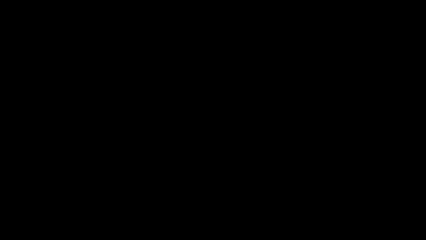

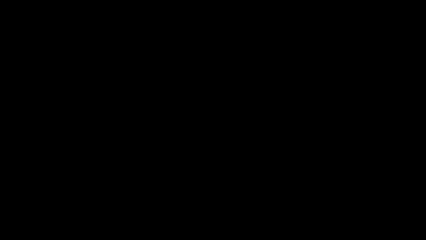

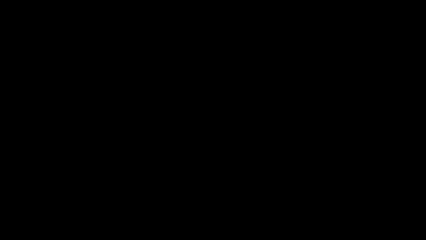

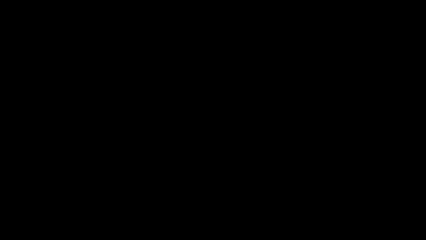

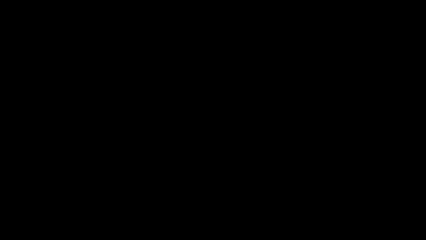

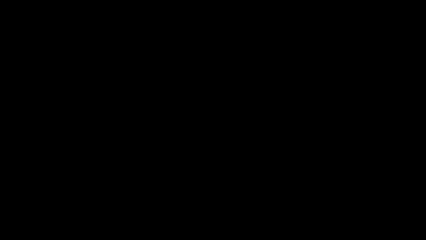

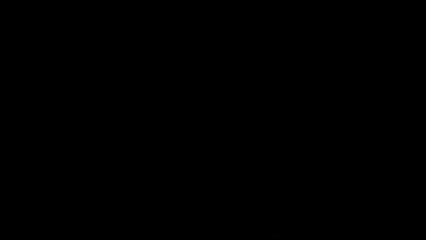

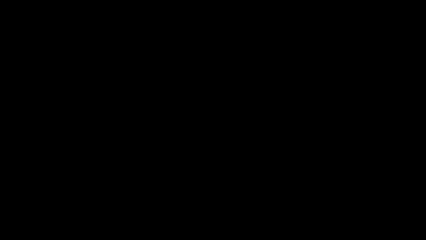

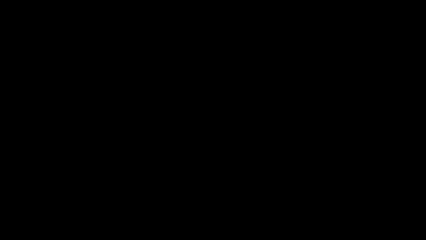

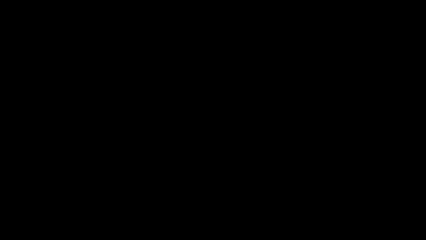

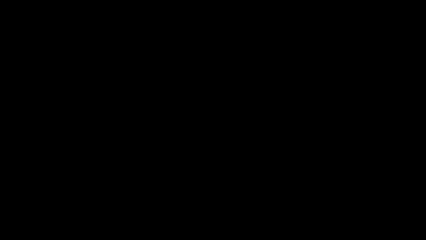

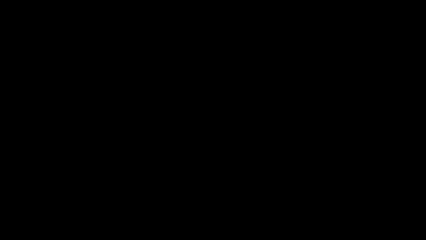

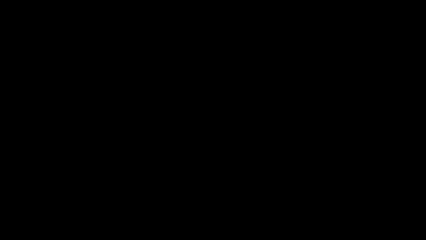

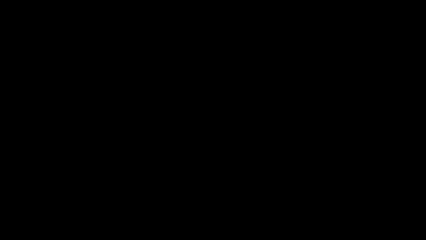

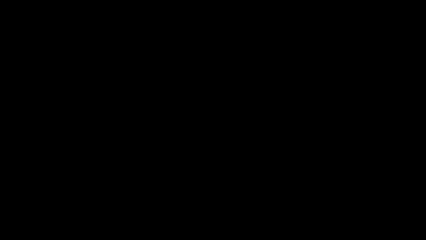

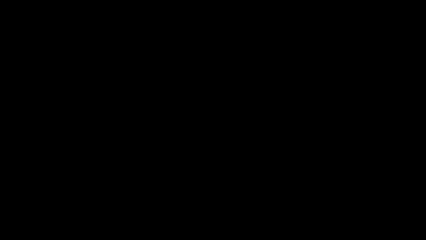

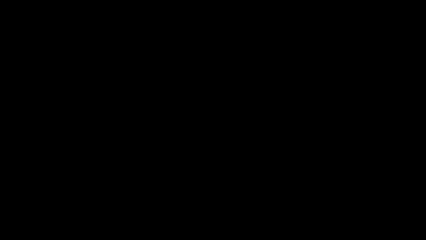

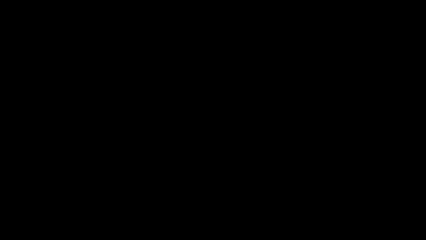

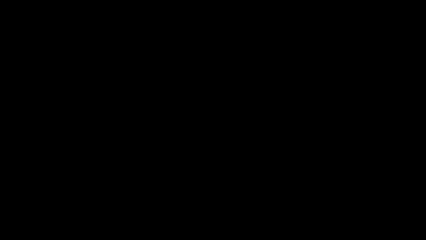

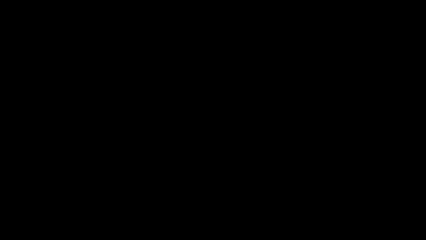

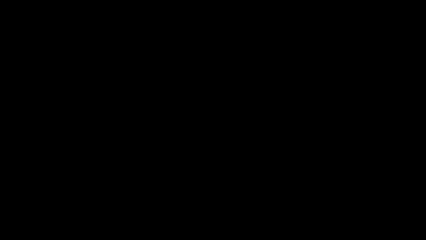

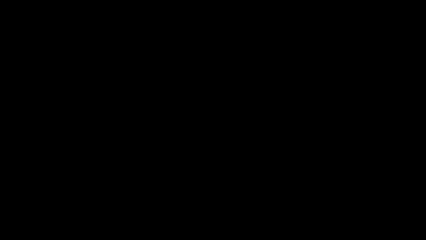

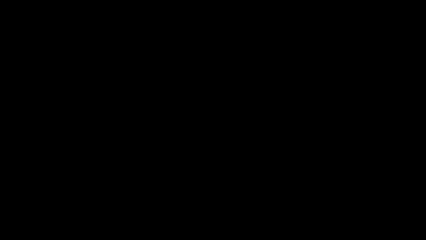

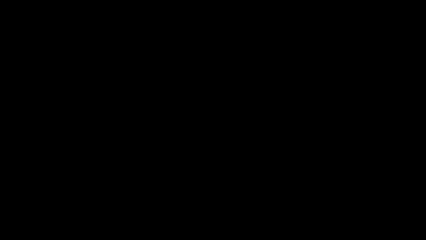

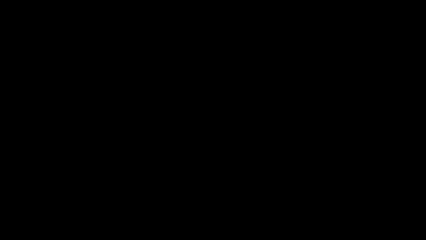

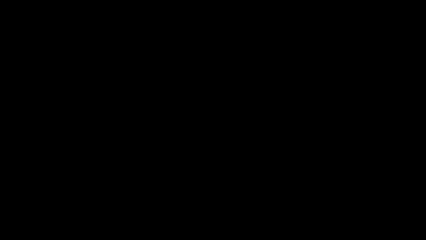

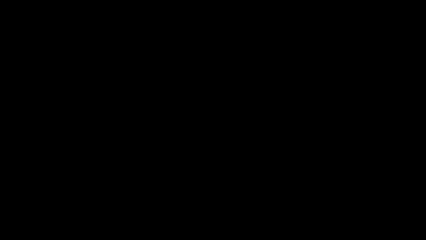

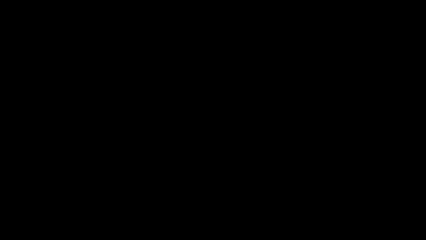

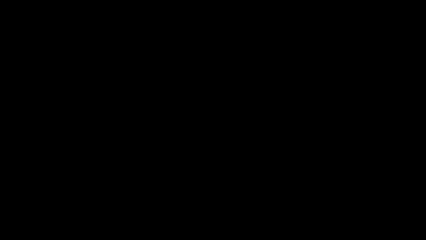

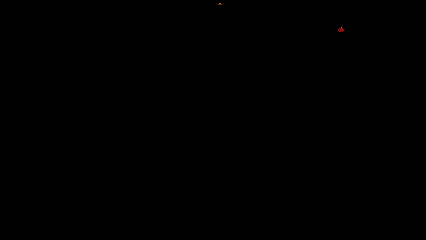

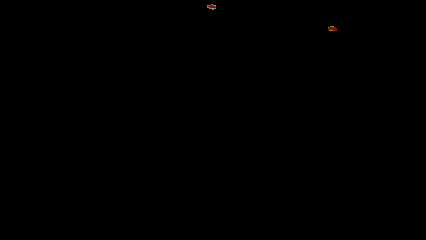

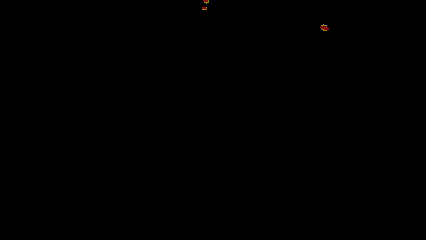

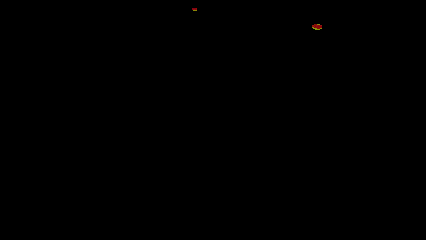

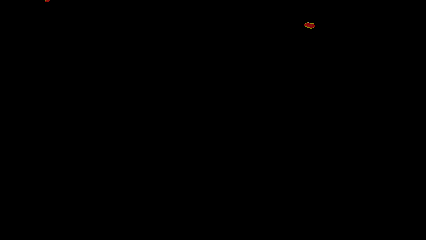

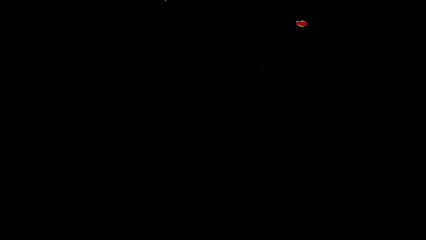

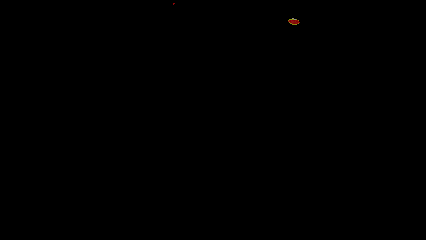

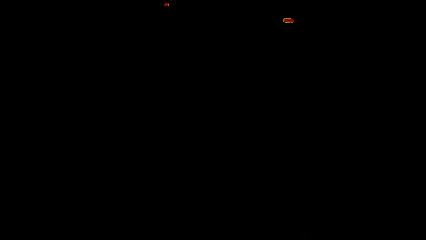

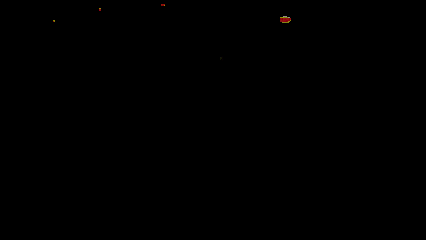

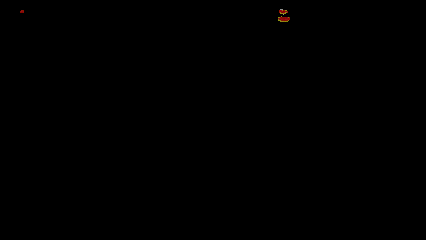

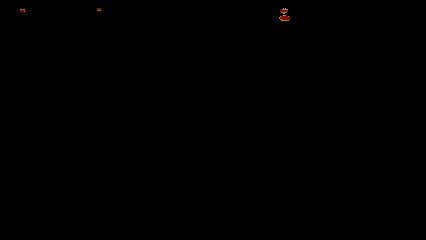

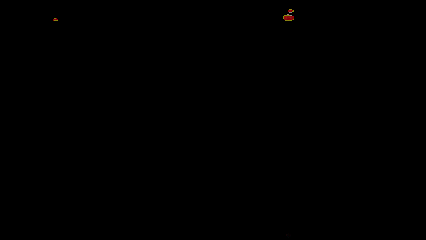

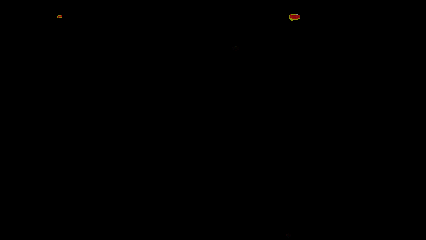

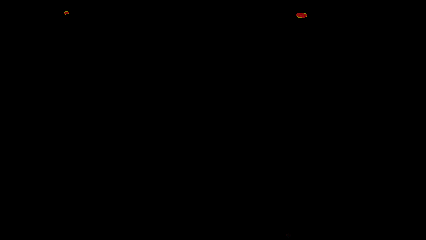

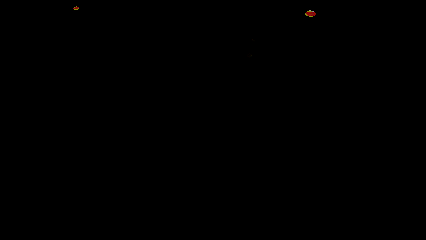

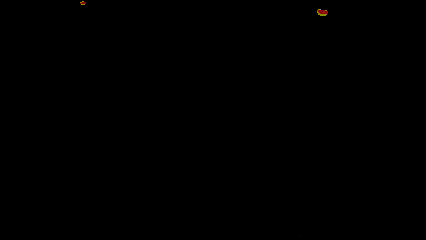

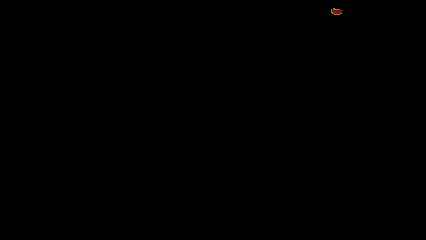

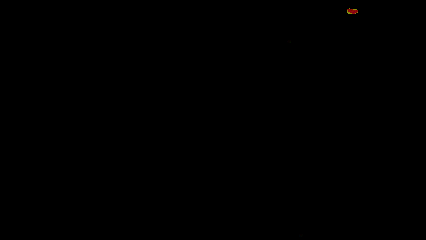

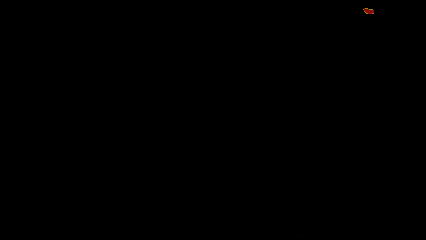

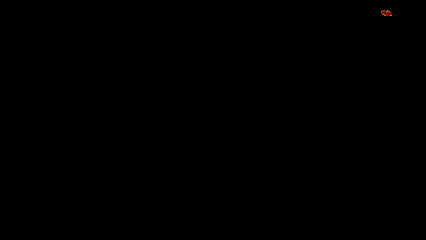

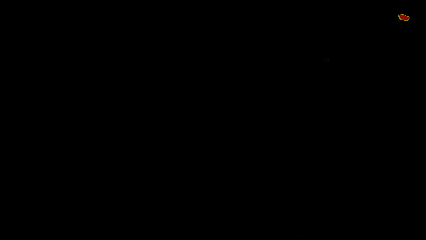

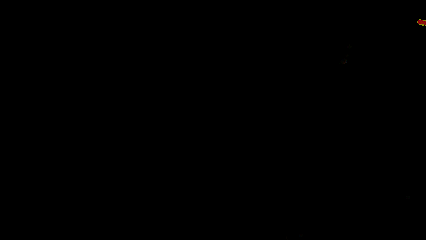

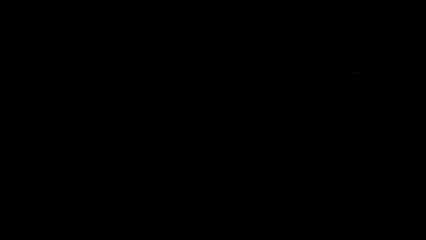

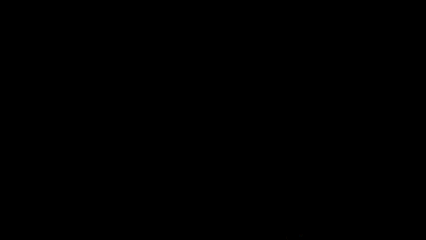

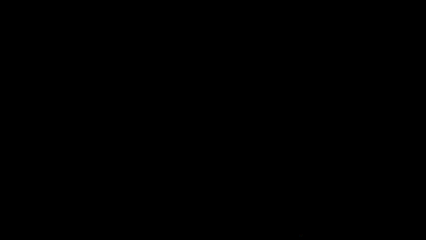

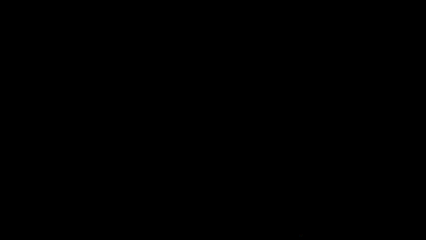

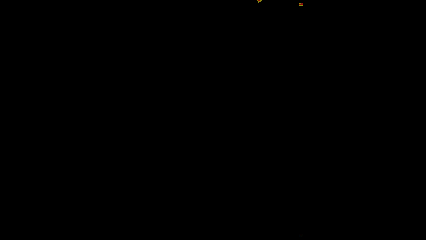

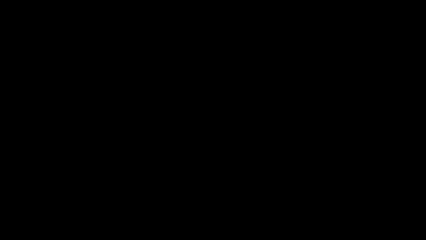

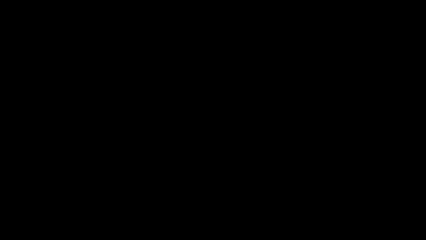

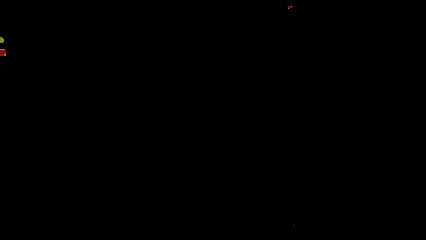

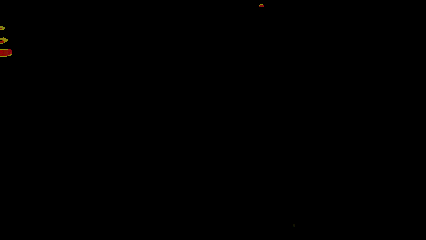

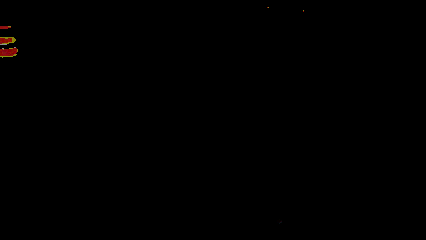

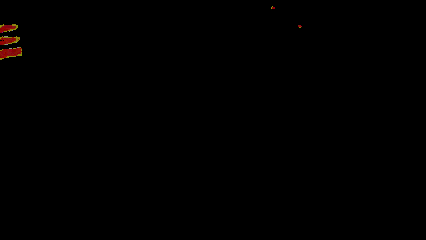

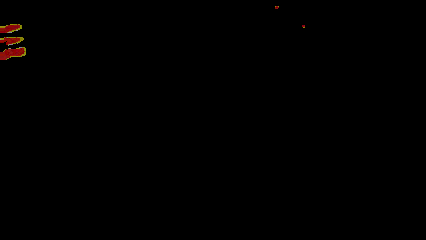

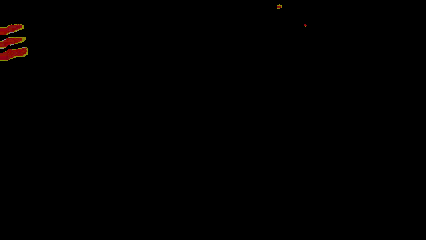

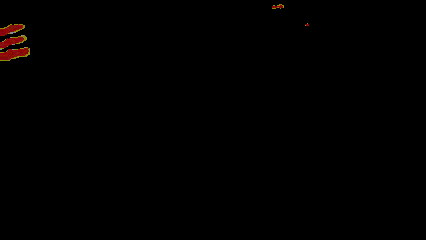

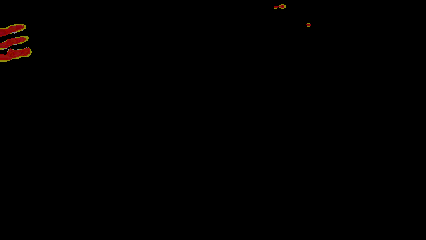

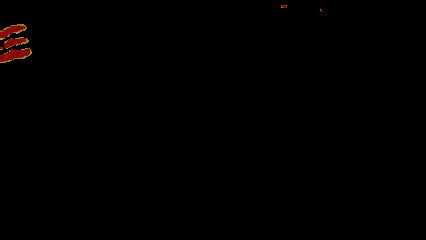

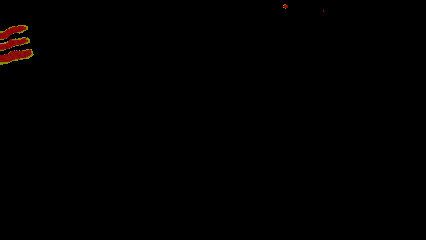

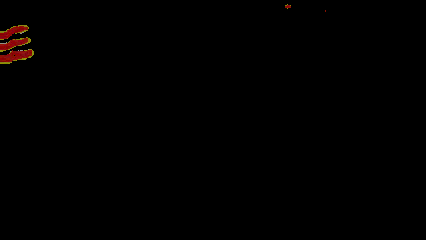

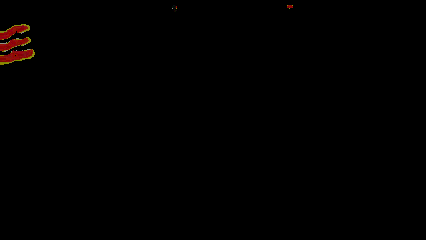

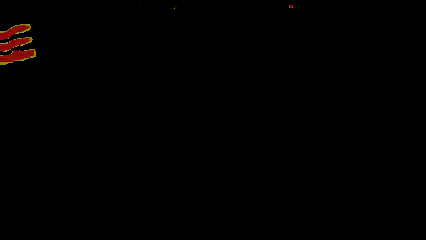

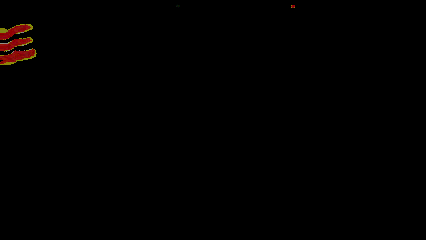

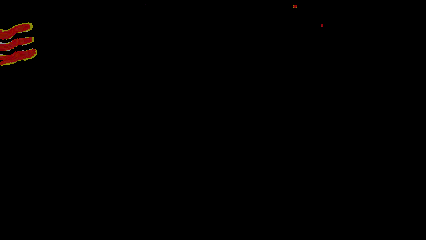

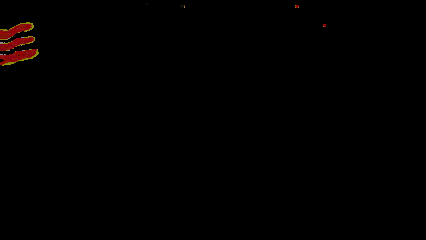

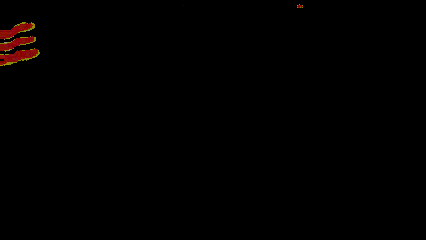

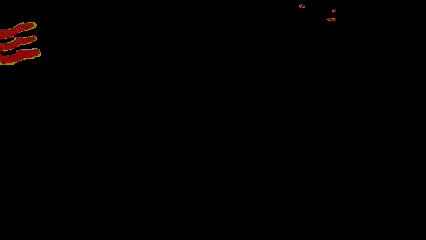

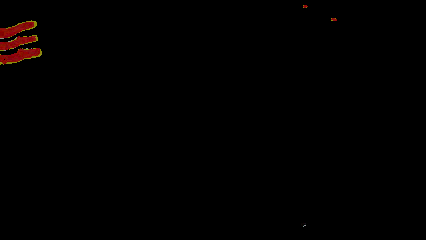

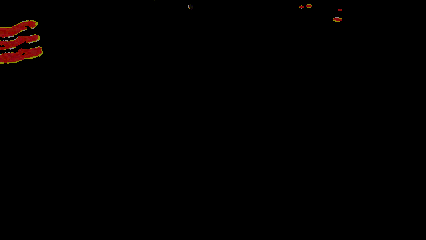

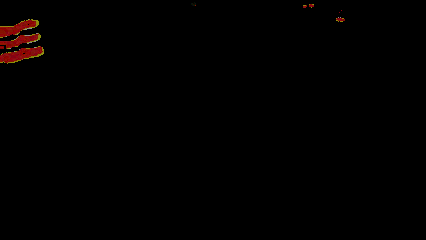

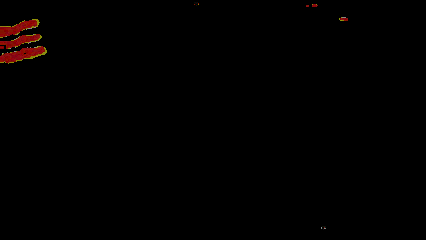

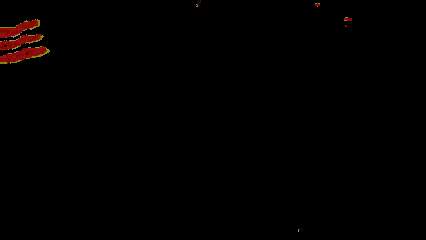

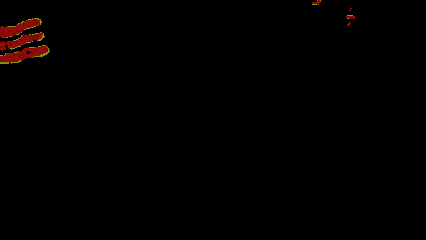

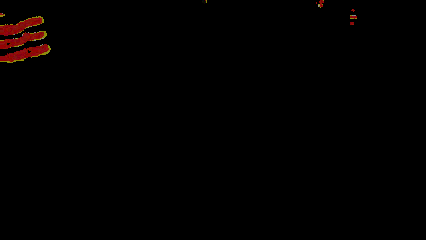

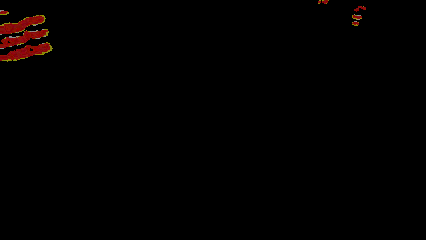

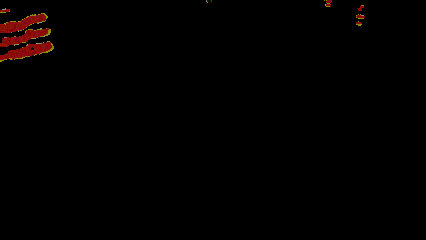

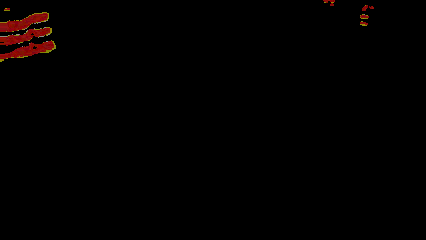

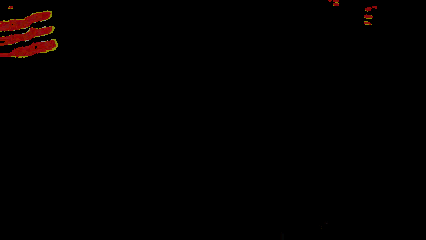

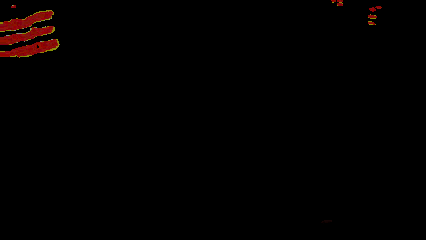

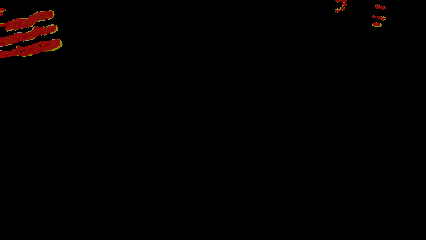

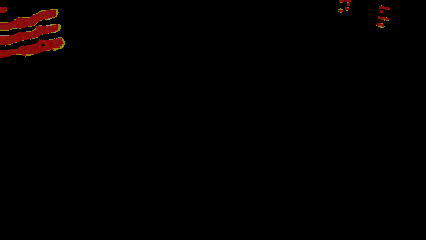

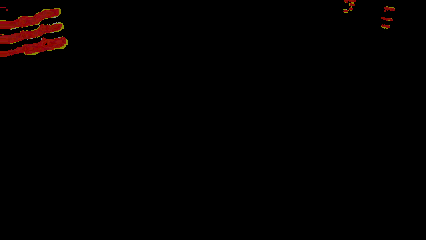

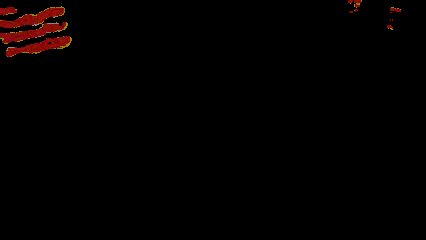

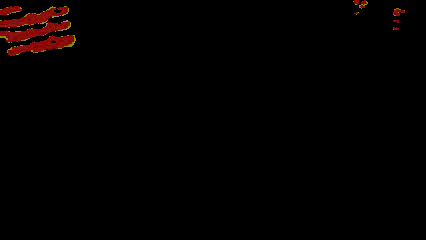

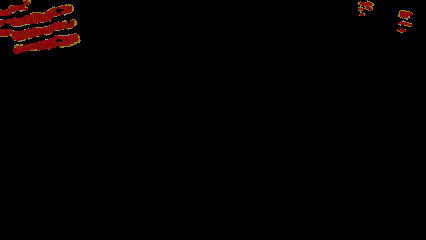

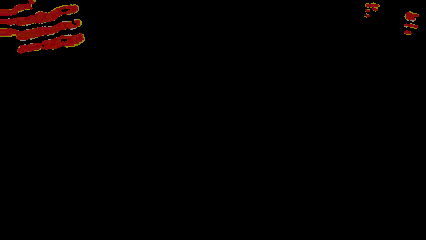

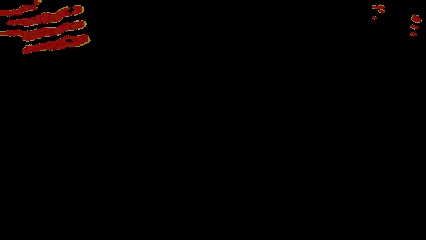

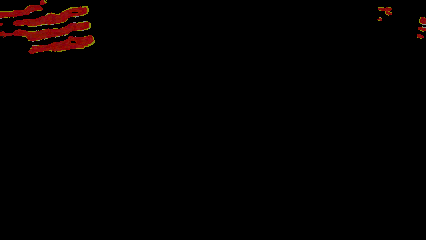

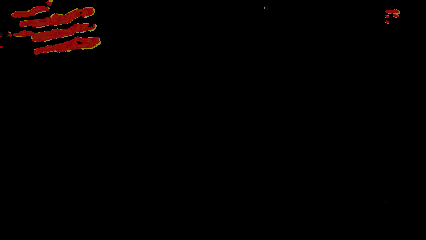

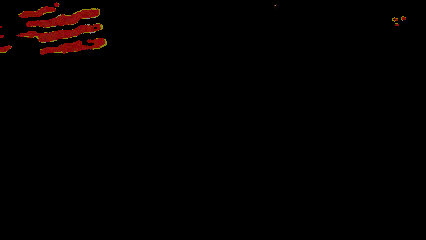

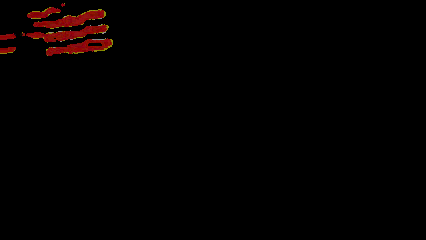

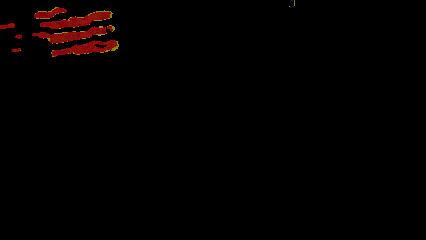

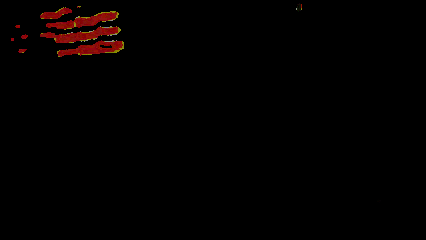

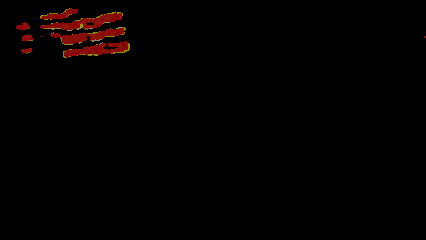

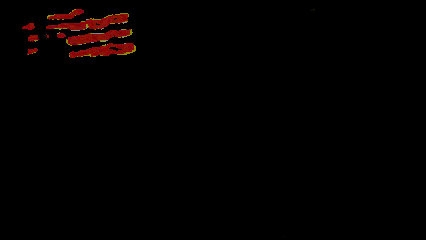

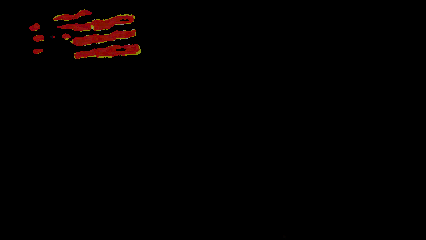

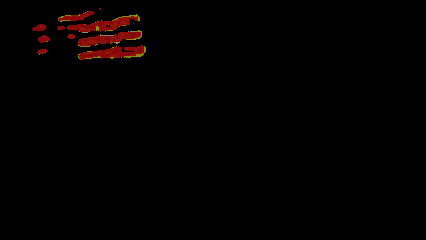

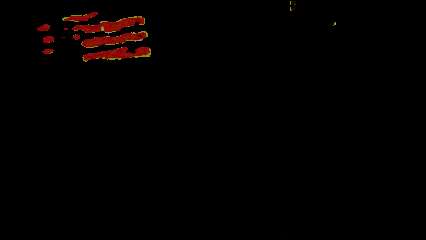

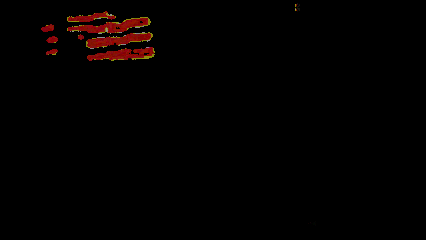

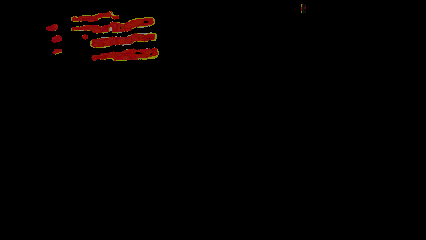

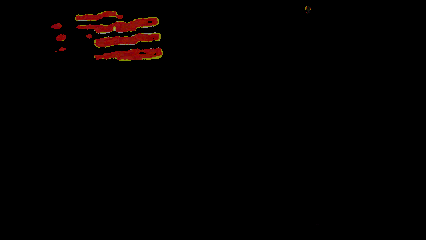

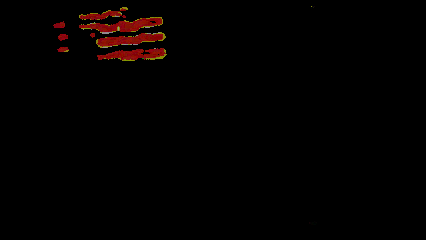

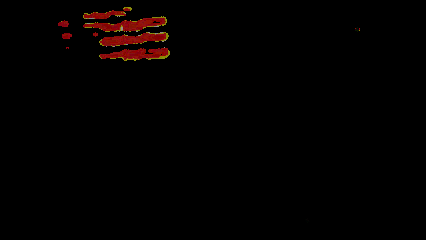

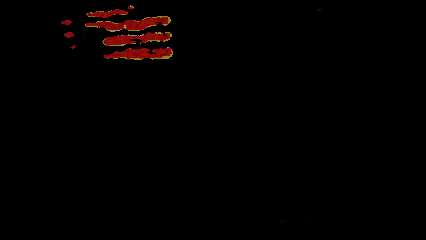

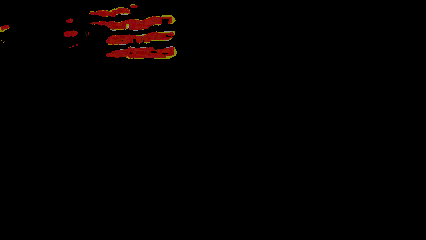

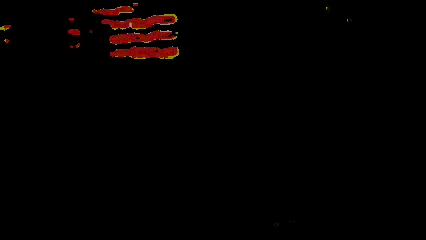

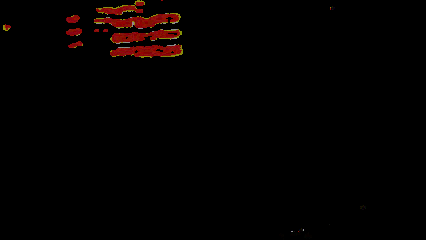

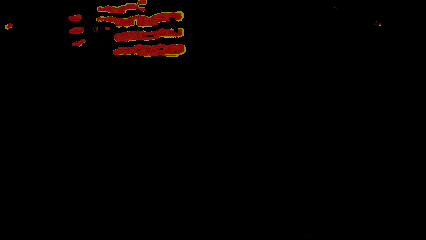

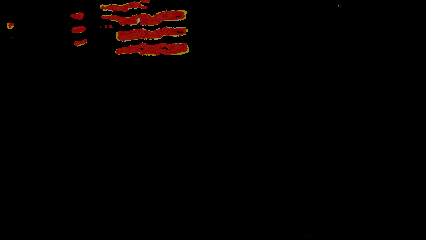

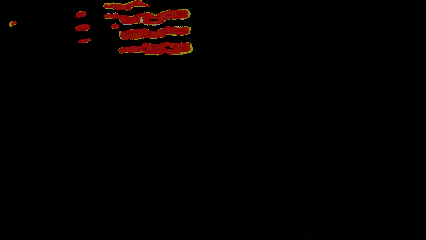

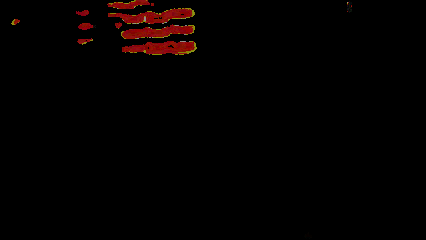

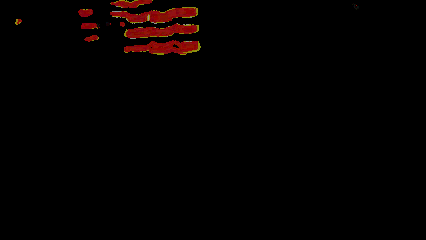

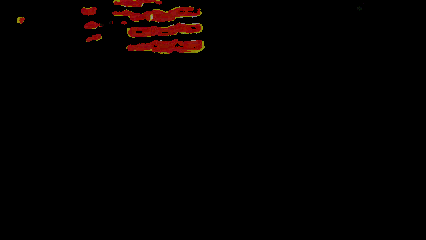

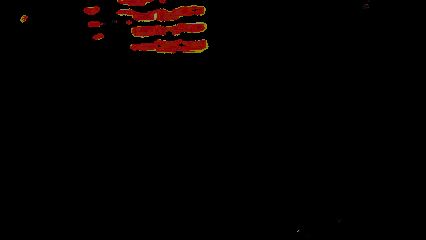

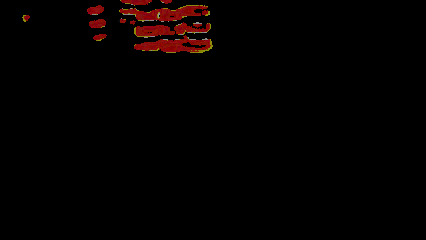

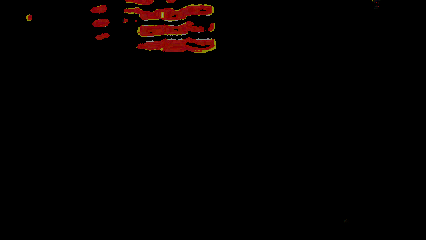

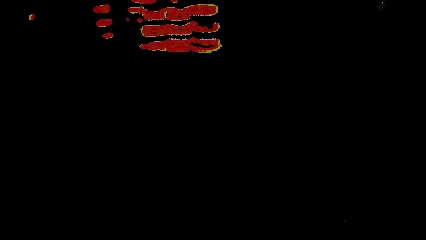

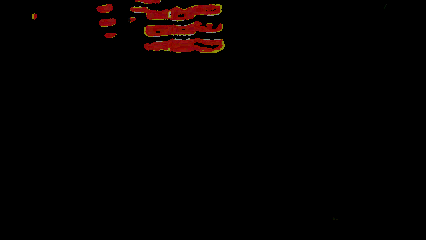

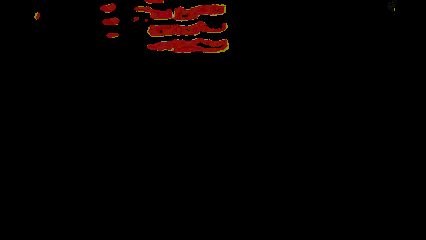

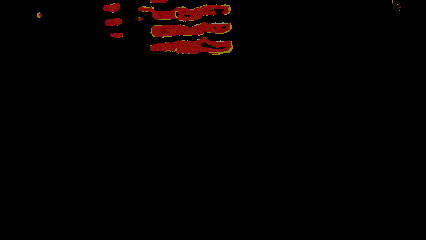

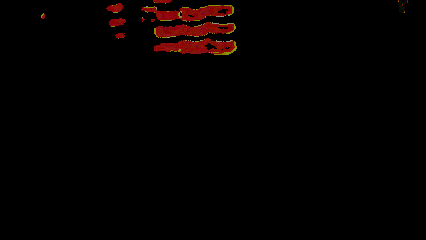

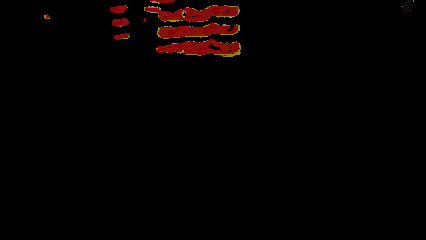

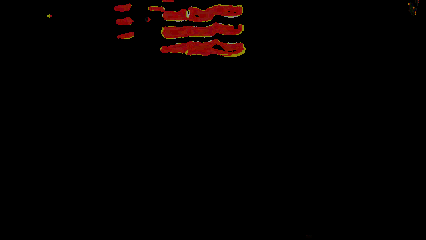

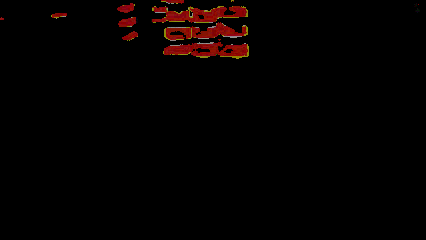

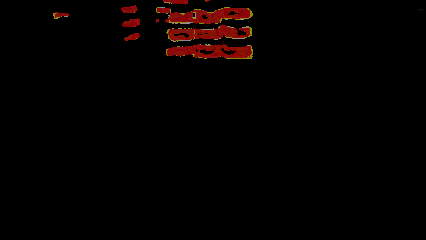

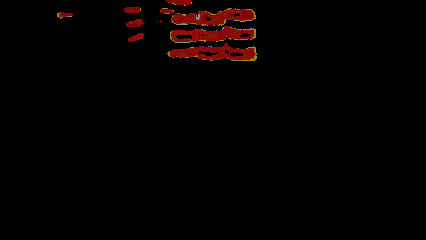

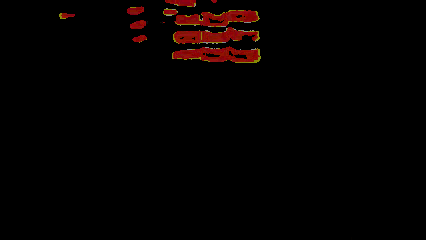

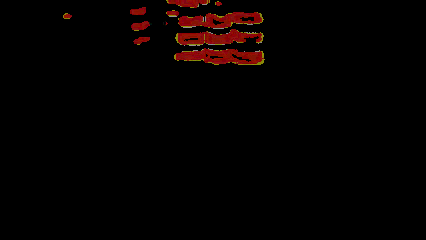

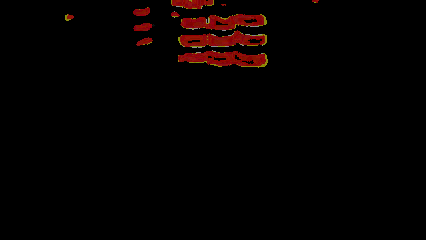

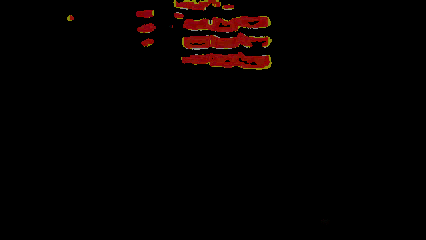

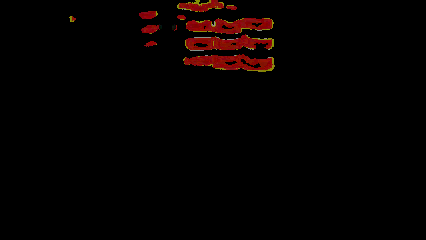

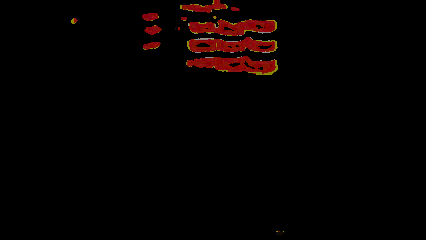

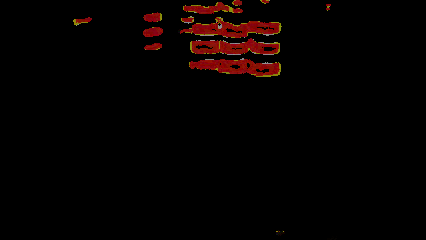

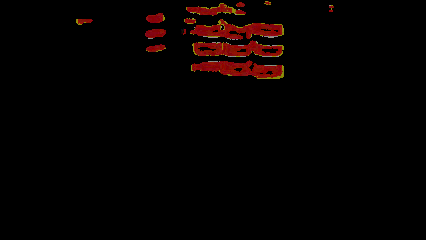

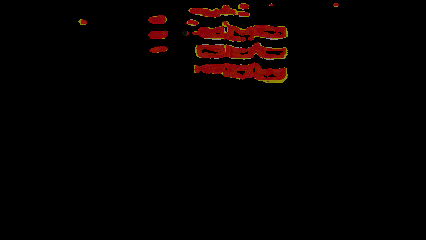

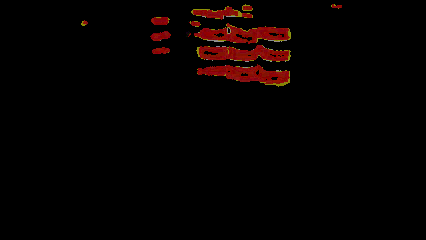

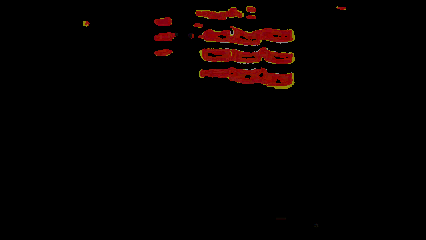

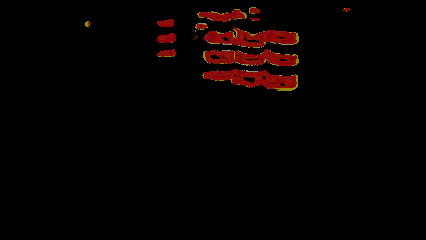

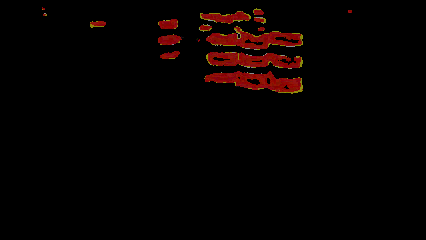

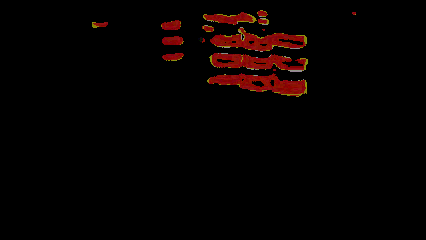

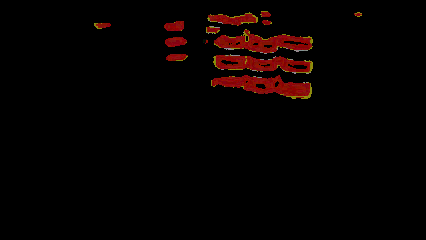

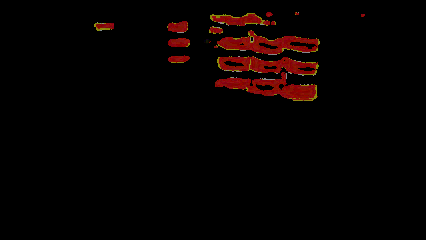

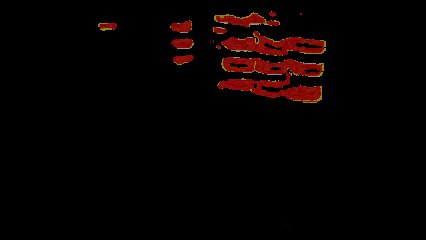

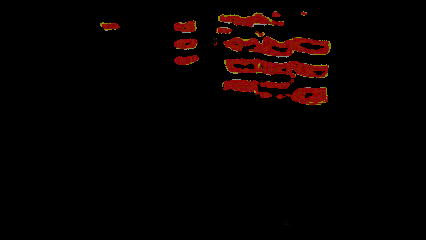

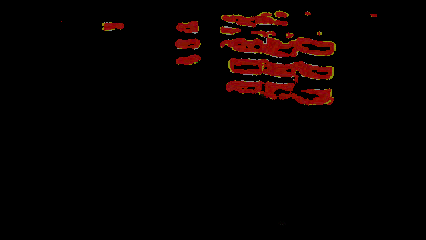

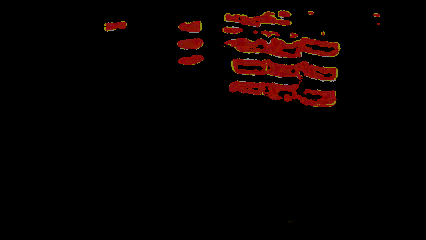

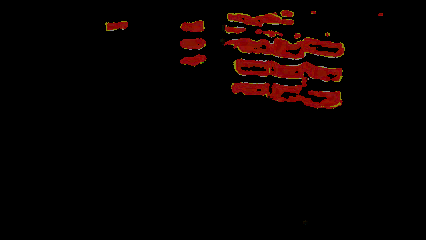

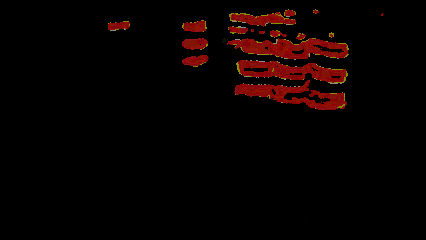

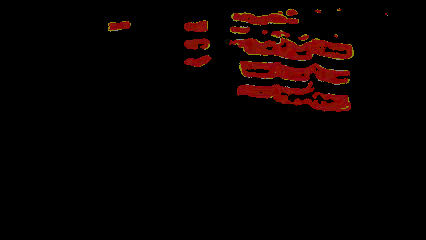

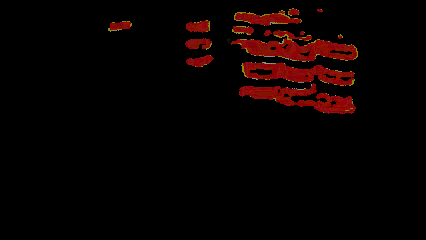

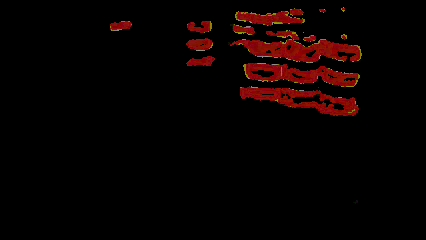

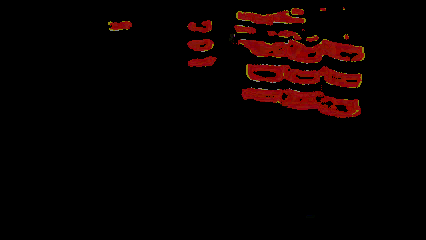

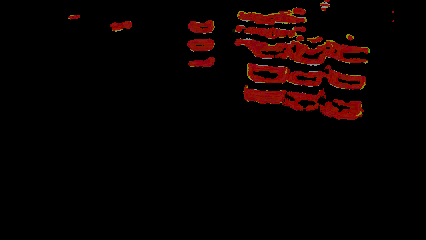

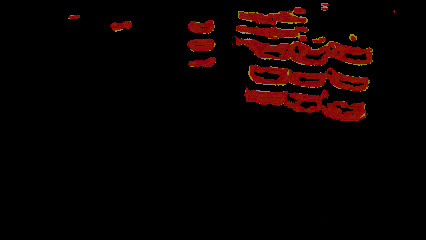

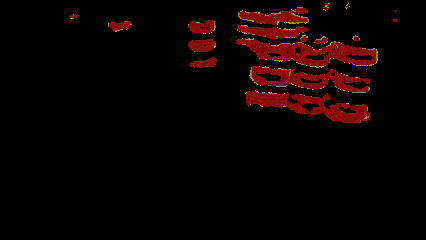

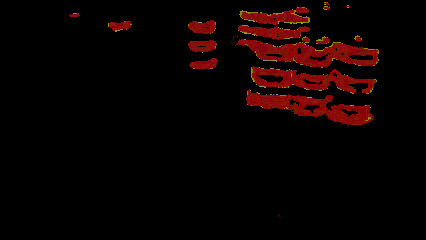

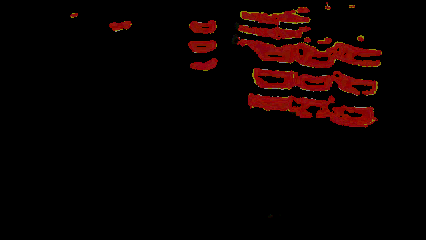

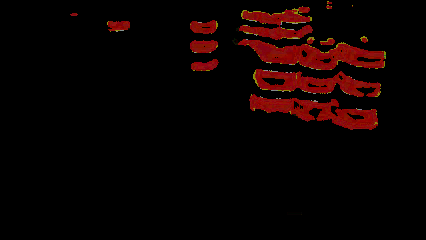

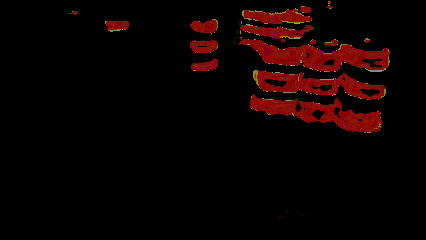

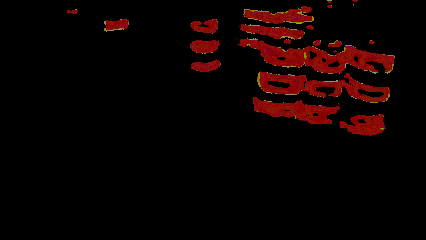

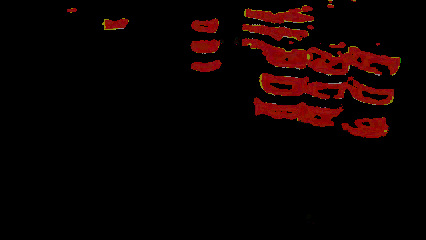

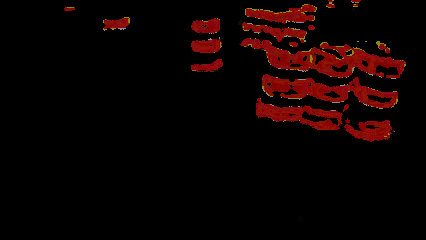

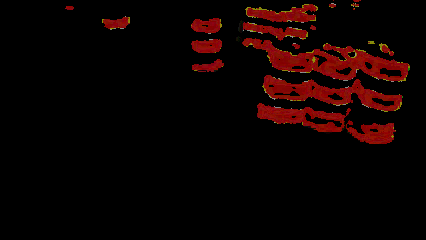

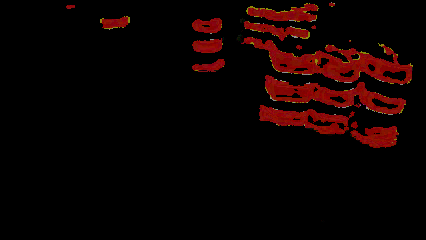

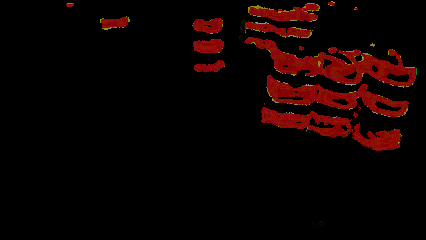

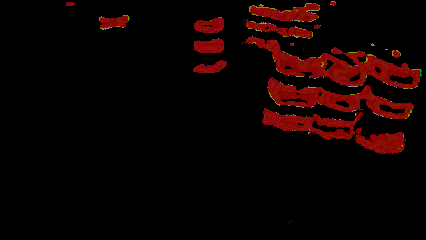

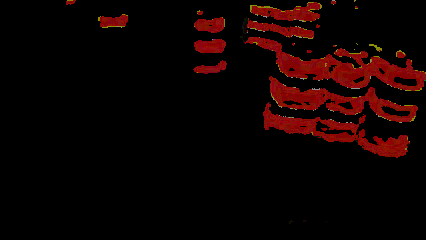

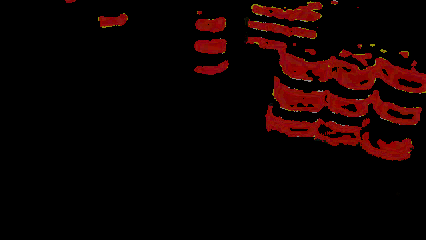

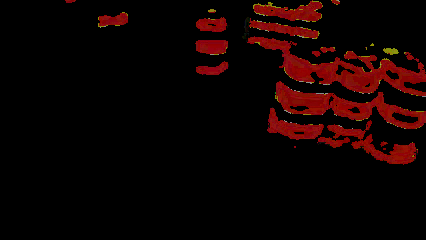

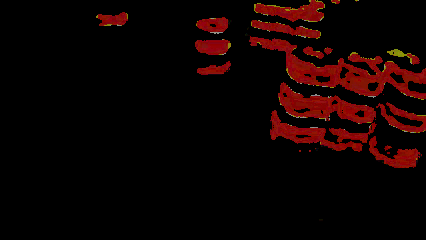

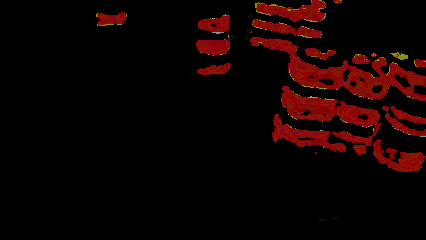

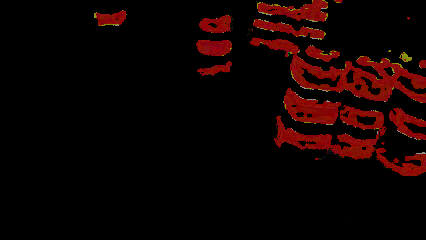

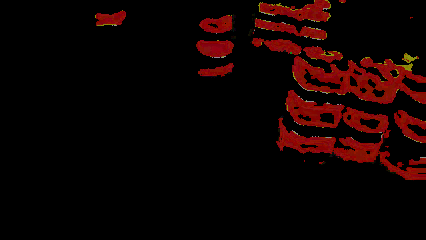

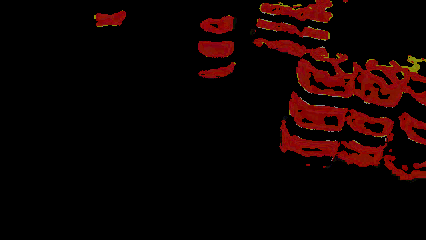

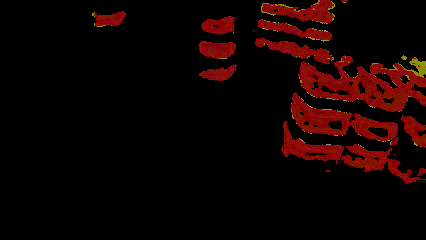

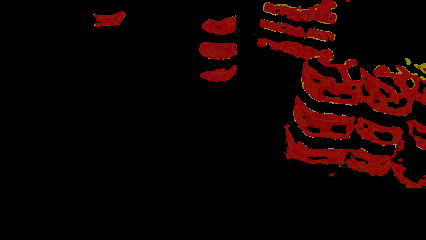

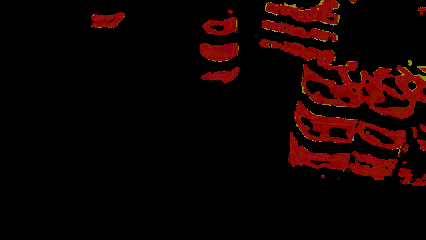

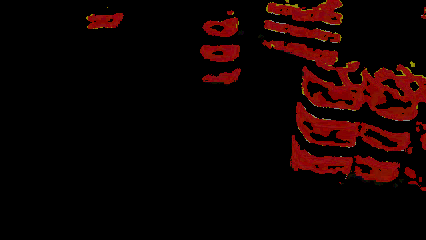

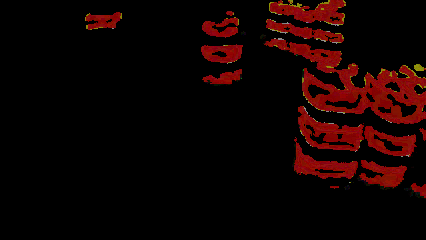

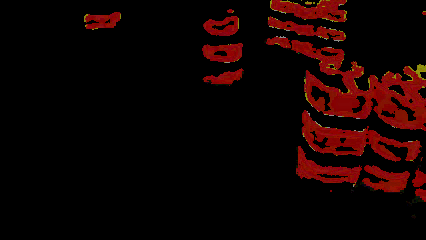

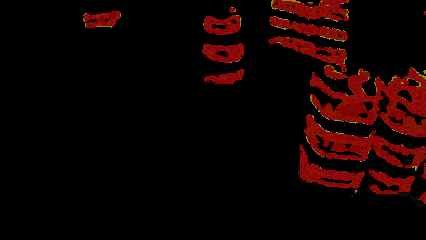

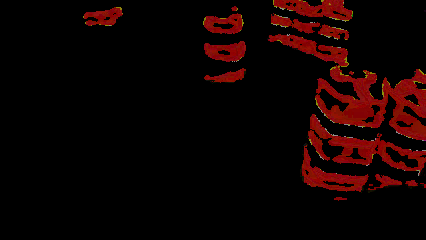

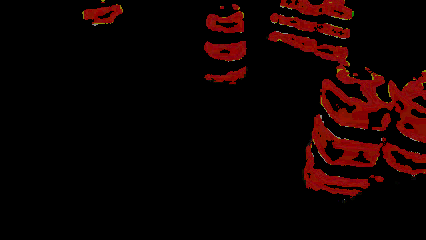

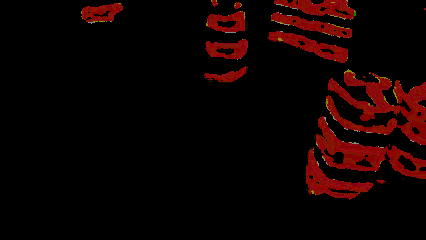

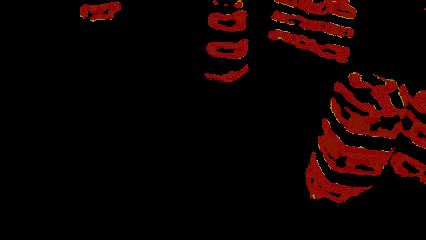

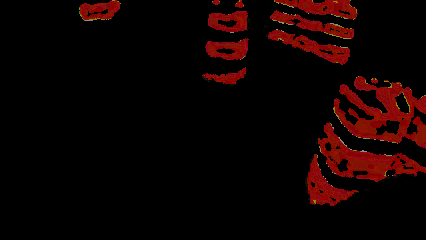

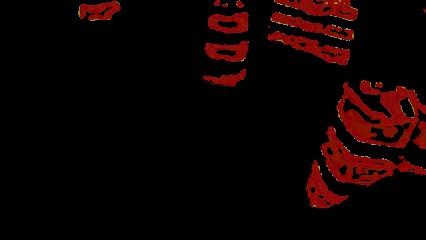

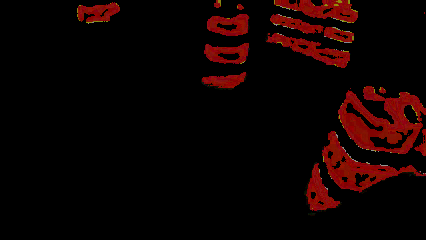

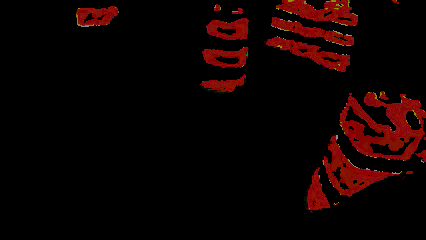

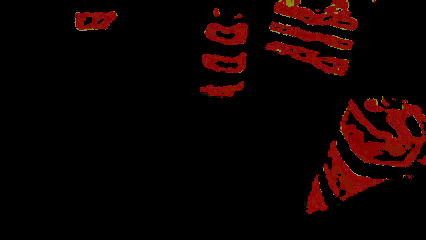

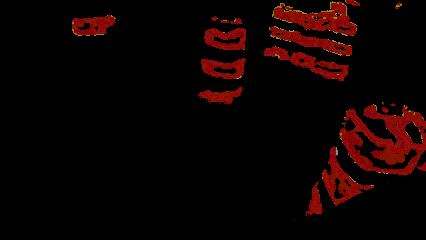

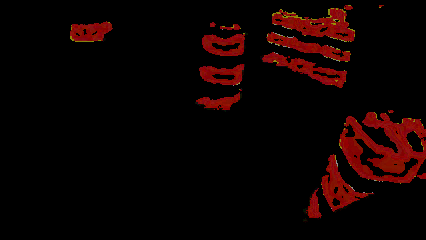

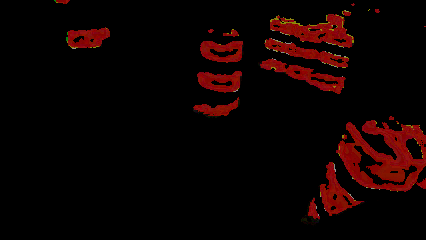

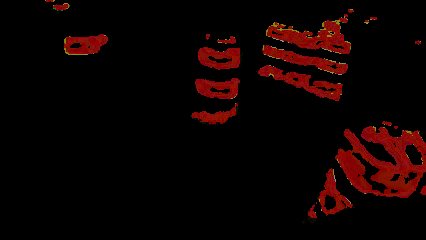

KeyboardInterrupt: ignored

In [ ]:
run=True
while run:
  run,frame=vid.read()
  frame_hsv=cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)
  back_proj=cv2.calcBackProject([frame_hsv],[0,1],barrel_hist,[0,20,0,255],1)
  disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
  cv2.filter2D(back_proj, -1, disc, back_proj)
  _,thresh=cv2.threshold(back_proj,70,150,cv2.THRESH_BINARY)
  merged=cv2.merge((thresh,thresh,thresh))
  ans=cv2.bitwise_and(merged,frame)
  cv2_imshow(ans)
  if cv2.waitKey(1000) & 0xFF == ord('q') :
    break;
vid.release()
cv2.destroyAllWindow()